In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import gc

from utils import *
from data import MnistTF
from nn_kd import *
from layers import *
# from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# check_available_device()
# seed settings
set_rand_seed(0)

In [4]:
# read Mnist data
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [5]:
def build_big_model(input_dims, output_dims):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    bigmodel = SoftenedNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.8))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.9))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.9))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    bigmodel.compile_nn(
        loss=tf.losses.softmax_cross_entropy(bigmodel.ys,bigmodel.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])

    return bigmodel

In [6]:
if try_cls2:
#     teacher = build_big_model(input_dims, output_dims, session)
    teacher = build_big_model(input_dims, output_dims)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7481762648755795092
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6042068583
locality {
  bus_id: 1
}
incarnation: 16251071769428720431
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.9392657 , acc = 0.32 
Epoch 1 , step 100 , loss= 0.15420419 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.11853272 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.07371853 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.14128715 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.047164787 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.06286731 val_loss= 0.09795288 , acc = 0.99 val acc = 0.9692 
Epoch 1 finished, loss= 0.23490334 val loss= 0.09795288 ,  acc = 0.9467273 val acc = 0.9692

Epoch 2 , step 50 , loss= 0.014312919 , acc = 1.0 
Epoch 2 , step 150 , loss= 0.015623328 , acc = 1.0 
Epoch 2 , step 250 , loss= 0.025701717 , acc = 1.0 


Epoch 17 , step 400 , loss= 0.0010884028 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.00063189276 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.017196577 val_loss= 0.12976146 , acc = 0.99 val acc = 0.9772 
Epoch 17 finished, loss= 0.0015980492 val loss= 0.12976146 ,  acc = 0.9997636 val acc = 0.9772

Epoch 18 , step 50 , loss= 0.0015266624 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00042043906 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00045173962 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.00048263557 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0011821097 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00024919971 val_loss= 0.102409154 , acc = 1.0 val acc = 0.982 
Epoch 18 finished, loss= 0.0020086973 val loss= 0.102409154 ,  acc = 0.9996181 val acc = 0.982

Epoch 19 , step 0 , loss= 0.0031916946 , acc = 1.0 
Epoch 19 , step 100 , loss= 5.3279175e-05 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.00064193225 , acc = 1.0 
Epoch 19 , step 300 , loss= 6.0188082e-05 , acc = 1.0 
Epoch 19 , step 400 , los

Epoch 34 , step 350 , loss= 0.00061557087 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.0008010795 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.0008655118 val_loss= 0.12617283 , acc = 1.0 val acc = 0.9858 
Epoch 34 finished, loss= 0.0004772887 val loss= 0.12617283 ,  acc = 0.9999454 val acc = 0.9858

Epoch 35 , step 0 , loss= 2.5629694e-07 , acc = 1.0 
Epoch 35 , step 100 , loss= 5.9756014e-05 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.036219668 , acc = 0.99 
Epoch 35 , step 300 , loss= 3.7124464e-05 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.002067593 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.00039925784 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.00021111917 val_loss= 0.16702855 , acc = 1.0 val acc = 0.9832 
Epoch 35 finished, loss= 0.0007196476 val loss= 0.16702855 ,  acc = 0.9998908 val acc = 0.9832

Epoch 36 , step 50 , loss= 2.3695051e-05 , acc = 1.0 
Epoch 36 , step 150 , loss= 1.8049559e-05 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.0008684698 , acc = 1.0 
Epoch 36 , step 350 , loss

Plotting loss...


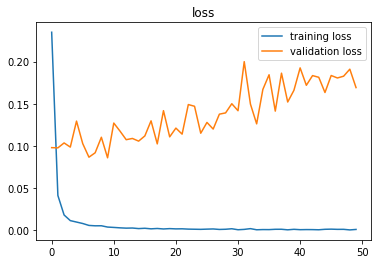

Plotting metrics...


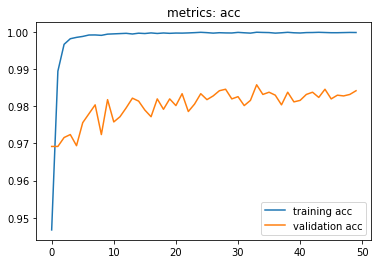

train {'acc': 0.99921817}
test {'acc': 0.982}


In [7]:
if try_cls2:
#     gc.collect()
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

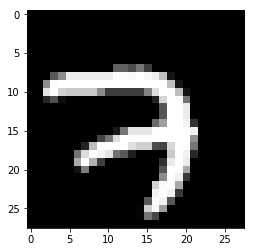

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[2.8915194e-24 2.3978214e-24 4.9980073e-15 1.4153674e-15 4.0718758e-27
 2.6581531e-28 2.0392345e-29 1.0000000e+00 3.2204105e-32 1.8098067e-22]


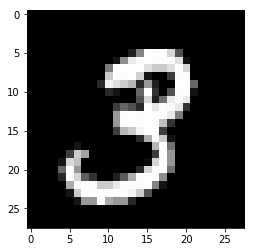

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.000000e+00 6.973301e-38 0.000000e+00 1.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 1.639197e-28 6.847068e-30]


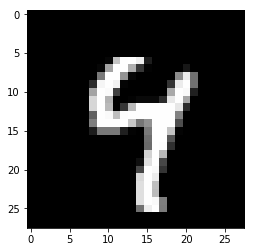

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4.6877829e-23 3.0501396e-25 4.7858767e-24 1.5207362e-20 1.0000000e+00
 6.0328991e-19 3.1192095e-25 2.8224951e-21 1.6804867e-18 8.1701312e-11]


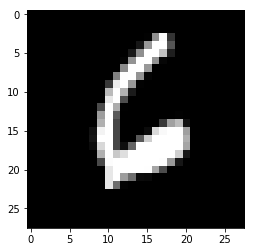

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[4.2635655e-26 1.4878308e-31 9.0168527e-25 2.9952687e-31 5.1042358e-28
 3.2494620e-23 1.0000000e+00 7.2918931e-37 1.5360789e-31 5.0318080e-31]


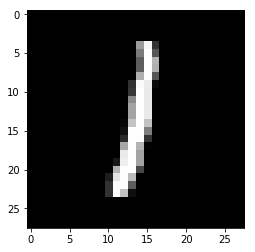

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.0517727e-30 1.0000000e+00 2.4363993e-24 1.3912437e-34 1.5462537e-26
 2.7802214e-28 2.2782885e-24 2.5802166e-20 7.2497902e-22 1.5604539e-30]


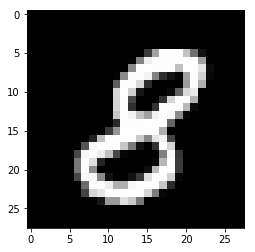

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[3.7188586e-35 3.7570108e-30 1.1522188e-22 2.8380400e-30 0.0000000e+00
 5.9740721e-32 3.4226628e-38 0.0000000e+00 1.0000000e+00 8.7267322e-27]


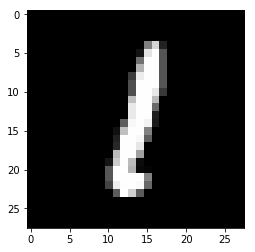

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.8844944e-26 1.0000000e+00 1.5502331e-20 1.8695967e-34 5.1858674e-26
 1.2783184e-28 1.2057567e-22 6.1940856e-19 3.2070446e-19 6.2589380e-31]


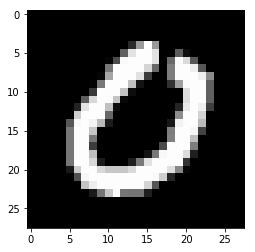

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


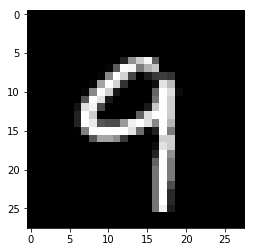

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.0379770e-22 1.6453678e-28 1.1209504e-24 3.0602082e-18 5.1902628e-14
 1.2866593e-21 7.3640512e-27 1.2135959e-16 3.0723979e-17 1.0000000e+00]


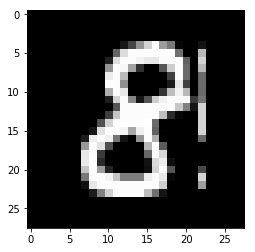

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.6009165e-30 9.7223711e-22 1.3416692e-23 6.8586270e-21 1.5980683e-23
 2.5555196e-22 6.1072367e-31 3.1220880e-34 1.0000000e+00 2.6870236e-22]


In [8]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

In [9]:

def build_small_model(input_dims, output_dims, is_student):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    smallmodel = StudentNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=8,activation_fn=tf.nn.relu))
#     smallmodel.add_layer(
#         FC(inputs=smallmodel.h[-1],out_dims=800,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    if is_student:
        smallmodel.compile_student(
            loss_standard=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3) #TODO: learning rate
            , metrics = ['acc']
        )
    else:
        smallmodel.compile_nn(
            loss=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
            , metrics = ['acc']
        )
    return smallmodel

In [10]:
train_small = True
# gc.collect()
if try_cls2 and train_small:
#     small = build_small_model(input_dims, output_dims, session, is_student=False)
    small = build_small_model(input_dims, output_dims, is_student=False)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11109450744846953124
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 14699557058787332608
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2868605 , acc = 0.14 
Epoch 1 , step 100 , loss= 1.4475186 , acc = 0.55 
Epoch 1 , step 200 , loss= 0.7195002 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.58415854 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.5328176 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.47001693 , acc = 0.85 
Epoch 1 , step 549 , loss= 0.67039716 val_loss= 0.4198668 , acc = 0.79 val acc = 0.8852 
Epoch 1 finished, loss= 0.90499413 val loss= 0.4198668 ,  acc = 0.7457091 val acc = 0.8852

Epoch 2 , step 50 , loss= 0.43345428 , acc = 0.92 
Epoch 2 , step 150 , loss= 0.3711715 , acc = 0.88 
Epoch 2 , step 250 , loss= 0.40909204 , acc = 0.88 
Epoch

Epoch 18 , step 50 , loss= 0.17166744 , acc = 0.94 
Epoch 18 , step 150 , loss= 0.33871982 , acc = 0.95 
Epoch 18 , step 250 , loss= 0.27668208 , acc = 0.91 
Epoch 18 , step 350 , loss= 0.21484654 , acc = 0.97 
Epoch 18 , step 450 , loss= 0.15975843 , acc = 0.97 
Epoch 18 , step 549 , loss= 0.25972033 val_loss= 0.26081625 , acc = 0.92 val acc = 0.9306 
Epoch 18 finished, loss= 0.25265026 val loss= 0.26081625 ,  acc = 0.9293272 val acc = 0.9306

Epoch 19 , step 0 , loss= 0.23241043 , acc = 0.92 
Epoch 19 , step 100 , loss= 0.21636058 , acc = 0.93 
Epoch 19 , step 200 , loss= 0.17540218 , acc = 0.97 
Epoch 19 , step 300 , loss= 0.24318355 , acc = 0.92 
Epoch 19 , step 400 , loss= 0.28960985 , acc = 0.89 
Epoch 19 , step 500 , loss= 0.2195772 , acc = 0.95 
Epoch 19 , step 549 , loss= 0.21850245 val_loss= 0.2599542 , acc = 0.93 val acc = 0.929 
Epoch 19 finished, loss= 0.25051364 val loss= 0.2599542 ,  acc = 0.92990905 val acc = 0.929

Epoch 20 , step 50 , loss= 0.1830453 , acc = 0.94 
Epo

Epoch 35 , step 400 , loss= 0.29279426 , acc = 0.91 
Epoch 35 , step 500 , loss= 0.1831714 , acc = 0.96 
Epoch 35 , step 549 , loss= 0.1381442 val_loss= 0.25699142 , acc = 0.95 val acc = 0.9286 
Epoch 35 finished, loss= 0.23163666 val loss= 0.25699142 ,  acc = 0.93445444 val acc = 0.9286

Epoch 36 , step 50 , loss= 0.25289798 , acc = 0.91 
Epoch 36 , step 150 , loss= 0.2126642 , acc = 0.95 
Epoch 36 , step 250 , loss= 0.20569415 , acc = 0.93 
Epoch 36 , step 350 , loss= 0.1483672 , acc = 0.95 
Epoch 36 , step 450 , loss= 0.29209194 , acc = 0.94 
Epoch 36 , step 549 , loss= 0.3512652 val_loss= 0.25632748 , acc = 0.93 val acc = 0.928 
Epoch 36 finished, loss= 0.23079626 val loss= 0.25632748 ,  acc = 0.9348545 val acc = 0.928

Epoch 37 , step 0 , loss= 0.28346404 , acc = 0.91 
Epoch 37 , step 100 , loss= 0.2076557 , acc = 0.92 
Epoch 37 , step 200 , loss= 0.3354455 , acc = 0.9 
Epoch 37 , step 300 , loss= 0.19762968 , acc = 0.95 
Epoch 37 , step 400 , loss= 0.15341099 , acc = 0.94 
Epoch 

Small model
Plotting loss...


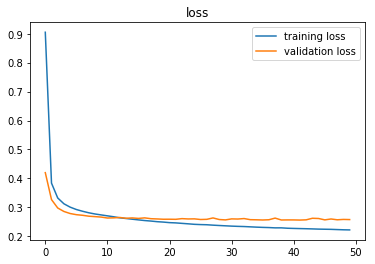

Plotting metrics...


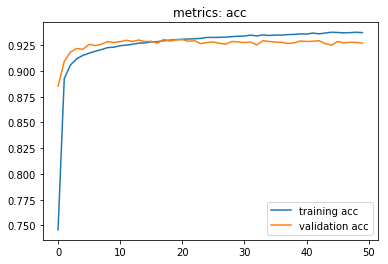

train {'acc': 0.93883634}
test {'acc': 0.9273}


In [11]:
if try_cls2 and train_small:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

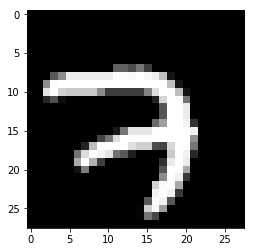

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.0953269e-07 5.8514145e-09 5.2375246e-02 9.3363844e-05 4.3712287e-05
 2.1665062e-11 3.6893497e-13 9.4748062e-01 5.6445979e-06 1.2653661e-06]


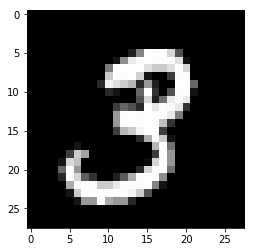

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1.8460915e-07 2.4843876e-08 1.6750774e-04 9.9897432e-01 2.5348861e-06
 8.1489925e-06 2.0069187e-10 1.5471417e-07 8.3763379e-04 9.3970975e-06]


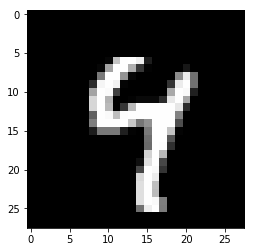

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.9831467e-06 1.9993058e-09 3.3815859e-06 1.4000001e-03 1.2580019e-01
 1.9847089e-03 2.8991278e-07 1.0602052e-04 1.6000951e-02 8.5470152e-01]


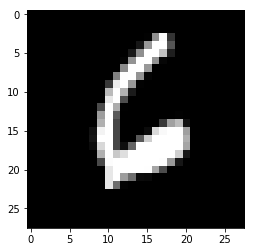

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1.4599172e-03 6.3355001e-09 3.6766447e-02 2.7998867e-06 6.0045219e-04
 6.4129090e-05 9.6109927e-01 1.1605568e-08 1.5420996e-07 6.8406835e-06]


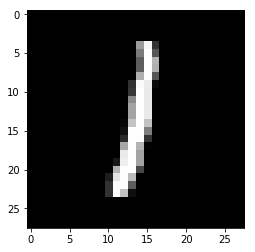

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.35266199e-07 9.97977674e-01 2.51035119e-04 1.08210384e-04
 3.84072308e-07 5.93812319e-06 1.17778982e-05 1.45546346e-06
 1.63369987e-03 9.56885469e-06]


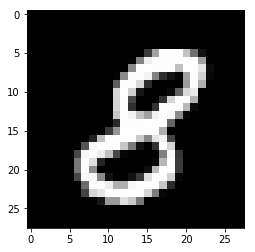

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.2632431e-06 2.1073868e-08 1.7917393e-04 2.3619968e-03 8.7277151e-08
 4.8173908e-05 1.7611865e-07 1.4638468e-10 9.9737883e-01 3.0374442e-05]


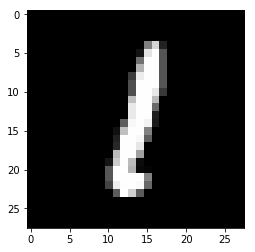

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.2772214e-07 9.9593866e-01 4.0072986e-04 4.8517431e-05 5.3756395e-08
 1.0961144e-06 7.3163937e-06 2.3843123e-07 3.6014856e-03 1.6814503e-06]


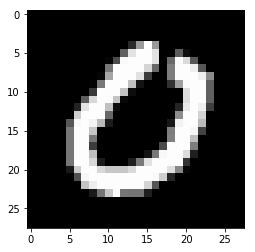

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.9974865e-01 4.1777046e-12 6.8543404e-06 2.2466997e-05 6.1738817e-08
 1.6021219e-04 6.6942830e-06 1.4417531e-05 4.0202489e-05 4.7619088e-07]


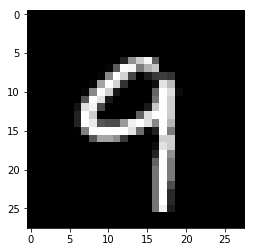

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[6.4139109e-05 3.8045252e-07 1.4377087e-05 7.2568795e-04 3.7834462e-02
 1.3194559e-03 3.4542722e-05 6.4288625e-03 1.7047271e-03 9.5187342e-01]


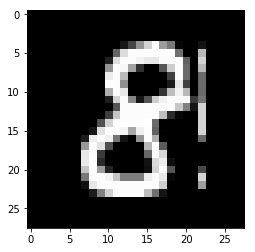

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[3.3385531e-05 3.0757537e-09 7.4865842e-05 3.4800134e-04 3.3996727e-07
 3.0287984e-04 3.9480693e-07 5.1266474e-10 9.9923003e-01 1.0126252e-05]


In [12]:
if try_cls2 and train_small:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = small
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2056151281944197489
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 1711856717289018485
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3053873 , acc = 0.06 
Epoch 1 , step 100 , loss= 1.680857 , acc = 0.52 
Epoch 1 , step 200 , loss= 1.048071 , acc = 0.75 
Epoch 1 , step 300 , loss= 0.5968718 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.54881215 , acc = 0.86 
Epoch 1 , step 500 , loss= 0.5311624 , acc = 0.83 
Epoch 1 , step 549 , loss= 0.42508414 val_loss= 0.45791084 , acc = 0.89 val acc = 0.8716 
Epoch 1 finished, loss= 1.0194637 
Epoch 2 , step 50 , loss= 0.62419623 , acc = 0.84 
Epoch 2 , step 150 , loss= 0.4659571 , acc = 0.87 
Epoch 2 , step 250

Epoch 19 , step 549 , loss= 0.34659642 val_loss= 0.23375672 , acc = 0.92 val acc = 0.929 
Epoch 19 finished, loss= 0.3396187 
Epoch 20 , step 50 , loss= 0.29334873 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.42530182 , acc = 0.88 
Epoch 20 , step 250 , loss= 0.22895981 , acc = 0.94 
Epoch 20 , step 350 , loss= 0.30516025 , acc = 0.94 
Epoch 20 , step 450 , loss= 0.22054836 , acc = 0.92 
Epoch 20 , step 549 , loss= 0.33928835 val_loss= 0.23078455 , acc = 0.92 val acc = 0.9296 
Epoch 20 finished, loss= 0.3378871 
Epoch 21 , step 0 , loss= 0.23357098 , acc = 0.93 
Epoch 21 , step 100 , loss= 0.2654797 , acc = 0.88 
Epoch 21 , step 200 , loss= 0.22124065 , acc = 0.93 
Epoch 21 , step 300 , loss= 0.24955429 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.29312146 , acc = 0.89 
Epoch 21 , step 500 , loss= 0.38065597 , acc = 0.88 
Epoch 21 , step 549 , loss= 0.21532242 val_loss= 0.23028064 , acc = 0.93 val acc = 0.9318 
Epoch 21 finished, loss= 0.33419177 
Epoch 22 , step 50 , loss= 0.2515595 , a

Epoch 39 , step 400 , loss= 0.21754362 , acc = 0.93 
Epoch 39 , step 500 , loss= 0.1418812 , acc = 0.94 
Epoch 39 , step 549 , loss= 0.27769426 val_loss= 0.2260115 , acc = 0.93 val acc = 0.9312 
Epoch 39 finished, loss= 0.29076463 
Epoch 40 , step 50 , loss= 0.095843896 , acc = 0.96 
Epoch 40 , step 150 , loss= 0.28678536 , acc = 0.91 
Epoch 40 , step 250 , loss= 0.14399514 , acc = 0.95 
Epoch 40 , step 350 , loss= 0.19450165 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.22496675 , acc = 0.91 
Epoch 40 , step 549 , loss= 0.13078816 val_loss= 0.22692427 , acc = 0.95 val acc = 0.931 
Epoch 40 finished, loss= 0.2881965 
Epoch 41 , step 0 , loss= 0.17753154 , acc = 0.95 
Epoch 41 , step 100 , loss= 0.24872294 , acc = 0.93 
Epoch 41 , step 200 , loss= 0.38524488 , acc = 0.9 
Epoch 41 , step 300 , loss= 0.28318885 , acc = 0.91 
Epoch 41 , step 400 , loss= 0.25476912 , acc = 0.94 
Epoch 41 , step 500 , loss= 0.2236824 , acc = 0.95 
Epoch 41 , step 549 , loss= 0.1540362 val_loss= 0.22488555 , ac

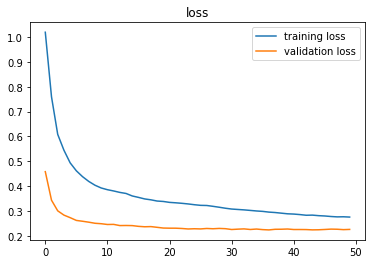

Plotting metrics...


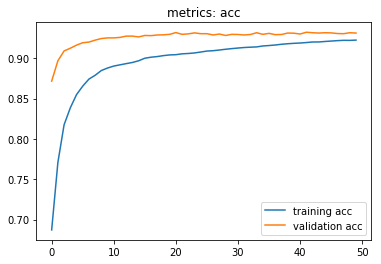

train {'acc': 0.9397454}
test {'acc': 0.9308}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8288767522177145194
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 5104477219437557657
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2892303 , acc = 0.05 
Epoch 1 , step 100 , loss= 1.6389837 , acc = 0.56 
Epoch 1 , step 200 , loss= 1.0507445 , acc = 0.72 
Epoch 1 , step 300 , loss= 0.7672099 , acc = 0.85 
Epoch 1 , step 400 , loss= 0.6380362 , acc = 0.87 
Epoch 1 , step 500 , loss= 0.4815712 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.6329127 val_loss= 0.49221653 , acc = 0.84 val acc = 0.8728 
Epoch 1 finished, loss= 1.0712413 
Epoch 2 , step 50 , loss= 0.38749027 , acc = 0.91 
Epoch 2 , step 150 

Epoch 19 , step 549 , loss= 0.2442542 val_loss= 0.2535245 , acc = 0.95 val acc = 0.931 
Epoch 19 finished, loss= 0.34956852 
Epoch 20 , step 50 , loss= 0.24525592 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.18568657 , acc = 0.93 
Epoch 20 , step 250 , loss= 0.1174847 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.39506733 , acc = 0.91 
Epoch 20 , step 450 , loss= 0.31061953 , acc = 0.93 
Epoch 20 , step 549 , loss= 0.29432696 val_loss= 0.25348115 , acc = 0.91 val acc = 0.9312 
Epoch 20 finished, loss= 0.34534568 
Epoch 21 , step 0 , loss= 0.3221639 , acc = 0.91 
Epoch 21 , step 100 , loss= 0.16295251 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.28608227 , acc = 0.94 
Epoch 21 , step 300 , loss= 0.15193298 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.17248096 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.25475332 , acc = 0.92 
Epoch 21 , step 549 , loss= 0.35375848 val_loss= 0.2509873 , acc = 0.95 val acc = 0.9318 
Epoch 21 finished, loss= 0.34013915 
Epoch 22 , step 50 , loss= 0.33569476 , ac

Epoch 39 , step 400 , loss= 0.290986 , acc = 0.92 
Epoch 39 , step 500 , loss= 0.16451775 , acc = 0.95 
Epoch 39 , step 549 , loss= 0.3583253 val_loss= 0.24146125 , acc = 0.94 val acc = 0.9338 
Epoch 39 finished, loss= 0.29253483 
Epoch 40 , step 50 , loss= 0.10597941 , acc = 0.95 
Epoch 40 , step 150 , loss= 0.1692371 , acc = 0.95 
Epoch 40 , step 250 , loss= 0.25697708 , acc = 0.92 
Epoch 40 , step 350 , loss= 0.341594 , acc = 0.9 
Epoch 40 , step 450 , loss= 0.17944402 , acc = 0.96 
Epoch 40 , step 549 , loss= 0.25762156 val_loss= 0.23992904 , acc = 0.95 val acc = 0.9342 
Epoch 40 finished, loss= 0.29082578 
Epoch 41 , step 0 , loss= 0.20959213 , acc = 0.96 
Epoch 41 , step 100 , loss= 0.14917983 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.09085596 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.31401294 , acc = 0.93 
Epoch 41 , step 400 , loss= 0.09955912 , acc = 0.98 
Epoch 41 , step 500 , loss= 0.3021726 , acc = 0.93 
Epoch 41 , step 549 , loss= 0.19820791 val_loss= 0.23952761 , acc 

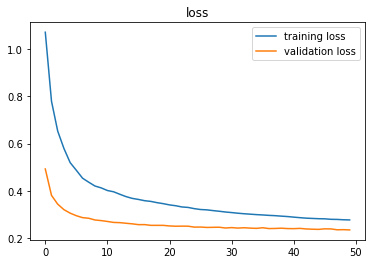

Plotting metrics...


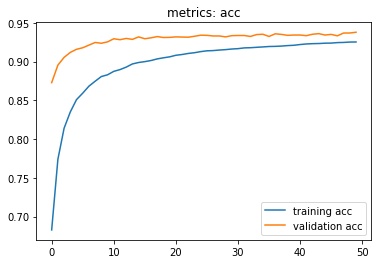

train {'acc': 0.94325453}
test {'acc': 0.9314}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10958500149228525839
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 13268321024343629096
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3008122 , acc = 0.17 
Epoch 1 , step 100 , loss= 1.4528389 , acc = 0.65 
Epoch 1 , step 200 , loss= 0.9530015 , acc = 0.79 
Epoch 1 , step 300 , loss= 0.6029612 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.5294403 , acc = 0.87 
Epoch 1 , step 500 , loss= 0.49813962 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.47824225 val_loss= 0.47169387 , acc = 0.85 val acc = 0.8894 
Epoch 1 finished, loss= 0.9736337 
Epoch 2 , step 50 , loss= 0.49360391 , acc = 0.88 
Epoch 2 , step 15

Epoch 19 , step 549 , loss= 0.37325633 val_loss= 0.27722555 , acc = 0.88 val acc = 0.93 
Epoch 19 finished, loss= 0.3565188 
Epoch 20 , step 50 , loss= 0.27441853 , acc = 0.91 
Epoch 20 , step 150 , loss= 0.30903167 , acc = 0.91 
Epoch 20 , step 250 , loss= 0.2666521 , acc = 0.93 
Epoch 20 , step 350 , loss= 0.2164903 , acc = 0.95 
Epoch 20 , step 450 , loss= 0.34774214 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.21813074 val_loss= 0.27397928 , acc = 0.92 val acc = 0.9268 
Epoch 20 finished, loss= 0.35262153 
Epoch 21 , step 0 , loss= 0.2854631 , acc = 0.92 
Epoch 21 , step 100 , loss= 0.19109426 , acc = 0.92 
Epoch 21 , step 200 , loss= 0.47450536 , acc = 0.93 
Epoch 21 , step 300 , loss= 0.44885987 , acc = 0.89 
Epoch 21 , step 400 , loss= 0.10213807 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.19065484 , acc = 0.95 
Epoch 21 , step 549 , loss= 0.13295192 val_loss= 0.27448255 , acc = 0.98 val acc = 0.9292 
Epoch 21 finished, loss= 0.3479304 
Epoch 22 , step 50 , loss= 0.36712402 , acc

Epoch 39 , step 400 , loss= 0.26813865 , acc = 0.94 
Epoch 39 , step 500 , loss= 0.29723823 , acc = 0.95 
Epoch 39 , step 549 , loss= 0.24970558 val_loss= 0.26177993 , acc = 0.95 val acc = 0.9294 
Epoch 39 finished, loss= 0.30713812 
Epoch 40 , step 50 , loss= 0.17468134 , acc = 0.93 
Epoch 40 , step 150 , loss= 0.22044611 , acc = 0.94 
Epoch 40 , step 250 , loss= 0.15667845 , acc = 0.95 
Epoch 40 , step 350 , loss= 0.29742667 , acc = 0.93 
Epoch 40 , step 450 , loss= 0.13362417 , acc = 0.96 
Epoch 40 , step 549 , loss= 0.16323233 val_loss= 0.258742 , acc = 0.97 val acc = 0.9326 
Epoch 40 finished, loss= 0.30445835 
Epoch 41 , step 0 , loss= 0.11448336 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.17948195 , acc = 0.94 
Epoch 41 , step 200 , loss= 0.18681595 , acc = 0.91 
Epoch 41 , step 300 , loss= 0.1452021 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.17148057 , acc = 0.95 
Epoch 41 , step 500 , loss= 0.17132202 , acc = 0.95 
Epoch 41 , step 549 , loss= 0.3458057 val_loss= 0.26136762 , 

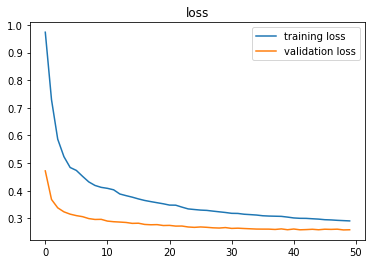

Plotting metrics...


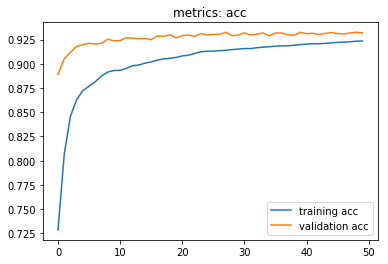

train {'acc': 0.9391636}
test {'acc': 0.9276}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16951530193965721096
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 3029064543462584616
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.305178 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.6304865 , acc = 0.48 
Epoch 1 , step 200 , loss= 1.0028869 , acc = 0.81 
Epoch 1 , step 300 , loss= 0.7129921 , acc = 0.82 
Epoch 1 , step 400 , loss= 0.47262722 , acc = 0.91 
Epoch 1 , step 500 , loss= 0.60446095 , acc = 0.81 
Epoch 1 , step 549 , loss= 0.40664342 val_loss= 0.45606202 , acc = 0.93 val acc = 0.8864 
Epoch 1 finished, loss= 1.019325 
Epoch 2 , step 50 , loss= 0.35946053 , acc = 0.94 
Epoch 2 , step 150

Epoch 19 , step 549 , loss= 0.28096676 val_loss= 0.27038732 , acc = 0.92 val acc = 0.9296 
Epoch 19 finished, loss= 0.3576304 
Epoch 20 , step 50 , loss= 0.31480676 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.5412912 , acc = 0.86 
Epoch 20 , step 250 , loss= 0.15438499 , acc = 0.93 
Epoch 20 , step 350 , loss= 0.20363033 , acc = 0.94 
Epoch 20 , step 450 , loss= 0.23373604 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.1644759 val_loss= 0.2688291 , acc = 0.96 val acc = 0.9294 
Epoch 20 finished, loss= 0.35352683 
Epoch 21 , step 0 , loss= 0.31803685 , acc = 0.92 
Epoch 21 , step 100 , loss= 0.24815106 , acc = 0.94 
Epoch 21 , step 200 , loss= 0.2683544 , acc = 0.94 
Epoch 21 , step 300 , loss= 0.42893207 , acc = 0.88 
Epoch 21 , step 400 , loss= 0.36044323 , acc = 0.92 
Epoch 21 , step 500 , loss= 0.22536725 , acc = 0.93 
Epoch 21 , step 549 , loss= 0.2214666 val_loss= 0.27027595 , acc = 0.94 val acc = 0.9298 
Epoch 21 finished, loss= 0.3505784 
Epoch 22 , step 50 , loss= 0.30484888 , acc

Epoch 39 , step 400 , loss= 0.17493649 , acc = 0.95 
Epoch 39 , step 500 , loss= 0.26939458 , acc = 0.94 
Epoch 39 , step 549 , loss= 0.19229685 val_loss= 0.25846753 , acc = 0.94 val acc = 0.9312 
Epoch 39 finished, loss= 0.300799 
Epoch 40 , step 50 , loss= 0.141175 , acc = 0.96 
Epoch 40 , step 150 , loss= 0.24434704 , acc = 0.92 
Epoch 40 , step 250 , loss= 0.23875912 , acc = 0.94 
Epoch 40 , step 350 , loss= 0.23247537 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.2574769 , acc = 0.94 
Epoch 40 , step 549 , loss= 0.3681016 val_loss= 0.26184836 , acc = 0.9 val acc = 0.9304 
Epoch 40 finished, loss= 0.2995588 
Epoch 41 , step 0 , loss= 0.17998885 , acc = 0.9 
Epoch 41 , step 100 , loss= 0.26393288 , acc = 0.93 
Epoch 41 , step 200 , loss= 0.3032998 , acc = 0.94 
Epoch 41 , step 300 , loss= 0.11579953 , acc = 0.95 
Epoch 41 , step 400 , loss= 0.29367447 , acc = 0.89 
Epoch 41 , step 500 , loss= 0.31549454 , acc = 0.89 
Epoch 41 , step 549 , loss= 0.15148263 val_loss= 0.26149583 , acc = 

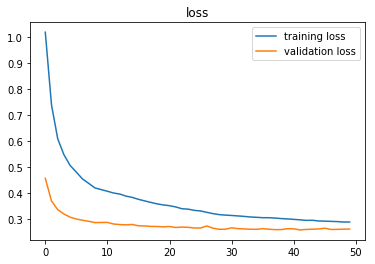

Plotting metrics...


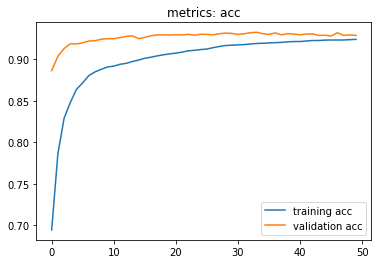

train {'acc': 0.9405636}
test {'acc': 0.9326}

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16897189113077218368
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 16037495299321790776
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2832782 , acc = 0.14 
Epoch 1 , step 100 , loss= 1.466391 , acc = 0.53 
Epoch 1 , step 200 , loss= 0.86615366 , acc = 0.79 
Epoch 1 , step 300 , loss= 0.8491181 , acc = 0.72 
Epoch 1 , step 400 , loss= 0.34786564 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.5640189 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.3767907 val_loss= 0.4336416 , acc = 0.89 val acc = 0.884 
Epoch 1 finished, loss= 0.96480227 
Epoch 2 , step 50 , loss= 0.26180747 , acc = 0.93 
Epoch 2 , step 150 

Epoch 19 , step 549 , loss= 0.23984428 val_loss= 0.27072388 , acc = 0.91 val acc = 0.9264 
Epoch 19 finished, loss= 0.32705042 
Epoch 20 , step 50 , loss= 0.2303022 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.2620257 , acc = 0.95 
Epoch 20 , step 250 , loss= 0.2608752 , acc = 0.92 
Epoch 20 , step 350 , loss= 0.35691872 , acc = 0.88 
Epoch 20 , step 450 , loss= 0.2774143 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.14700592 val_loss= 0.2752382 , acc = 0.97 val acc = 0.9224 
Epoch 20 finished, loss= 0.32375997 
Epoch 21 , step 0 , loss= 0.17828187 , acc = 0.95 
Epoch 21 , step 100 , loss= 0.30059585 , acc = 0.88 
Epoch 21 , step 200 , loss= 0.13926253 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.29363137 , acc = 0.94 
Epoch 21 , step 400 , loss= 0.2967025 , acc = 0.92 
Epoch 21 , step 500 , loss= 0.14106643 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.2553948 val_loss= 0.27102473 , acc = 0.94 val acc = 0.9268 
Epoch 21 finished, loss= 0.31893232 
Epoch 22 , step 50 , loss= 0.30244368 , acc

Epoch 39 , step 400 , loss= 0.28231385 , acc = 0.94 
Epoch 39 , step 500 , loss= 0.51422936 , acc = 0.87 
Epoch 39 , step 549 , loss= 0.17961136 val_loss= 0.267961 , acc = 0.93 val acc = 0.9254 
Epoch 39 finished, loss= 0.2848659 
Epoch 40 , step 50 , loss= 0.31461522 , acc = 0.93 
Epoch 40 , step 150 , loss= 0.2088166 , acc = 0.93 
Epoch 40 , step 250 , loss= 0.2734343 , acc = 0.92 
Epoch 40 , step 350 , loss= 0.20806324 , acc = 0.94 
Epoch 40 , step 450 , loss= 0.3215699 , acc = 0.93 
Epoch 40 , step 549 , loss= 0.27089912 val_loss= 0.26644486 , acc = 0.89 val acc = 0.9266 
Epoch 40 finished, loss= 0.2844359 
Epoch 41 , step 0 , loss= 0.20357624 , acc = 0.94 
Epoch 41 , step 100 , loss= 0.26204264 , acc = 0.92 
Epoch 41 , step 200 , loss= 0.10344445 , acc = 0.97 
Epoch 41 , step 300 , loss= 0.29018074 , acc = 0.93 
Epoch 41 , step 400 , loss= 0.29894578 , acc = 0.92 
Epoch 41 , step 500 , loss= 0.25761542 , acc = 0.93 
Epoch 41 , step 549 , loss= 0.2982995 val_loss= 0.2698818 , acc =

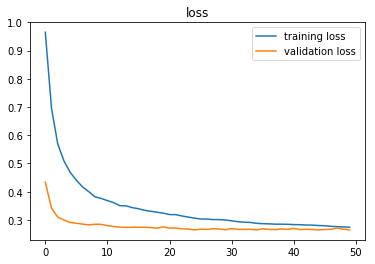

Plotting metrics...


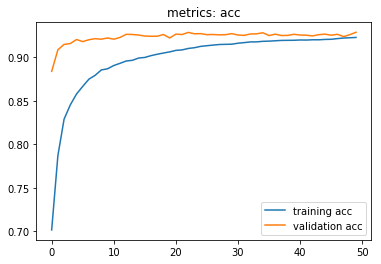

train {'acc': 0.9376182}
test {'acc': 0.9251}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2636440191172677927
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 13335064866343380438
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2937036 , acc = 0.16 
Epoch 1 , step 100 , loss= 1.999063 , acc = 0.42 
Epoch 1 , step 200 , loss= 1.3479112 , acc = 0.75 
Epoch 1 , step 300 , loss= 0.93343484 , acc = 0.85 
Epoch 1 , step 400 , loss= 0.74081886 , acc = 0.78 
Epoch 1 , step 500 , loss= 0.5638951 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.64147097 val_loss= 0.57782966 , acc = 0.82 val acc = 0.8568 
Epoch 1 finished, loss= 1.2171854 
Epoch 2 , step 50 , loss= 0.41531032 , acc = 0.93 
Epoch 2 , step 150

Epoch 19 , step 549 , loss= 0.30910438 val_loss= 0.27172995 , acc = 0.89 val acc = 0.926 
Epoch 19 finished, loss= 0.36259213 
Epoch 20 , step 50 , loss= 0.18424724 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.281158 , acc = 0.91 
Epoch 20 , step 250 , loss= 0.3480956 , acc = 0.93 
Epoch 20 , step 350 , loss= 0.2144719 , acc = 0.95 
Epoch 20 , step 450 , loss= 0.28908238 , acc = 0.92 
Epoch 20 , step 549 , loss= 0.2849821 val_loss= 0.2685856 , acc = 0.95 val acc = 0.9292 
Epoch 20 finished, loss= 0.35818046 
Epoch 21 , step 0 , loss= 0.3383299 , acc = 0.93 
Epoch 21 , step 100 , loss= 0.27612287 , acc = 0.9 
Epoch 21 , step 200 , loss= 0.36569345 , acc = 0.91 
Epoch 21 , step 300 , loss= 0.5700536 , acc = 0.89 
Epoch 21 , step 400 , loss= 0.26076117 , acc = 0.93 
Epoch 21 , step 500 , loss= 0.33553395 , acc = 0.89 
Epoch 21 , step 549 , loss= 0.3938404 val_loss= 0.26768 , acc = 0.9 val acc = 0.9274 
Epoch 21 finished, loss= 0.3584219 
Epoch 22 , step 50 , loss= 0.23620498 , acc = 0.93 


Epoch 39 , step 400 , loss= 0.21932489 , acc = 0.93 
Epoch 39 , step 500 , loss= 0.40658635 , acc = 0.9 
Epoch 39 , step 549 , loss= 0.2963314 val_loss= 0.25676945 , acc = 0.93 val acc = 0.9322 
Epoch 39 finished, loss= 0.3231796 
Epoch 40 , step 50 , loss= 0.24765024 , acc = 0.94 
Epoch 40 , step 150 , loss= 0.358128 , acc = 0.95 
Epoch 40 , step 250 , loss= 0.34014145 , acc = 0.92 
Epoch 40 , step 350 , loss= 0.24456936 , acc = 0.93 
Epoch 40 , step 450 , loss= 0.17395335 , acc = 0.96 
Epoch 40 , step 549 , loss= 0.37141976 val_loss= 0.2565371 , acc = 0.94 val acc = 0.9292 
Epoch 40 finished, loss= 0.322398 
Epoch 41 , step 0 , loss= 0.26761732 , acc = 0.94 
Epoch 41 , step 100 , loss= 0.3961485 , acc = 0.91 
Epoch 41 , step 200 , loss= 0.17481458 , acc = 0.96 
Epoch 41 , step 300 , loss= 0.35475802 , acc = 0.9 
Epoch 41 , step 400 , loss= 0.25039497 , acc = 0.93 
Epoch 41 , step 500 , loss= 0.27230802 , acc = 0.89 
Epoch 41 , step 549 , loss= 0.16153486 val_loss= 0.25521025 , acc = 

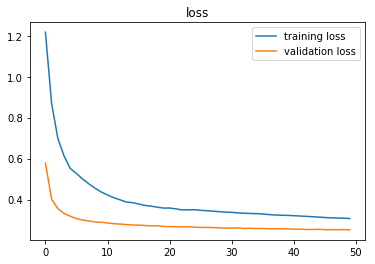

Plotting metrics...


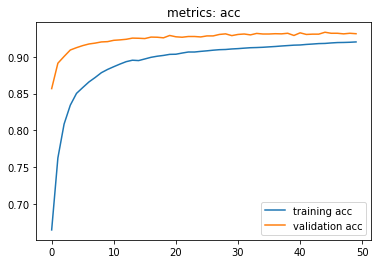

train {'acc': 0.9362364}
test {'acc': 0.9296}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13035658411559996639
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 17935268832699914442
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.298203 , acc = 0.13 
Epoch 1 , step 100 , loss= 1.8079547 , acc = 0.5 
Epoch 1 , step 200 , loss= 1.262683 , acc = 0.76 
Epoch 1 , step 300 , loss= 1.1079141 , acc = 0.78 
Epoch 1 , step 400 , loss= 1.1365136 , acc = 0.73 
Epoch 1 , step 500 , loss= 0.8207549 , acc = 0.78 
Epoch 1 , step 549 , loss= 0.75578237 val_loss= 0.7207137 , acc = 0.84 val acc = 0.8498 
Epoch 1 finished, loss= 1.3128293 
Epoch 2 , step 50 , loss= 0.5836682 , acc = 0.92 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 0.4168828 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.22709972 , acc = 0.94 
Epoch 20 , step 250 , loss= 0.2612452 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.283704 , acc = 0.93 
Epoch 20 , step 450 , loss= 0.40095806 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.40970826 val_loss= 0.33251202 , acc = 0.9 val acc = 0.9266 
Epoch 20 finished, loss= 0.4515554 
Epoch 21 , step 0 , loss= 0.3771881 , acc = 0.92 
Epoch 21 , step 100 , loss= 0.40132603 , acc = 0.91 
Epoch 21 , step 200 , loss= 0.39570406 , acc = 0.94 
Epoch 21 , step 300 , loss= 0.22293532 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.27987063 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.39814866 , acc = 0.94 
Epoch 21 , step 549 , loss= 0.6223844 val_loss= 0.33184797 , acc = 0.86 val acc = 0.9242 
Epoch 21 finished, loss= 0.4481734 
Epoch 22 , step 50 , loss= 0.22235142 , acc = 0.97 
Epoch 22 , step 150 , loss= 0.376165 , acc = 0.9 
Epoch 22 , step 250 , loss= 0.253172 , acc = 0.95 
Epoch 22 , step 350 

Epoch 40 , step 50 , loss= 0.35553968 , acc = 0.91 
Epoch 40 , step 150 , loss= 0.27530476 , acc = 0.92 
Epoch 40 , step 250 , loss= 0.3774234 , acc = 0.92 
Epoch 40 , step 350 , loss= 0.29662085 , acc = 0.9 
Epoch 40 , step 450 , loss= 0.23898785 , acc = 0.94 
Epoch 40 , step 549 , loss= 0.34043744 val_loss= 0.32222417 , acc = 0.93 val acc = 0.928 
Epoch 40 finished, loss= 0.3838774 
Epoch 41 , step 0 , loss= 0.15826103 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.46395606 , acc = 0.93 
Epoch 41 , step 200 , loss= 0.29036897 , acc = 0.93 
Epoch 41 , step 300 , loss= 0.4669667 , acc = 0.89 
Epoch 41 , step 400 , loss= 0.28806233 , acc = 0.94 
Epoch 41 , step 500 , loss= 0.22485924 , acc = 0.94 
Epoch 41 , step 549 , loss= 0.4487028 val_loss= 0.32016072 , acc = 0.94 val acc = 0.9316 
Epoch 41 finished, loss= 0.38258165 
Epoch 42 , step 50 , loss= 0.32798097 , acc = 0.95 
Epoch 42 , step 150 , loss= 0.4787347 , acc = 0.93 
Epoch 42 , step 250 , loss= 0.31300718 , acc = 0.93 
Epoch 42 , st

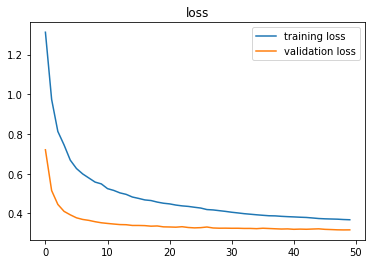

Plotting metrics...


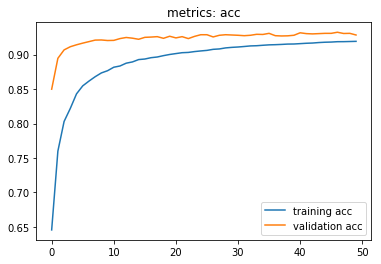

train {'acc': 0.93610907}
test {'acc': 0.9311}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11139051061548139331
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 1172823559823098731
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2802966 , acc = 0.19 
Epoch 1 , step 100 , loss= 1.6205587 , acc = 0.74 
Epoch 1 , step 200 , loss= 1.2004036 , acc = 0.78 
Epoch 1 , step 300 , loss= 0.9029101 , acc = 0.84 
Epoch 1 , step 400 , loss= 0.807513 , acc = 0.84 
Epoch 1 , step 500 , loss= 0.74215627 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.6915004 val_loss= 0.6571753 , acc = 0.85 val acc = 0.8786 
Epoch 1 finished, loss= 1.1779054 
Epoch 2 , step 50 , loss= 0.5889647 , acc = 0.91 
Epoch 2 , step 150 , 

Epoch 19 , step 549 , loss= 0.49246386 val_loss= 0.3724565 , acc = 0.94 val acc = 0.9276 
Epoch 19 finished, loss= 0.45671335 
Epoch 20 , step 50 , loss= 0.2271239 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.36711848 , acc = 0.93 
Epoch 20 , step 250 , loss= 0.71182775 , acc = 0.9 
Epoch 20 , step 350 , loss= 0.4363839 , acc = 0.93 
Epoch 20 , step 450 , loss= 0.292908 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.2891739 val_loss= 0.37572902 , acc = 0.93 val acc = 0.9254 
Epoch 20 finished, loss= 0.4535153 
Epoch 21 , step 0 , loss= 0.3631044 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.25373745 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.38282427 , acc = 0.94 
Epoch 21 , step 300 , loss= 0.16261376 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.67527544 , acc = 0.84 
Epoch 21 , step 500 , loss= 0.4445442 , acc = 0.9 
Epoch 21 , step 549 , loss= 0.5537926 val_loss= 0.374242 , acc = 0.9 val acc = 0.9262 
Epoch 21 finished, loss= 0.45104292 
Epoch 22 , step 50 , loss= 0.63517976 , acc = 0.91 

Epoch 39 , step 400 , loss= 0.33561543 , acc = 0.9 
Epoch 39 , step 500 , loss= 0.19773665 , acc = 0.94 
Epoch 39 , step 549 , loss= 0.30945665 val_loss= 0.36888412 , acc = 0.95 val acc = 0.9248 
Epoch 39 finished, loss= 0.4013787 
Epoch 40 , step 50 , loss= 0.33047944 , acc = 0.91 
Epoch 40 , step 150 , loss= 0.46253636 , acc = 0.9 
Epoch 40 , step 250 , loss= 0.16336113 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.28486565 , acc = 0.95 
Epoch 40 , step 450 , loss= 0.24321511 , acc = 0.94 
Epoch 40 , step 549 , loss= 0.23250692 val_loss= 0.3719122 , acc = 0.95 val acc = 0.9234 
Epoch 40 finished, loss= 0.39871982 
Epoch 41 , step 0 , loss= 0.6260793 , acc = 0.87 
Epoch 41 , step 100 , loss= 0.34600282 , acc = 0.94 
Epoch 41 , step 200 , loss= 0.23179424 , acc = 0.93 
Epoch 41 , step 300 , loss= 0.4109416 , acc = 0.88 
Epoch 41 , step 400 , loss= 0.25737587 , acc = 0.96 
Epoch 41 , step 500 , loss= 0.4103685 , acc = 0.92 
Epoch 41 , step 549 , loss= 0.413711 val_loss= 0.37406367 , acc =

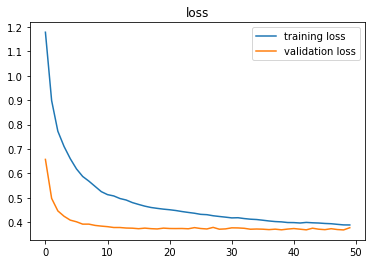

Plotting metrics...


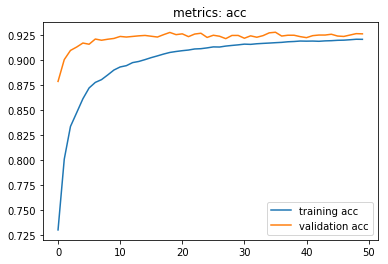

train {'acc': 0.93294543}
test {'acc': 0.924}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12674143147105334551
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 2346017920602597184
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3117108 , acc = 0.07 
Epoch 1 , step 100 , loss= 1.5798489 , acc = 0.65 
Epoch 1 , step 200 , loss= 1.094034 , acc = 0.69 
Epoch 1 , step 300 , loss= 0.9084003 , acc = 0.81 
Epoch 1 , step 400 , loss= 0.6965387 , acc = 0.86 
Epoch 1 , step 500 , loss= 0.50262773 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.76087606 val_loss= 0.62321 , acc = 0.78 val acc = 0.8676 
Epoch 1 finished, loss= 1.1220053 
Epoch 2 , step 50 , loss= 0.5413829 , acc = 0.88 
Epoch 2 , step 150 , 

Epoch 19 , step 549 , loss= 0.26473516 val_loss= 0.35791063 , acc = 0.96 val acc = 0.9272 
Epoch 19 finished, loss= 0.41467953 
Epoch 20 , step 50 , loss= 0.21640375 , acc = 0.95 
Epoch 20 , step 150 , loss= 0.3216168 , acc = 0.93 
Epoch 20 , step 250 , loss= 0.35820305 , acc = 0.92 
Epoch 20 , step 350 , loss= 0.23189875 , acc = 0.95 
Epoch 20 , step 450 , loss= 0.42907846 , acc = 0.93 
Epoch 20 , step 549 , loss= 0.27148613 val_loss= 0.36161143 , acc = 0.93 val acc = 0.9236 
Epoch 20 finished, loss= 0.40960732 
Epoch 21 , step 0 , loss= 0.18448028 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.28533563 , acc = 0.93 
Epoch 21 , step 200 , loss= 0.32070124 , acc = 0.94 
Epoch 21 , step 300 , loss= 0.29215047 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.21580932 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.35247508 , acc = 0.92 
Epoch 21 , step 549 , loss= 0.3789831 val_loss= 0.3577121 , acc = 0.92 val acc = 0.9258 
Epoch 21 finished, loss= 0.40349552 
Epoch 22 , step 50 , loss= 0.35647565 ,

Epoch 39 , step 500 , loss= 0.30630454 , acc = 0.92 
Epoch 39 , step 549 , loss= 0.3867852 val_loss= 0.35145357 , acc = 0.92 val acc = 0.9292 
Epoch 39 finished, loss= 0.36564982 
Epoch 40 , step 50 , loss= 0.32901955 , acc = 0.92 
Epoch 40 , step 150 , loss= 0.29291645 , acc = 0.92 
Epoch 40 , step 250 , loss= 0.30053616 , acc = 0.96 
Epoch 40 , step 350 , loss= 0.22030915 , acc = 0.95 
Epoch 40 , step 450 , loss= 0.28869194 , acc = 0.95 
Epoch 40 , step 549 , loss= 0.37603635 val_loss= 0.3500058 , acc = 0.92 val acc = 0.929 
Epoch 40 finished, loss= 0.3641637 
Epoch 41 , step 0 , loss= 0.2709936 , acc = 0.95 
Epoch 41 , step 100 , loss= 0.4399792 , acc = 0.93 
Epoch 41 , step 200 , loss= 0.24454232 , acc = 0.95 
Epoch 41 , step 300 , loss= 0.2613985 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.36317337 , acc = 0.93 
Epoch 41 , step 500 , loss= 0.4771632 , acc = 0.9 
Epoch 41 , step 549 , loss= 0.2907227 val_loss= 0.3501828 , acc = 0.93 val acc = 0.9296 
Epoch 41 finished, loss= 0.3634

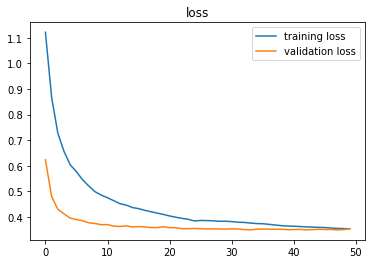

Plotting metrics...


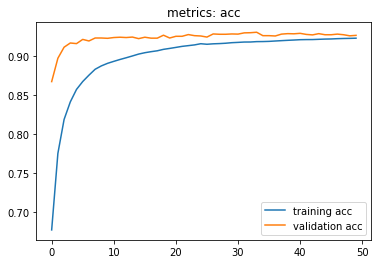

train {'acc': 0.9354727}
test {'acc': 0.9249}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1172208612539933371
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 16041034904502402370
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3195066 , acc = 0.07 
Epoch 1 , step 100 , loss= 1.4283365 , acc = 0.68 
Epoch 1 , step 200 , loss= 0.8968428 , acc = 0.79 
Epoch 1 , step 300 , loss= 0.6934708 , acc = 0.86 
Epoch 1 , step 400 , loss= 0.46242255 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.40108854 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.41115636 val_loss= 0.43037763 , acc = 0.9 val acc = 0.88 
Epoch 1 finished, loss= 0.9446892 
Epoch 2 , step 50 , loss= 0.3561409 , acc = 0.94 
Epoch 2 , step 150 , l

Epoch 19 , step 549 , loss= 0.12407043 val_loss= 0.2630359 , acc = 0.97 val acc = 0.9234 
Epoch 19 finished, loss= 0.32590795 
Epoch 20 , step 50 , loss= 0.21087618 , acc = 0.92 
Epoch 20 , step 150 , loss= 0.18130895 , acc = 0.95 
Epoch 20 , step 250 , loss= 0.18750237 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.3517459 , acc = 0.9 
Epoch 20 , step 450 , loss= 0.31510794 , acc = 0.88 
Epoch 20 , step 549 , loss= 0.23429719 val_loss= 0.26037192 , acc = 0.96 val acc = 0.9262 
Epoch 20 finished, loss= 0.32225707 
Epoch 21 , step 0 , loss= 0.11403881 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.3324048 , acc = 0.91 
Epoch 21 , step 200 , loss= 0.43644267 , acc = 0.9 
Epoch 21 , step 300 , loss= 0.22779047 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.1586289 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.23295087 , acc = 0.91 
Epoch 21 , step 549 , loss= 0.14791407 val_loss= 0.26210165 , acc = 0.95 val acc = 0.924 
Epoch 21 finished, loss= 0.31783646 
Epoch 22 , step 50 , loss= 0.10799542 , acc

Epoch 39 , step 400 , loss= 0.19663751 , acc = 0.96 
Epoch 39 , step 500 , loss= 0.31124154 , acc = 0.92 
Epoch 39 , step 549 , loss= 0.16016069 val_loss= 0.25586203 , acc = 0.96 val acc = 0.925 
Epoch 39 finished, loss= 0.27297005 
Epoch 40 , step 50 , loss= 0.1542177 , acc = 0.95 
Epoch 40 , step 150 , loss= 0.3054806 , acc = 0.88 
Epoch 40 , step 250 , loss= 0.28340167 , acc = 0.9 
Epoch 40 , step 350 , loss= 0.21965921 , acc = 0.95 
Epoch 40 , step 450 , loss= 0.14328624 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.2016206 val_loss= 0.25517085 , acc = 0.92 val acc = 0.926 
Epoch 40 finished, loss= 0.27170023 
Epoch 41 , step 0 , loss= 0.19873503 , acc = 0.95 
Epoch 41 , step 100 , loss= 0.21351671 , acc = 0.94 
Epoch 41 , step 200 , loss= 0.34850186 , acc = 0.91 
Epoch 41 , step 300 , loss= 0.28030857 , acc = 0.88 
Epoch 41 , step 400 , loss= 0.1399037 , acc = 0.96 
Epoch 41 , step 500 , loss= 0.3120223 , acc = 0.89 
Epoch 41 , step 549 , loss= 0.2809214 val_loss= 0.2576251 , acc = 

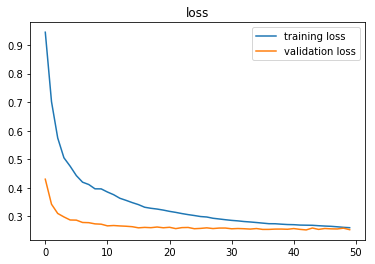

Plotting metrics...


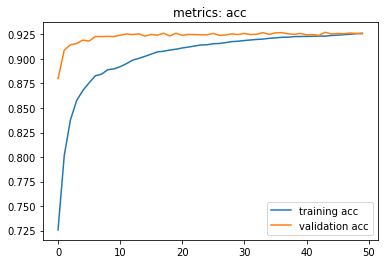

train {'acc': 0.93898183}
test {'acc': 0.9259}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9388387460012510162
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 8366725990073158385
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3031378 , acc = 0.06 
Epoch 1 , step 100 , loss= 2.1525507 , acc = 0.37 
Epoch 1 , step 200 , loss= 1.737782 , acc = 0.67 
Epoch 1 , step 300 , loss= 1.3641968 , acc = 0.7 
Epoch 1 , step 400 , loss= 1.1636928 , acc = 0.69 
Epoch 1 , step 500 , loss= 0.9407862 , acc = 0.77 
Epoch 1 , step 549 , loss= 0.7660928 val_loss= 0.85284305 , acc = 0.83 val acc = 0.8024 
Epoch 1 finished, loss= 1.4897486 
Epoch 2 , step 50 , loss= 0.8452375 , acc = 0.79 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 0.38369438 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.28921118 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.47022468 , acc = 0.88 
Epoch 20 , step 350 , loss= 0.42664707 , acc = 0.93 
Epoch 20 , step 450 , loss= 0.45660144 , acc = 0.92 
Epoch 20 , step 549 , loss= 0.47445488 val_loss= 0.3984513 , acc = 0.91 val acc = 0.924 
Epoch 20 finished, loss= 0.5203741 
Epoch 21 , step 0 , loss= 0.4828875 , acc = 0.88 
Epoch 21 , step 100 , loss= 0.4782225 , acc = 0.91 
Epoch 21 , step 200 , loss= 0.43468034 , acc = 0.89 
Epoch 21 , step 300 , loss= 0.37417307 , acc = 0.92 
Epoch 21 , step 400 , loss= 0.46323937 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.5567048 , acc = 0.87 
Epoch 21 , step 549 , loss= 0.4286547 val_loss= 0.39712992 , acc = 0.93 val acc = 0.9238 
Epoch 21 finished, loss= 0.5172788 
Epoch 22 , step 50 , loss= 0.43008596 , acc = 0.91 
Epoch 22 , step 150 , loss= 0.37864628 , acc = 0.92 
Epoch 22 , step 250 , loss= 0.4051409 , acc = 0.91 
Epoch 22 , step

Epoch 40 , step 50 , loss= 0.32167023 , acc = 0.97 
Epoch 40 , step 150 , loss= 0.4226067 , acc = 0.92 
Epoch 40 , step 250 , loss= 0.38534963 , acc = 0.95 
Epoch 40 , step 350 , loss= 0.3553607 , acc = 0.95 
Epoch 40 , step 450 , loss= 0.4822871 , acc = 0.9 
Epoch 40 , step 549 , loss= 0.45250446 val_loss= 0.38630858 , acc = 0.93 val acc = 0.9284 
Epoch 40 finished, loss= 0.4649128 
Epoch 41 , step 0 , loss= 0.34749493 , acc = 0.96 
Epoch 41 , step 100 , loss= 0.32576156 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.28796598 , acc = 0.95 
Epoch 41 , step 300 , loss= 0.41483456 , acc = 0.95 
Epoch 41 , step 400 , loss= 0.3582724 , acc = 0.94 
Epoch 41 , step 500 , loss= 0.26971668 , acc = 0.97 
Epoch 41 , step 549 , loss= 0.33987105 val_loss= 0.38749152 , acc = 0.94 val acc = 0.9274 
Epoch 41 finished, loss= 0.4615028 
Epoch 42 , step 50 , loss= 0.4264154 , acc = 0.94 
Epoch 42 , step 150 , loss= 0.3326894 , acc = 0.92 
Epoch 42 , step 250 , loss= 0.48798615 , acc = 0.91 
Epoch 42 , step

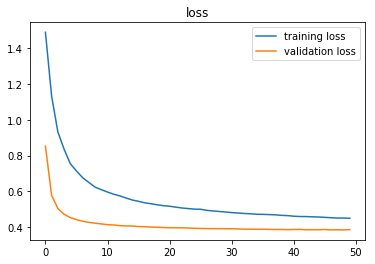

Plotting metrics...


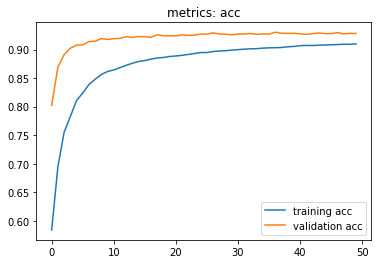

train {'acc': 0.9314}
test {'acc': 0.9242}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8765400601529015221
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 5505497670839860283
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.297637 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.9505711 , acc = 0.56 
Epoch 1 , step 200 , loss= 1.5833026 , acc = 0.72 
Epoch 1 , step 300 , loss= 1.253118 , acc = 0.86 
Epoch 1 , step 400 , loss= 1.1999769 , acc = 0.83 
Epoch 1 , step 500 , loss= 1.0619253 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.9039074 val_loss= 0.95989096 , acc = 0.89 val acc = 0.8694 
Epoch 1 finished, loss= 1.4643482 
Epoch 2 , step 50 , loss= 0.9852367 , acc = 0.82 
Epoch 2 , step 150 , loss=

Epoch 20 , step 50 , loss= 0.8067403 , acc = 0.88 
Epoch 20 , step 150 , loss= 0.5239806 , acc = 0.92 
Epoch 20 , step 250 , loss= 0.6175206 , acc = 0.91 
Epoch 20 , step 350 , loss= 0.35468152 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.65448976 , acc = 0.93 
Epoch 20 , step 549 , loss= 0.52151525 val_loss= 0.51105493 , acc = 0.91 val acc = 0.9246 
Epoch 20 finished, loss= 0.6297542 
Epoch 21 , step 0 , loss= 0.61769545 , acc = 0.87 
Epoch 21 , step 100 , loss= 0.68205655 , acc = 0.87 
Epoch 21 , step 200 , loss= 0.40861478 , acc = 0.91 
Epoch 21 , step 300 , loss= 0.58832866 , acc = 0.91 
Epoch 21 , step 400 , loss= 0.41489354 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.7105063 , acc = 0.9 
Epoch 21 , step 549 , loss= 0.36803532 val_loss= 0.5126436 , acc = 0.93 val acc = 0.9242 
Epoch 21 finished, loss= 0.62524205 
Epoch 22 , step 50 , loss= 0.36249337 , acc = 0.95 
Epoch 22 , step 150 , loss= 0.61119187 , acc = 0.91 
Epoch 22 , step 250 , loss= 0.4366305 , acc = 0.95 
Epoch 22 , ste

Epoch 40 , step 50 , loss= 0.46147573 , acc = 0.94 
Epoch 40 , step 150 , loss= 0.55802965 , acc = 0.9 
Epoch 40 , step 250 , loss= 0.63738406 , acc = 0.91 
Epoch 40 , step 350 , loss= 0.3388813 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.6456828 , acc = 0.91 
Epoch 40 , step 549 , loss= 0.38051462 val_loss= 0.5004108 , acc = 0.97 val acc = 0.9292 
Epoch 40 finished, loss= 0.5692752 
Epoch 41 , step 0 , loss= 0.44288385 , acc = 0.95 
Epoch 41 , step 100 , loss= 0.38511163 , acc = 0.95 
Epoch 41 , step 200 , loss= 0.3994617 , acc = 0.94 
Epoch 41 , step 300 , loss= 0.59338856 , acc = 0.93 
Epoch 41 , step 400 , loss= 0.33876556 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.5357034 , acc = 0.91 
Epoch 41 , step 549 , loss= 0.36002237 val_loss= 0.49893063 , acc = 0.95 val acc = 0.9294 
Epoch 41 finished, loss= 0.56579363 
Epoch 42 , step 50 , loss= 0.37865603 , acc = 0.92 
Epoch 42 , step 150 , loss= 0.73880136 , acc = 0.93 
Epoch 42 , step 250 , loss= 0.50410783 , acc = 0.93 
Epoch 42 , st

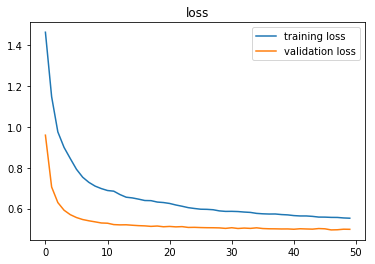

Plotting metrics...


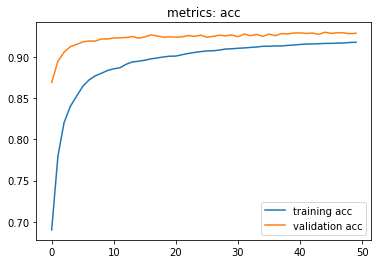

train {'acc': 0.93125457}
test {'acc': 0.9218}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14457355825096065101
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 8036396520462295764
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3011835 , acc = 0.16 
Epoch 1 , step 100 , loss= 1.9719384 , acc = 0.4 
Epoch 1 , step 200 , loss= 1.3793265 , acc = 0.84 
Epoch 1 , step 300 , loss= 1.249336 , acc = 0.76 
Epoch 1 , step 400 , loss= 1.0620005 , acc = 0.87 
Epoch 1 , step 500 , loss= 0.9631466 , acc = 0.86 
Epoch 1 , step 549 , loss= 0.9521043 val_loss= 0.90162396 , acc = 0.86 val acc = 0.88 
Epoch 1 finished, loss= 1.4112908 
Epoch 2 , step 50 , loss= 0.9724239 , acc = 0.8 
Epoch 2 , step 150 , loss

Epoch 20 , step 50 , loss= 0.537694 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.43866518 , acc = 0.93 
Epoch 20 , step 250 , loss= 0.8267572 , acc = 0.89 
Epoch 20 , step 350 , loss= 0.7734308 , acc = 0.9 
Epoch 20 , step 450 , loss= 0.44777796 , acc = 0.92 
Epoch 20 , step 549 , loss= 0.5775398 val_loss= 0.56011045 , acc = 0.92 val acc = 0.9236 
Epoch 20 finished, loss= 0.65411365 
Epoch 21 , step 0 , loss= 0.79424214 , acc = 0.89 
Epoch 21 , step 100 , loss= 0.46674132 , acc = 0.93 
Epoch 21 , step 200 , loss= 0.7052884 , acc = 0.92 
Epoch 21 , step 300 , loss= 0.6768 , acc = 0.91 
Epoch 21 , step 400 , loss= 0.39371076 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.49824467 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.3987391 val_loss= 0.5586324 , acc = 0.93 val acc = 0.9238 
Epoch 21 finished, loss= 0.6494054 
Epoch 22 , step 50 , loss= 0.4110126 , acc = 0.93 
Epoch 22 , step 150 , loss= 0.47849035 , acc = 0.94 
Epoch 22 , step 250 , loss= 0.71879715 , acc = 0.94 
Epoch 22 , step 350 ,

Epoch 40 , step 50 , loss= 0.67656636 , acc = 0.91 
Epoch 40 , step 150 , loss= 0.41692555 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.3710239 , acc = 0.93 
Epoch 40 , step 350 , loss= 0.41507196 , acc = 0.92 
Epoch 40 , step 450 , loss= 0.7631109 , acc = 0.88 
Epoch 40 , step 549 , loss= 0.60626906 val_loss= 0.5564281 , acc = 0.92 val acc = 0.9226 
Epoch 40 finished, loss= 0.5884874 
Epoch 41 , step 0 , loss= 0.6773711 , acc = 0.91 
Epoch 41 , step 100 , loss= 0.47464067 , acc = 0.88 
Epoch 41 , step 200 , loss= 0.43218482 , acc = 0.94 
Epoch 41 , step 300 , loss= 0.4038996 , acc = 0.94 
Epoch 41 , step 400 , loss= 0.3660338 , acc = 0.96 
Epoch 41 , step 500 , loss= 0.3584569 , acc = 0.95 
Epoch 41 , step 549 , loss= 0.5170076 val_loss= 0.5568018 , acc = 0.88 val acc = 0.922 
Epoch 41 finished, loss= 0.58515465 
Epoch 42 , step 50 , loss= 0.51461875 , acc = 0.89 
Epoch 42 , step 150 , loss= 0.5189209 , acc = 0.94 
Epoch 42 , step 250 , loss= 0.61651766 , acc = 0.91 
Epoch 42 , step 35

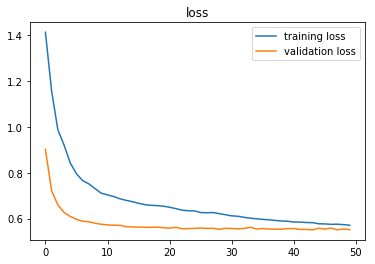

Plotting metrics...


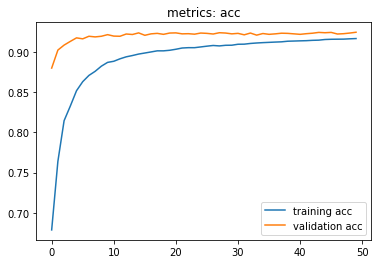

train {'acc': 0.9315818}
test {'acc': 0.9205}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 439536937817567601
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 10683163900125067409
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3129046 , acc = 0.09 
Epoch 1 , step 100 , loss= 1.7474535 , acc = 0.51 
Epoch 1 , step 200 , loss= 1.1140263 , acc = 0.81 
Epoch 1 , step 300 , loss= 1.0140429 , acc = 0.78 
Epoch 1 , step 400 , loss= 0.87985057 , acc = 0.79 
Epoch 1 , step 500 , loss= 0.85987556 , acc = 0.82 
Epoch 1 , step 549 , loss= 0.72231424 val_loss= 0.72580516 , acc = 0.89 val acc = 0.8802 
Epoch 1 finished, loss= 1.235781 
Epoch 2 , step 50 , loss= 0.772544 , acc = 0.84 
Epoch 2 , step 150 

Epoch 19 , step 549 , loss= 0.33932862 val_loss= 0.4657489 , acc = 0.94 val acc = 0.9268 
Epoch 19 finished, loss= 0.5313778 
Epoch 20 , step 50 , loss= 0.5296124 , acc = 0.92 
Epoch 20 , step 150 , loss= 0.6007025 , acc = 0.93 
Epoch 20 , step 250 , loss= 0.28192607 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.4243833 , acc = 0.93 
Epoch 20 , step 450 , loss= 0.4989713 , acc = 0.92 
Epoch 20 , step 549 , loss= 0.36183286 val_loss= 0.4674724 , acc = 0.93 val acc = 0.9266 
Epoch 20 finished, loss= 0.5276022 
Epoch 21 , step 0 , loss= 0.76161647 , acc = 0.88 
Epoch 21 , step 100 , loss= 0.46321225 , acc = 0.9 
Epoch 21 , step 200 , loss= 0.42650464 , acc = 0.91 
Epoch 21 , step 300 , loss= 0.38891745 , acc = 0.91 
Epoch 21 , step 400 , loss= 0.5356753 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.42185742 , acc = 0.9 
Epoch 21 , step 549 , loss= 0.5763772 val_loss= 0.46384177 , acc = 0.9 val acc = 0.9258 
Epoch 21 finished, loss= 0.52673316 
Epoch 22 , step 50 , loss= 0.35537654 , acc = 0.9

Epoch 39 , step 500 , loss= 0.53691524 , acc = 0.92 
Epoch 39 , step 549 , loss= 0.59335065 val_loss= 0.45346457 , acc = 0.9 val acc = 0.928 
Epoch 39 finished, loss= 0.47911474 
Epoch 40 , step 50 , loss= 0.38747013 , acc = 0.93 
Epoch 40 , step 150 , loss= 0.29781696 , acc = 0.97 
Epoch 40 , step 250 , loss= 0.35547423 , acc = 0.92 
Epoch 40 , step 350 , loss= 0.33051622 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.28021568 , acc = 0.92 
Epoch 40 , step 549 , loss= 0.40864402 val_loss= 0.4528814 , acc = 0.93 val acc = 0.9292 
Epoch 40 finished, loss= 0.4759819 
Epoch 41 , step 0 , loss= 0.47200307 , acc = 0.92 
Epoch 41 , step 100 , loss= 0.6224849 , acc = 0.92 
Epoch 41 , step 200 , loss= 0.47414598 , acc = 0.95 
Epoch 41 , step 300 , loss= 0.49376893 , acc = 0.9 
Epoch 41 , step 400 , loss= 0.41172922 , acc = 0.92 
Epoch 41 , step 500 , loss= 0.41497728 , acc = 0.96 
Epoch 41 , step 549 , loss= 0.34640992 val_loss= 0.45346886 , acc = 0.94 val acc = 0.9278 
Epoch 41 finished, loss= 0

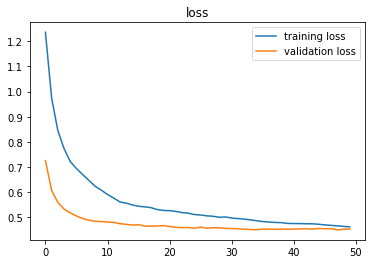

Plotting metrics...


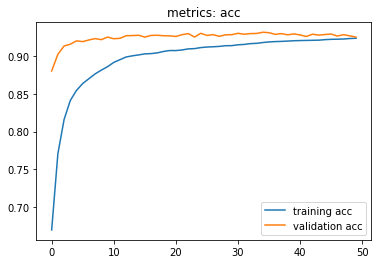

train {'acc': 0.9390909}
test {'acc': 0.9262}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11818244060176612074
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 3921416884521094976
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3054721 , acc = 0.09 
Epoch 1 , step 100 , loss= 1.4614601 , acc = 0.68 
Epoch 1 , step 200 , loss= 0.7376614 , acc = 0.83 
Epoch 1 , step 300 , loss= 0.6459557 , acc = 0.78 
Epoch 1 , step 400 , loss= 0.49573913 , acc = 0.86 
Epoch 1 , step 500 , loss= 0.43709716 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.480987 val_loss= 0.4168367 , acc = 0.89 val acc = 0.8874 
Epoch 1 finished, loss= 0.9377675 
Epoch 2 , step 50 , loss= 0.42181805 , acc = 0.89 
Epoch 2 , step 150 ,

Epoch 19 , step 549 , loss= 0.1699735 val_loss= 0.255855 , acc = 0.96 val acc = 0.9262 
Epoch 19 finished, loss= 0.31257546 
Epoch 20 , step 50 , loss= 0.17560072 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.22079034 , acc = 0.94 
Epoch 20 , step 250 , loss= 0.24747217 , acc = 0.9 
Epoch 20 , step 350 , loss= 0.22128636 , acc = 0.93 
Epoch 20 , step 450 , loss= 0.22034918 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.14072315 val_loss= 0.25433144 , acc = 0.96 val acc = 0.9274 
Epoch 20 finished, loss= 0.3075814 
Epoch 21 , step 0 , loss= 0.3142657 , acc = 0.89 
Epoch 21 , step 100 , loss= 0.29371586 , acc = 0.93 
Epoch 21 , step 200 , loss= 0.147394 , acc = 0.93 
Epoch 21 , step 300 , loss= 0.2041694 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.38238275 , acc = 0.92 
Epoch 21 , step 500 , loss= 0.31726396 , acc = 0.9 
Epoch 21 , step 549 , loss= 0.38445252 val_loss= 0.25382745 , acc = 0.92 val acc = 0.9294 
Epoch 21 finished, loss= 0.30678266 
Epoch 22 , step 50 , loss= 0.23568682 , acc = 

Epoch 39 , step 400 , loss= 0.20387454 , acc = 0.95 
Epoch 39 , step 500 , loss= 0.15959674 , acc = 0.95 
Epoch 39 , step 549 , loss= 0.3257036 val_loss= 0.24857098 , acc = 0.88 val acc = 0.933 
Epoch 39 finished, loss= 0.27644375 
Epoch 40 , step 50 , loss= 0.14997688 , acc = 0.92 
Epoch 40 , step 150 , loss= 0.3661656 , acc = 0.87 
Epoch 40 , step 250 , loss= 0.23628765 , acc = 0.91 
Epoch 40 , step 350 , loss= 0.31641233 , acc = 0.92 
Epoch 40 , step 450 , loss= 0.20253536 , acc = 0.95 
Epoch 40 , step 549 , loss= 0.33465177 val_loss= 0.2537041 , acc = 0.9 val acc = 0.9278 
Epoch 40 finished, loss= 0.2762413 
Epoch 41 , step 0 , loss= 0.16877194 , acc = 0.97 
Epoch 41 , step 100 , loss= 0.13881867 , acc = 0.95 
Epoch 41 , step 200 , loss= 0.32469204 , acc = 0.88 
Epoch 41 , step 300 , loss= 0.38527206 , acc = 0.89 
Epoch 41 , step 400 , loss= 0.21196772 , acc = 0.95 
Epoch 41 , step 500 , loss= 0.24959777 , acc = 0.92 
Epoch 41 , step 549 , loss= 0.24336895 val_loss= 0.25023016 , ac

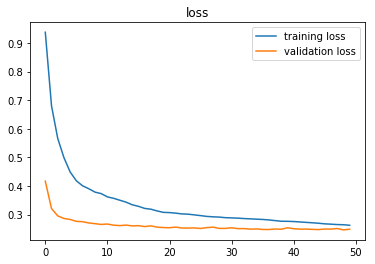

Plotting metrics...


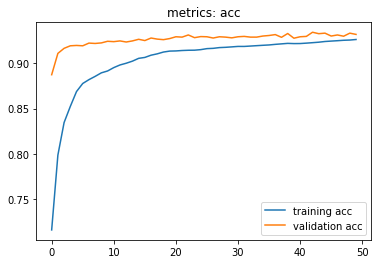

train {'acc': 0.94043636}
test {'acc': 0.9315}

Training student with temperature = 16 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11847494385323602821
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 16872791639805998395
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3035188 , acc = 0.13 
Epoch 1 , step 100 , loss= 2.1951582 , acc = 0.33 
Epoch 1 , step 200 , loss= 2.020604 , acc = 0.44 
Epoch 1 , step 300 , loss= 1.7855289 , acc = 0.46 
Epoch 1 , step 400 , loss= 1.5664163 , acc = 0.69 
Epoch 1 , step 500 , loss= 1.3888834 , acc = 0.73 
Epoch 1 , step 549 , loss= 1.3810997 val_loss= 1.3667417 , acc = 0.79 val acc = 0.722 
Epoch 1 finished, loss= 1.8058872 
Epoch 2 , step 50 , loss= 1.3468791 , acc = 0.72 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 0.96855986 , acc = 0.86 
Epoch 20 , step 150 , loss= 0.72200394 , acc = 0.92 
Epoch 20 , step 250 , loss= 1.0626472 , acc = 0.88 
Epoch 20 , step 350 , loss= 0.9049675 , acc = 0.91 
Epoch 20 , step 450 , loss= 0.8315764 , acc = 0.88 
Epoch 20 , step 549 , loss= 0.8928842 val_loss= 0.9411155 , acc = 0.9 val acc = 0.9046 
Epoch 20 finished, loss= 1.0523773 
Epoch 21 , step 0 , loss= 0.87045515 , acc = 0.92 
Epoch 21 , step 100 , loss= 0.92068434 , acc = 0.86 
Epoch 21 , step 200 , loss= 0.86291766 , acc = 0.92 
Epoch 21 , step 300 , loss= 0.98361284 , acc = 0.91 
Epoch 21 , step 400 , loss= 0.99951464 , acc = 0.88 
Epoch 21 , step 500 , loss= 0.93539244 , acc = 0.92 
Epoch 21 , step 549 , loss= 0.86013573 val_loss= 0.93956065 , acc = 0.9 val acc = 0.9058 
Epoch 21 finished, loss= 1.0455602 
Epoch 22 , step 50 , loss= 1.0165455 , acc = 0.86 
Epoch 22 , step 150 , loss= 1.0532507 , acc = 0.86 
Epoch 22 , step 250 , loss= 0.7283184 , acc = 0.97 
Epoch 22 , step 35

Epoch 40 , step 50 , loss= 0.9245312 , acc = 0.92 
Epoch 40 , step 150 , loss= 0.9090034 , acc = 0.96 
Epoch 40 , step 250 , loss= 0.90676355 , acc = 0.94 
Epoch 40 , step 350 , loss= 0.9843775 , acc = 0.94 
Epoch 40 , step 450 , loss= 0.9594378 , acc = 0.89 
Epoch 40 , step 549 , loss= 0.9602738 val_loss= 0.9211149 , acc = 0.88 val acc = 0.91 
Epoch 40 finished, loss= 1.0037228 
Epoch 41 , step 0 , loss= 0.96828735 , acc = 0.91 
Epoch 41 , step 100 , loss= 0.952889 , acc = 0.9 
Epoch 41 , step 200 , loss= 1.0787333 , acc = 0.84 
Epoch 41 , step 300 , loss= 0.9130401 , acc = 0.89 
Epoch 41 , step 400 , loss= 0.8643166 , acc = 0.93 
Epoch 41 , step 500 , loss= 1.1435101 , acc = 0.81 
Epoch 41 , step 549 , loss= 0.9510754 val_loss= 0.92074007 , acc = 0.97 val acc = 0.9074 
Epoch 41 finished, loss= 1.0031452 
Epoch 42 , step 50 , loss= 1.2647506 , acc = 0.78 
Epoch 42 , step 150 , loss= 1.0136402 , acc = 0.88 
Epoch 42 , step 250 , loss= 0.9935495 , acc = 0.92 
Epoch 42 , step 350 , loss=

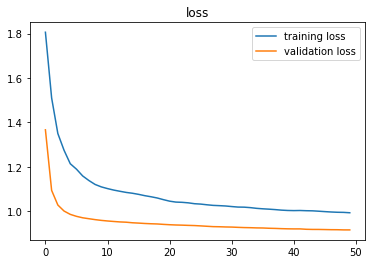

Plotting metrics...


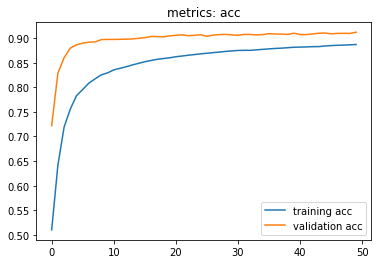

train {'acc': 0.91105455}
test {'acc': 0.9053}

Training student with temperature = 16 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3247801478327917403
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 15487092931889806317
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.296743 , acc = 0.12 
Epoch 1 , step 100 , loss= 2.0245092 , acc = 0.53 
Epoch 1 , step 200 , loss= 1.8048501 , acc = 0.82 
Epoch 1 , step 300 , loss= 1.6597321 , acc = 0.84 
Epoch 1 , step 400 , loss= 1.5787367 , acc = 0.87 
Epoch 1 , step 500 , loss= 1.4993601 , acc = 0.84 
Epoch 1 , step 549 , loss= 1.4431477 val_loss= 1.4492377 , acc = 0.85 val acc = 0.876 
Epoch 1 finished, loss= 1.758154 
Epoch 2 , step 50 , loss= 1.394185 , acc = 0.9 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 0.9832946 , acc = 0.93 
Epoch 20 , step 150 , loss= 1.0849407 , acc = 0.91 
Epoch 20 , step 250 , loss= 0.8488431 , acc = 0.95 
Epoch 20 , step 350 , loss= 1.002658 , acc = 0.91 
Epoch 20 , step 450 , loss= 1.0062128 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.9326528 val_loss= 0.9720213 , acc = 0.93 val acc = 0.9222 
Epoch 20 finished, loss= 1.093201 
Epoch 21 , step 0 , loss= 1.0427577 , acc = 0.9 
Epoch 21 , step 100 , loss= 1.0380902 , acc = 0.9 
Epoch 21 , step 200 , loss= 0.88178 , acc = 0.91 
Epoch 21 , step 300 , loss= 0.8828379 , acc = 0.97 
Epoch 21 , step 400 , loss= 1.2103591 , acc = 0.91 
Epoch 21 , step 500 , loss= 0.9456039 , acc = 0.94 
Epoch 21 , step 549 , loss= 1.1334021 val_loss= 0.9689727 , acc = 0.89 val acc = 0.9218 
Epoch 21 finished, loss= 1.0894232 
Epoch 22 , step 50 , loss= 0.99602807 , acc = 0.92 
Epoch 22 , step 150 , loss= 0.86153007 , acc = 0.94 
Epoch 22 , step 250 , loss= 0.8743479 , acc = 0.96 
Epoch 22 , step 350 , loss= 1.

Epoch 40 , step 50 , loss= 0.75935465 , acc = 0.96 
Epoch 40 , step 150 , loss= 1.1316149 , acc = 0.91 
Epoch 40 , step 250 , loss= 0.8298752 , acc = 0.94 
Epoch 40 , step 350 , loss= 0.98475206 , acc = 0.92 
Epoch 40 , step 450 , loss= 1.284734 , acc = 0.91 
Epoch 40 , step 549 , loss= 0.7550245 val_loss= 0.96133745 , acc = 0.96 val acc = 0.9244 
Epoch 40 finished, loss= 1.0370075 
Epoch 41 , step 0 , loss= 0.8406882 , acc = 0.95 
Epoch 41 , step 100 , loss= 0.93722856 , acc = 0.94 
Epoch 41 , step 200 , loss= 1.0591388 , acc = 0.9 
Epoch 41 , step 300 , loss= 1.0016987 , acc = 0.91 
Epoch 41 , step 400 , loss= 1.0669053 , acc = 0.86 
Epoch 41 , step 500 , loss= 0.8693999 , acc = 0.92 
Epoch 41 , step 549 , loss= 0.89736205 val_loss= 0.9604655 , acc = 0.94 val acc = 0.923 
Epoch 41 finished, loss= 1.0348104 
Epoch 42 , step 50 , loss= 1.1874945 , acc = 0.91 
Epoch 42 , step 150 , loss= 1.0732837 , acc = 0.89 
Epoch 42 , step 250 , loss= 0.89345384 , acc = 0.93 
Epoch 42 , step 350 , l

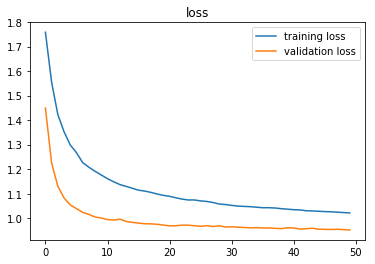

Plotting metrics...


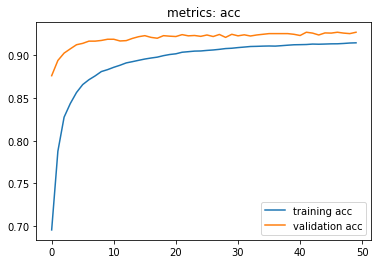

train {'acc': 0.9303455}
test {'acc': 0.9206}

Training student with temperature = 16 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7545012777595961740
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 684291153635317747
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3025212 , acc = 0.15 
Epoch 1 , step 100 , loss= 1.9410603 , acc = 0.54 
Epoch 1 , step 200 , loss= 1.4543257 , acc = 0.84 
Epoch 1 , step 300 , loss= 1.3023505 , acc = 0.85 
Epoch 1 , step 400 , loss= 1.3048319 , acc = 0.78 
Epoch 1 , step 500 , loss= 1.2295539 , acc = 0.84 
Epoch 1 , step 549 , loss= 1.1733778 val_loss= 1.1743989 , acc = 0.88 val acc = 0.8824 
Epoch 1 finished, loss= 1.5297174 
Epoch 2 , step 50 , loss= 1.2752532 , acc = 0.81 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 0.9943051 , acc = 0.91 
Epoch 20 , step 150 , loss= 0.8158494 , acc = 0.92 
Epoch 20 , step 250 , loss= 0.7530558 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.9525678 , acc = 0.95 
Epoch 20 , step 450 , loss= 0.9026197 , acc = 0.9 
Epoch 20 , step 549 , loss= 1.0843819 val_loss= 0.8866197 , acc = 0.91 val acc = 0.9236 
Epoch 20 finished, loss= 0.95184886 
Epoch 21 , step 0 , loss= 0.8132273 , acc = 0.91 
Epoch 21 , step 100 , loss= 0.7296894 , acc = 0.94 
Epoch 21 , step 200 , loss= 1.1064793 , acc = 0.93 
Epoch 21 , step 300 , loss= 0.8911839 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.90297526 , acc = 0.9 
Epoch 21 , step 500 , loss= 1.0349603 , acc = 0.91 
Epoch 21 , step 549 , loss= 0.71264964 val_loss= 0.8867854 , acc = 0.94 val acc = 0.9222 
Epoch 21 finished, loss= 0.94840527 
Epoch 22 , step 50 , loss= 0.7725587 , acc = 0.95 
Epoch 22 , step 150 , loss= 0.80265164 , acc = 0.92 
Epoch 22 , step 250 , loss= 0.6940641 , acc = 0.96 
Epoch 22 , step 350 , l

Epoch 40 , step 50 , loss= 0.7819845 , acc = 0.97 
Epoch 40 , step 150 , loss= 0.88017416 , acc = 0.94 
Epoch 40 , step 250 , loss= 1.0224276 , acc = 0.89 
Epoch 40 , step 350 , loss= 0.87316173 , acc = 0.91 
Epoch 40 , step 450 , loss= 0.9309368 , acc = 0.93 
Epoch 40 , step 549 , loss= 0.75229555 val_loss= 0.8761252 , acc = 0.92 val acc = 0.9244 
Epoch 40 finished, loss= 0.90242064 
Epoch 41 , step 0 , loss= 0.95261073 , acc = 0.93 
Epoch 41 , step 100 , loss= 0.95592827 , acc = 0.94 
Epoch 41 , step 200 , loss= 0.845585 , acc = 0.94 
Epoch 41 , step 300 , loss= 0.75746083 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.7112018 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.8583524 , acc = 0.93 
Epoch 41 , step 549 , loss= 0.6714981 val_loss= 0.8743465 , acc = 0.97 val acc = 0.9262 
Epoch 41 finished, loss= 0.90030706 
Epoch 42 , step 50 , loss= 0.8068171 , acc = 0.97 
Epoch 42 , step 150 , loss= 0.78921306 , acc = 0.93 
Epoch 42 , step 250 , loss= 0.9458583 , acc = 0.93 
Epoch 42 , step 35

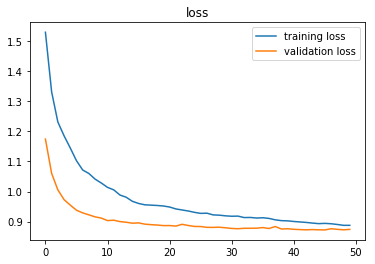

Plotting metrics...


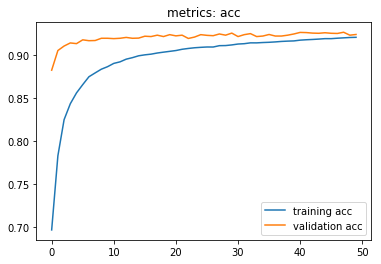

train {'acc': 0.9310727}
test {'acc': 0.9202}

Training student with temperature = 16 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2811499034454559787
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 8526941949327846466
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2977052 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.6897242 , acc = 0.61 
Epoch 1 , step 200 , loss= 1.134785 , acc = 0.82 
Epoch 1 , step 300 , loss= 0.9076266 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.84767365 , acc = 0.82 
Epoch 1 , step 500 , loss= 0.7624747 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.8081125 val_loss= 0.7960246 , acc = 0.86 val acc = 0.8916 
Epoch 1 finished, loss= 1.2068717 
Epoch 2 , step 50 , loss= 0.6658888 , acc = 0.92 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 0.7080519 , acc = 0.9 
Epoch 20 , step 150 , loss= 0.64693797 , acc = 0.92 
Epoch 20 , step 250 , loss= 0.79760385 , acc = 0.94 
Epoch 20 , step 350 , loss= 0.67914766 , acc = 0.92 
Epoch 20 , step 450 , loss= 0.7096525 , acc = 0.9 
Epoch 20 , step 549 , loss= 0.5237676 val_loss= 0.60292906 , acc = 0.96 val acc = 0.9284 
Epoch 20 finished, loss= 0.673229 
Epoch 21 , step 0 , loss= 0.65690124 , acc = 0.93 
Epoch 21 , step 100 , loss= 0.53880256 , acc = 0.95 
Epoch 21 , step 200 , loss= 0.5561627 , acc = 0.93 
Epoch 21 , step 300 , loss= 0.60744864 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.6156324 , acc = 0.92 
Epoch 21 , step 500 , loss= 0.4886592 , acc = 0.93 
Epoch 21 , step 549 , loss= 0.65769327 val_loss= 0.603417 , acc = 0.94 val acc = 0.9296 
Epoch 21 finished, loss= 0.6689129 
Epoch 22 , step 50 , loss= 0.664764 , acc = 0.87 
Epoch 22 , step 150 , loss= 0.5710907 , acc = 0.94 
Epoch 22 , step 250 , loss= 0.8852176 , acc = 0.88 
Epoch 22 , step 350 , l

Epoch 40 , step 50 , loss= 0.52731174 , acc = 0.97 
Epoch 40 , step 150 , loss= 0.5572433 , acc = 0.94 
Epoch 40 , step 250 , loss= 0.56994456 , acc = 0.94 
Epoch 40 , step 350 , loss= 0.5478657 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.5009635 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.4967681 val_loss= 0.5981521 , acc = 0.95 val acc = 0.9296 
Epoch 40 finished, loss= 0.6207913 
Epoch 41 , step 0 , loss= 0.6798533 , acc = 0.95 
Epoch 41 , step 100 , loss= 0.5964291 , acc = 0.95 
Epoch 41 , step 200 , loss= 0.66239333 , acc = 0.94 
Epoch 41 , step 300 , loss= 0.48082948 , acc = 0.93 
Epoch 41 , step 400 , loss= 0.68231666 , acc = 0.93 
Epoch 41 , step 500 , loss= 0.8248226 , acc = 0.88 
Epoch 41 , step 549 , loss= 0.63896763 val_loss= 0.6003043 , acc = 0.92 val acc = 0.9294 
Epoch 41 finished, loss= 0.6216155 
Epoch 42 , step 50 , loss= 0.56344044 , acc = 0.96 
Epoch 42 , step 150 , loss= 0.5893901 , acc = 0.92 
Epoch 42 , step 250 , loss= 0.5279803 , acc = 0.93 
Epoch 42 , step 350

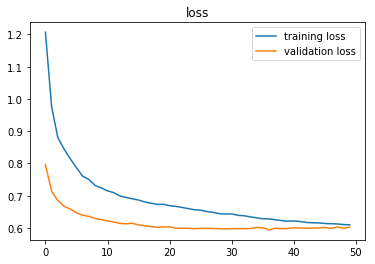

Plotting metrics...


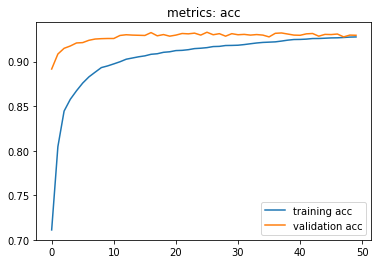

train {'acc': 0.9412}
test {'acc': 0.9298}

Training student with temperature = 16 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13820316784283942000
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 15690778789701489489
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2911446 , acc = 0.14 
Epoch 1 , step 100 , loss= 1.4862078 , acc = 0.56 
Epoch 1 , step 200 , loss= 0.7762329 , acc = 0.84 
Epoch 1 , step 300 , loss= 0.79137003 , acc = 0.84 
Epoch 1 , step 400 , loss= 0.42406422 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.7498387 , acc = 0.83 
Epoch 1 , step 549 , loss= 0.4768321 val_loss= 0.43039745 , acc = 0.87 val acc = 0.8804 
Epoch 1 finished, loss= 0.9993843 
Epoch 2 , step 50 , loss= 0.50507796 , acc = 0.83 
Epoch 2 , step 150 

Epoch 19 , step 549 , loss= 0.15169004 val_loss= 0.2704714 , acc = 0.95 val acc = 0.9254 
Epoch 19 finished, loss= 0.32803166 
Epoch 20 , step 50 , loss= 0.22302589 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.36923543 , acc = 0.89 
Epoch 20 , step 250 , loss= 0.26187634 , acc = 0.94 
Epoch 20 , step 350 , loss= 0.1908216 , acc = 0.94 
Epoch 20 , step 450 , loss= 0.29102656 , acc = 0.91 
Epoch 20 , step 549 , loss= 0.30803794 val_loss= 0.2679425 , acc = 0.93 val acc = 0.9258 
Epoch 20 finished, loss= 0.32553804 
Epoch 21 , step 0 , loss= 0.33883765 , acc = 0.91 
Epoch 21 , step 100 , loss= 0.23080456 , acc = 0.91 
Epoch 21 , step 200 , loss= 0.3568757 , acc = 0.92 
Epoch 21 , step 300 , loss= 0.35588777 , acc = 0.91 
Epoch 21 , step 400 , loss= 0.2222775 , acc = 0.93 
Epoch 21 , step 500 , loss= 0.3591048 , acc = 0.92 
Epoch 21 , step 549 , loss= 0.3939507 val_loss= 0.2656676 , acc = 0.92 val acc = 0.9264 
Epoch 21 finished, loss= 0.32538456 
Epoch 22 , step 50 , loss= 0.15281276 , acc 

Epoch 39 , step 400 , loss= 0.22387457 , acc = 0.91 
Epoch 39 , step 500 , loss= 0.32033664 , acc = 0.94 
Epoch 39 , step 549 , loss= 0.23428343 val_loss= 0.25370693 , acc = 0.91 val acc = 0.9278 
Epoch 39 finished, loss= 0.28528646 
Epoch 40 , step 50 , loss= 0.18390113 , acc = 0.96 
Epoch 40 , step 150 , loss= 0.32368663 , acc = 0.95 
Epoch 40 , step 250 , loss= 0.31158432 , acc = 0.92 
Epoch 40 , step 350 , loss= 0.21435426 , acc = 0.93 
Epoch 40 , step 450 , loss= 0.15709095 , acc = 0.96 
Epoch 40 , step 549 , loss= 0.3087684 val_loss= 0.25905114 , acc = 0.93 val acc = 0.927 
Epoch 40 finished, loss= 0.28446978 
Epoch 41 , step 0 , loss= 0.15767989 , acc = 0.97 
Epoch 41 , step 100 , loss= 0.24408817 , acc = 0.93 
Epoch 41 , step 200 , loss= 0.211281 , acc = 0.97 
Epoch 41 , step 300 , loss= 0.26630235 , acc = 0.9 
Epoch 41 , step 400 , loss= 0.25166968 , acc = 0.91 
Epoch 41 , step 500 , loss= 0.25492054 , acc = 0.94 
Epoch 41 , step 549 , loss= 0.11288127 val_loss= 0.25503868 , a

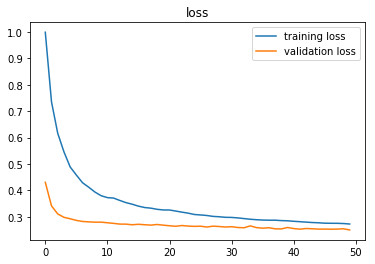

Plotting metrics...


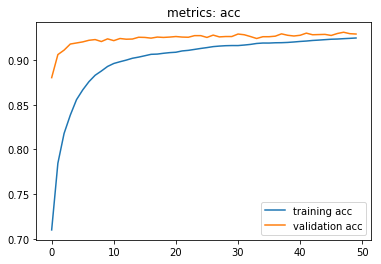

train {'acc': 0.93923634}
test {'acc': 0.93}

Training student with temperature = 32 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4049867704321119563
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 16219054184972327598
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3022985 , acc = 0.12 
Epoch 1 , step 100 , loss= 2.2633631 , acc = 0.18 
Epoch 1 , step 200 , loss= 2.1765406 , acc = 0.31 
Epoch 1 , step 300 , loss= 2.0125751 , acc = 0.45 
Epoch 1 , step 400 , loss= 2.0014613 , acc = 0.51 
Epoch 1 , step 500 , loss= 1.9392589 , acc = 0.57 
Epoch 1 , step 549 , loss= 1.9947641 val_loss= 1.923602 , acc = 0.44 val acc = 0.5464 
Epoch 1 finished, loss= 2.0986087 
Epoch 2 , step 50 , loss= 1.9447294 , acc = 0.56 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 1.7044443 , acc = 0.88 
Epoch 20 , step 150 , loss= 1.7490965 , acc = 0.89 
Epoch 20 , step 250 , loss= 1.7166699 , acc = 0.87 
Epoch 20 , step 350 , loss= 1.8202952 , acc = 0.86 
Epoch 20 , step 450 , loss= 1.8049904 , acc = 0.87 
Epoch 20 , step 549 , loss= 1.7217395 val_loss= 1.7076144 , acc = 0.87 val acc = 0.8724 
Epoch 20 finished, loss= 1.7754433 
Epoch 21 , step 0 , loss= 1.755166 , acc = 0.89 
Epoch 21 , step 100 , loss= 1.7206274 , acc = 0.89 
Epoch 21 , step 200 , loss= 1.8310504 , acc = 0.8 
Epoch 21 , step 300 , loss= 1.7127876 , acc = 0.85 
Epoch 21 , step 400 , loss= 1.7441553 , acc = 0.92 
Epoch 21 , step 500 , loss= 1.7576935 , acc = 0.9 
Epoch 21 , step 549 , loss= 1.6921748 val_loss= 1.7069472 , acc = 0.88 val acc = 0.8738 
Epoch 21 finished, loss= 1.773878 
Epoch 22 , step 50 , loss= 1.7983083 , acc = 0.87 
Epoch 22 , step 150 , loss= 1.672967 , acc = 0.91 
Epoch 22 , step 250 , loss= 1.7766485 , acc = 0.89 
Epoch 22 , step 350 , loss= 1.6

Epoch 40 , step 150 , loss= 1.7129085 , acc = 0.89 
Epoch 40 , step 250 , loss= 1.8530067 , acc = 0.82 
Epoch 40 , step 350 , loss= 1.7397239 , acc = 0.89 
Epoch 40 , step 450 , loss= 1.6153876 , acc = 0.87 
Epoch 40 , step 549 , loss= 1.6798717 val_loss= 1.6990037 , acc = 0.89 val acc = 0.885 
Epoch 40 finished, loss= 1.7487744 
Epoch 41 , step 0 , loss= 1.6824924 , acc = 0.89 
Epoch 41 , step 100 , loss= 1.7468731 , acc = 0.85 
Epoch 41 , step 200 , loss= 1.7913177 , acc = 0.87 
Epoch 41 , step 300 , loss= 1.6988308 , acc = 0.9 
Epoch 41 , step 400 , loss= 1.6910827 , acc = 0.87 
Epoch 41 , step 500 , loss= 1.6436507 , acc = 0.88 
Epoch 41 , step 549 , loss= 1.7083882 val_loss= 1.6987406 , acc = 0.9 val acc = 0.8836 
Epoch 41 finished, loss= 1.7477303 
Epoch 42 , step 50 , loss= 1.6753113 , acc = 0.92 
Epoch 42 , step 150 , loss= 1.7521119 , acc = 0.88 
Epoch 42 , step 250 , loss= 1.6995462 , acc = 0.92 
Epoch 42 , step 350 , loss= 1.7910806 , acc = 0.85 
Epoch 42 , step 450 , loss= 

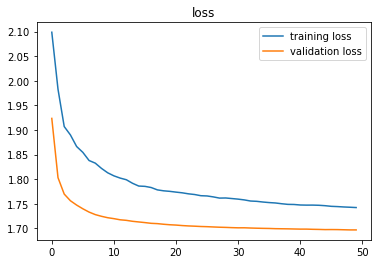

Plotting metrics...


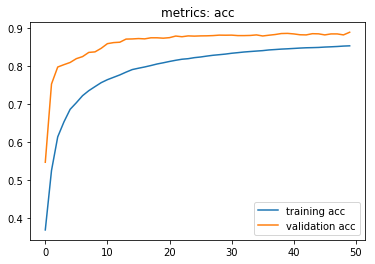

train {'acc': 0.8881091}
test {'acc': 0.8879}

Training student with temperature = 32 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7729442656740965775
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 769045598594034014
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.300528 , acc = 0.17 
Epoch 1 , step 100 , loss= 2.054504 , acc = 0.55 
Epoch 1 , step 200 , loss= 1.8736123 , acc = 0.89 
Epoch 1 , step 300 , loss= 1.772992 , acc = 0.89 
Epoch 1 , step 400 , loss= 1.7987328 , acc = 0.79 
Epoch 1 , step 500 , loss= 1.7590355 , acc = 0.86 
Epoch 1 , step 549 , loss= 1.7305492 val_loss= 1.7391586 , acc = 0.86 val acc = 0.874 
Epoch 1 finished, loss= 1.8985647 
Epoch 2 , step 50 , loss= 1.7572168 , acc = 0.86 
Epoch 2 , step 150 , loss

Epoch 20 , step 50 , loss= 1.5889649 , acc = 0.92 
Epoch 20 , step 150 , loss= 1.5402277 , acc = 0.93 
Epoch 20 , step 250 , loss= 1.5949242 , acc = 0.89 
Epoch 20 , step 350 , loss= 1.4590614 , acc = 0.95 
Epoch 20 , step 450 , loss= 1.573986 , acc = 0.87 
Epoch 20 , step 549 , loss= 1.737681 val_loss= 1.5322106 , acc = 0.82 val acc = 0.925 
Epoch 20 finished, loss= 1.5971435 
Epoch 21 , step 0 , loss= 1.5595233 , acc = 0.93 
Epoch 21 , step 100 , loss= 1.5419085 , acc = 0.91 
Epoch 21 , step 200 , loss= 1.4748589 , acc = 0.93 
Epoch 21 , step 300 , loss= 1.5033649 , acc = 0.92 
Epoch 21 , step 400 , loss= 1.4632338 , acc = 0.95 
Epoch 21 , step 500 , loss= 1.424317 , acc = 0.93 
Epoch 21 , step 549 , loss= 1.7468697 val_loss= 1.5319109 , acc = 0.92 val acc = 0.9242 
Epoch 21 finished, loss= 1.5937425 
Epoch 22 , step 50 , loss= 1.5606592 , acc = 0.91 
Epoch 22 , step 150 , loss= 1.6305379 , acc = 0.94 
Epoch 22 , step 250 , loss= 1.480116 , acc = 0.93 
Epoch 22 , step 350 , loss= 1.5

Epoch 40 , step 150 , loss= 1.58211 , acc = 0.95 
Epoch 40 , step 250 , loss= 1.4485562 , acc = 0.92 
Epoch 40 , step 350 , loss= 1.4326564 , acc = 0.94 
Epoch 40 , step 450 , loss= 1.4616462 , acc = 0.91 
Epoch 40 , step 549 , loss= 1.4430741 val_loss= 1.5155066 , acc = 0.94 val acc = 0.9302 
Epoch 40 finished, loss= 1.557537 
Epoch 41 , step 0 , loss= 1.4530916 , acc = 0.91 
Epoch 41 , step 100 , loss= 1.434295 , acc = 0.93 
Epoch 41 , step 200 , loss= 1.4328328 , acc = 0.92 
Epoch 41 , step 300 , loss= 1.4437232 , acc = 0.95 
Epoch 41 , step 400 , loss= 1.3316916 , acc = 0.97 
Epoch 41 , step 500 , loss= 1.5253482 , acc = 0.89 
Epoch 41 , step 549 , loss= 1.4751668 val_loss= 1.5177245 , acc = 0.95 val acc = 0.929 
Epoch 41 finished, loss= 1.5545158 
Epoch 42 , step 50 , loss= 1.4266576 , acc = 0.97 
Epoch 42 , step 150 , loss= 1.4846157 , acc = 0.94 
Epoch 42 , step 250 , loss= 1.6445824 , acc = 0.93 
Epoch 42 , step 350 , loss= 1.7241054 , acc = 0.89 
Epoch 42 , step 450 , loss= 1.

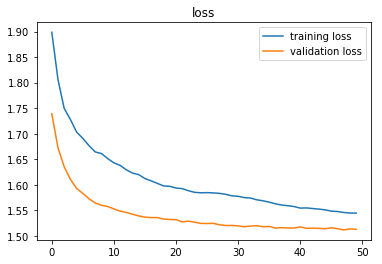

Plotting metrics...


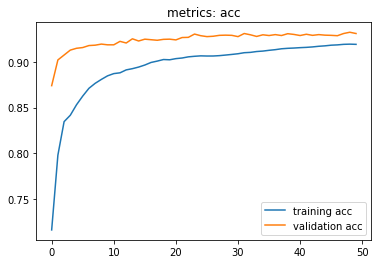

train {'acc': 0.9351818}
test {'acc': 0.9286}

Training student with temperature = 32 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15601319962939585180
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 4032359384320625356
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.303598 , acc = 0.07 
Epoch 1 , step 100 , loss= 1.9904242 , acc = 0.49 
Epoch 1 , step 200 , loss= 1.5972346 , acc = 0.77 
Epoch 1 , step 300 , loss= 1.4315407 , acc = 0.81 
Epoch 1 , step 400 , loss= 1.3381097 , acc = 0.87 
Epoch 1 , step 500 , loss= 1.4010276 , acc = 0.87 
Epoch 1 , step 549 , loss= 1.3226377 val_loss= 1.3270433 , acc = 0.89 val acc = 0.871 
Epoch 1 finished, loss= 1.6263676 
Epoch 2 , step 50 , loss= 1.4542483 , acc = 0.89 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 1.0741726 , acc = 0.97 
Epoch 20 , step 150 , loss= 1.2195454 , acc = 0.9 
Epoch 20 , step 250 , loss= 1.2262855 , acc = 0.87 
Epoch 20 , step 350 , loss= 1.3187604 , acc = 0.87 
Epoch 20 , step 450 , loss= 1.127712 , acc = 0.93 
Epoch 20 , step 549 , loss= 1.1621938 val_loss= 1.1742215 , acc = 0.91 val acc = 0.9238 
Epoch 20 finished, loss= 1.2218909 
Epoch 21 , step 0 , loss= 1.2001768 , acc = 0.92 
Epoch 21 , step 100 , loss= 1.1102163 , acc = 0.94 
Epoch 21 , step 200 , loss= 1.1398492 , acc = 0.93 
Epoch 21 , step 300 , loss= 1.0988308 , acc = 0.95 
Epoch 21 , step 400 , loss= 1.1745412 , acc = 0.91 
Epoch 21 , step 500 , loss= 1.1653547 , acc = 0.94 
Epoch 21 , step 549 , loss= 1.1291609 val_loss= 1.1727308 , acc = 0.94 val acc = 0.9252 
Epoch 21 finished, loss= 1.217985 
Epoch 22 , step 50 , loss= 1.1949537 , acc = 0.89 
Epoch 22 , step 150 , loss= 1.2281002 , acc = 0.9 
Epoch 22 , step 250 , loss= 1.1571908 , acc = 0.93 
Epoch 22 , step 350 , loss= 1.

Epoch 40 , step 150 , loss= 1.2318318 , acc = 0.94 
Epoch 40 , step 250 , loss= 1.1109433 , acc = 0.89 
Epoch 40 , step 350 , loss= 1.2551885 , acc = 0.92 
Epoch 40 , step 450 , loss= 1.1133583 , acc = 0.93 
Epoch 40 , step 549 , loss= 1.1619227 val_loss= 1.1620986 , acc = 0.93 val acc = 0.9272 
Epoch 40 finished, loss= 1.1843078 
Epoch 41 , step 0 , loss= 1.218054 , acc = 0.93 
Epoch 41 , step 100 , loss= 1.0906678 , acc = 0.94 
Epoch 41 , step 200 , loss= 1.1174057 , acc = 0.94 
Epoch 41 , step 300 , loss= 1.0976381 , acc = 0.93 
Epoch 41 , step 400 , loss= 1.0791028 , acc = 0.97 
Epoch 41 , step 500 , loss= 1.10465 , acc = 0.95 
Epoch 41 , step 549 , loss= 1.0607309 val_loss= 1.1618749 , acc = 0.94 val acc = 0.9302 
Epoch 41 finished, loss= 1.1823531 
Epoch 42 , step 50 , loss= 1.1022655 , acc = 0.95 
Epoch 42 , step 150 , loss= 1.1191242 , acc = 0.94 
Epoch 42 , step 250 , loss= 1.10027 , acc = 0.94 
Epoch 42 , step 350 , loss= 1.0786991 , acc = 0.96 
Epoch 42 , step 450 , loss= 1.

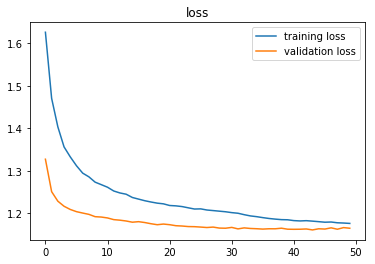

Plotting metrics...


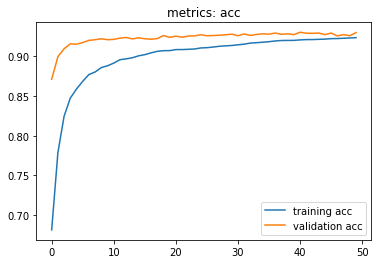

train {'acc': 0.93807274}
test {'acc': 0.9293}

Training student with temperature = 32 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11263355765630550542
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 741994237482924781
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.312253 , acc = 0.09 
Epoch 1 , step 100 , loss= 1.7376151 , acc = 0.5 
Epoch 1 , step 200 , loss= 1.1647644 , acc = 0.81 
Epoch 1 , step 300 , loss= 1.0357065 , acc = 0.79 
Epoch 1 , step 400 , loss= 0.8794172 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.950627 , acc = 0.84 
Epoch 1 , step 549 , loss= 0.82037413 val_loss= 0.8734327 , acc = 0.9 val acc = 0.882 
Epoch 1 finished, loss= 1.2715368 
Epoch 2 , step 50 , loss= 0.9050994 , acc = 0.84 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 0.7807941 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.682334 , acc = 0.94 
Epoch 20 , step 250 , loss= 0.72671056 , acc = 0.94 
Epoch 20 , step 350 , loss= 0.61185557 , acc = 0.96 
Epoch 20 , step 450 , loss= 0.64489716 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.8573936 val_loss= 0.7268865 , acc = 0.88 val acc = 0.928 
Epoch 20 finished, loss= 0.7807488 
Epoch 21 , step 0 , loss= 0.661206 , acc = 0.92 
Epoch 21 , step 100 , loss= 0.7730391 , acc = 0.88 
Epoch 21 , step 200 , loss= 0.6788893 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.7298411 , acc = 0.92 
Epoch 21 , step 400 , loss= 0.67485625 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.6282126 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.70383215 val_loss= 0.72485924 , acc = 0.93 val acc = 0.9274 
Epoch 21 finished, loss= 0.77625704 
Epoch 22 , step 50 , loss= 0.6304468 , acc = 0.96 
Epoch 22 , step 150 , loss= 0.6593143 , acc = 0.95 
Epoch 22 , step 250 , loss= 0.7089733 , acc = 0.94 
Epoch 22 , step 350 , 

Epoch 40 , step 50 , loss= 0.7700803 , acc = 0.9 
Epoch 40 , step 150 , loss= 0.7410871 , acc = 0.93 
Epoch 40 , step 250 , loss= 0.66478705 , acc = 0.93 
Epoch 40 , step 350 , loss= 0.59892416 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.632533 , acc = 0.94 
Epoch 40 , step 549 , loss= 0.68697023 val_loss= 0.7257365 , acc = 0.93 val acc = 0.9284 
Epoch 40 finished, loss= 0.7440761 
Epoch 41 , step 0 , loss= 0.67782474 , acc = 0.93 
Epoch 41 , step 100 , loss= 0.6705579 , acc = 0.94 
Epoch 41 , step 200 , loss= 0.7293069 , acc = 0.95 
Epoch 41 , step 300 , loss= 0.6241223 , acc = 0.94 
Epoch 41 , step 400 , loss= 0.6806592 , acc = 0.95 
Epoch 41 , step 500 , loss= 0.6646992 , acc = 0.94 
Epoch 41 , step 549 , loss= 0.8192447 val_loss= 0.72526723 , acc = 0.9 val acc = 0.9292 
Epoch 41 finished, loss= 0.74279475 
Epoch 42 , step 50 , loss= 0.6044399 , acc = 0.95 
Epoch 42 , step 150 , loss= 0.7088648 , acc = 0.92 
Epoch 42 , step 250 , loss= 0.6790483 , acc = 0.96 
Epoch 42 , step 350 , l

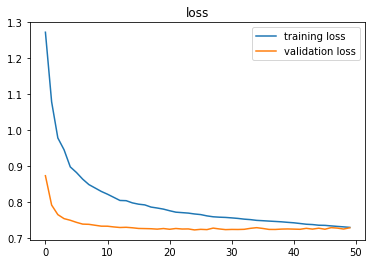

Plotting metrics...


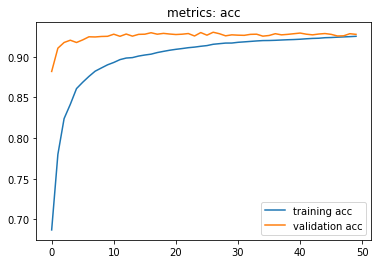

train {'acc': 0.93601817}
test {'acc': 0.925}

Training student with temperature = 32 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12557085264005789981
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 12792235751861352104
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2747293 , acc = 0.2 
Epoch 1 , step 100 , loss= 1.4067737 , acc = 0.63 
Epoch 1 , step 200 , loss= 0.8257644 , acc = 0.79 
Epoch 1 , step 300 , loss= 0.5969441 , acc = 0.86 
Epoch 1 , step 400 , loss= 0.5141921 , acc = 0.87 
Epoch 1 , step 500 , loss= 0.5631888 , acc = 0.84 
Epoch 1 , step 549 , loss= 0.31070185 val_loss= 0.41647482 , acc = 0.91 val acc = 0.8858 
Epoch 1 finished, loss= 0.92747056 
Epoch 2 , step 50 , loss= 0.3842614 , acc = 0.88 
Epoch 2 , step 150

Epoch 19 , step 549 , loss= 0.23976366 val_loss= 0.2692869 , acc = 0.94 val acc = 0.9258 
Epoch 19 finished, loss= 0.31640252 
Epoch 20 , step 50 , loss= 0.19978185 , acc = 0.95 
Epoch 20 , step 150 , loss= 0.26707852 , acc = 0.92 
Epoch 20 , step 250 , loss= 0.42724836 , acc = 0.93 
Epoch 20 , step 350 , loss= 0.29492548 , acc = 0.93 
Epoch 20 , step 450 , loss= 0.26926303 , acc = 0.92 
Epoch 20 , step 549 , loss= 0.2640612 val_loss= 0.26613417 , acc = 0.93 val acc = 0.9258 
Epoch 20 finished, loss= 0.31504828 
Epoch 21 , step 0 , loss= 0.20855732 , acc = 0.93 
Epoch 21 , step 100 , loss= 0.25754482 , acc = 0.93 
Epoch 21 , step 200 , loss= 0.25926676 , acc = 0.93 
Epoch 21 , step 300 , loss= 0.16125292 , acc = 0.95 
Epoch 21 , step 400 , loss= 0.13153462 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.23987983 , acc = 0.93 
Epoch 21 , step 549 , loss= 0.22976264 val_loss= 0.26795346 , acc = 0.93 val acc = 0.9246 
Epoch 21 finished, loss= 0.3098108 
Epoch 22 , step 50 , loss= 0.27434218 ,

Epoch 39 , step 400 , loss= 0.1497348 , acc = 0.96 
Epoch 39 , step 500 , loss= 0.13447294 , acc = 0.95 
Epoch 39 , step 549 , loss= 0.19387 val_loss= 0.25325716 , acc = 0.94 val acc = 0.929 
Epoch 39 finished, loss= 0.27374104 
Epoch 40 , step 50 , loss= 0.15720768 , acc = 0.93 
Epoch 40 , step 150 , loss= 0.25312114 , acc = 0.93 
Epoch 40 , step 250 , loss= 0.3960086 , acc = 0.89 
Epoch 40 , step 350 , loss= 0.3141984 , acc = 0.94 
Epoch 40 , step 450 , loss= 0.14591713 , acc = 0.94 
Epoch 40 , step 549 , loss= 0.15073954 val_loss= 0.25023714 , acc = 0.95 val acc = 0.9306 
Epoch 40 finished, loss= 0.27287468 
Epoch 41 , step 0 , loss= 0.18565395 , acc = 0.94 
Epoch 41 , step 100 , loss= 0.17791788 , acc = 0.95 
Epoch 41 , step 200 , loss= 0.22428988 , acc = 0.92 
Epoch 41 , step 300 , loss= 0.54110837 , acc = 0.88 
Epoch 41 , step 400 , loss= 0.24378075 , acc = 0.93 
Epoch 41 , step 500 , loss= 0.2400022 , acc = 0.93 
Epoch 41 , step 549 , loss= 0.21112385 val_loss= 0.25706413 , acc 

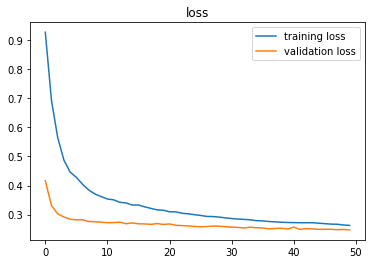

Plotting metrics...


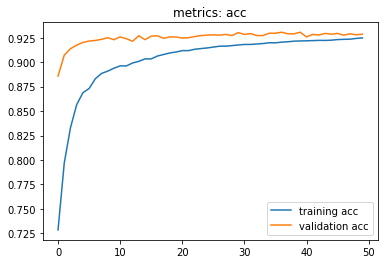

train {'acc': 0.93978184}
test {'acc': 0.9269}

Training student with temperature = 64 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17230581085818405131
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 17428246643050706337
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.302482 , acc = 0.14 
Epoch 1 , step 100 , loss= 2.2895947 , acc = 0.28 
Epoch 1 , step 200 , loss= 2.254157 , acc = 0.39 
Epoch 1 , step 300 , loss= 2.2550087 , acc = 0.33 
Epoch 1 , step 400 , loss= 2.2295158 , acc = 0.4 
Epoch 1 , step 500 , loss= 2.2130876 , acc = 0.41 
Epoch 1 , step 549 , loss= 2.205246 val_loss= 2.2074676 , acc = 0.47 val acc = 0.4784 
Epoch 1 finished, loss= 2.2498703 
Epoch 2 , step 50 , loss= 2.2079754 , acc = 0.54 
Epoch 2 , step 150 , lo

Epoch 20 , step 150 , loss= 2.132902 , acc = 0.84 
Epoch 20 , step 250 , loss= 2.154008 , acc = 0.86 
Epoch 20 , step 350 , loss= 2.144429 , acc = 0.85 
Epoch 20 , step 450 , loss= 2.1631956 , acc = 0.89 
Epoch 20 , step 549 , loss= 2.1614814 val_loss= 2.147737 , acc = 0.87 val acc = 0.8572 
Epoch 20 finished, loss= 2.1701078 
Epoch 21 , step 0 , loss= 2.1594071 , acc = 0.81 
Epoch 21 , step 100 , loss= 2.151989 , acc = 0.78 
Epoch 21 , step 200 , loss= 2.1473527 , acc = 0.88 
Epoch 21 , step 300 , loss= 2.152229 , acc = 0.89 
Epoch 21 , step 400 , loss= 2.1563184 , acc = 0.9 
Epoch 21 , step 500 , loss= 2.1718323 , acc = 0.82 
Epoch 21 , step 549 , loss= 2.1737013 val_loss= 2.1474602 , acc = 0.78 val acc = 0.8542 
Epoch 21 finished, loss= 2.169539 
Epoch 22 , step 50 , loss= 2.128142 , acc = 0.88 
Epoch 22 , step 150 , loss= 2.1365457 , acc = 0.84 
Epoch 22 , step 250 , loss= 2.1488123 , acc = 0.85 
Epoch 22 , step 350 , loss= 2.168248 , acc = 0.84 
Epoch 22 , step 450 , loss= 2.14536

Epoch 40 , step 350 , loss= 2.1365001 , acc = 0.92 
Epoch 40 , step 450 , loss= 2.141924 , acc = 0.78 
Epoch 40 , step 549 , loss= 2.1425128 val_loss= 2.145526 , acc = 0.82 val acc = 0.8704 
Epoch 40 finished, loss= 2.162946 
Epoch 41 , step 0 , loss= 2.1227593 , acc = 0.88 
Epoch 41 , step 100 , loss= 2.1435018 , acc = 0.88 
Epoch 41 , step 200 , loss= 2.1812937 , acc = 0.9 
Epoch 41 , step 300 , loss= 2.1647801 , acc = 0.8 
Epoch 41 , step 400 , loss= 2.1498194 , acc = 0.82 
Epoch 41 , step 500 , loss= 2.1498082 , acc = 0.85 
Epoch 41 , step 549 , loss= 2.17577 val_loss= 2.1454034 , acc = 0.91 val acc = 0.8692 
Epoch 41 finished, loss= 2.1627479 
Epoch 42 , step 50 , loss= 2.1377182 , acc = 0.88 
Epoch 42 , step 150 , loss= 2.189625 , acc = 0.82 
Epoch 42 , step 250 , loss= 2.17473 , acc = 0.83 
Epoch 42 , step 350 , loss= 2.1679122 , acc = 0.91 
Epoch 42 , step 450 , loss= 2.1328096 , acc = 0.89 
Epoch 42 , step 549 , loss= 2.142873 val_loss= 2.1454506 , acc = 0.87 val acc = 0.8698 

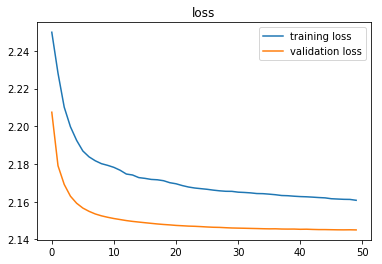

Plotting metrics...


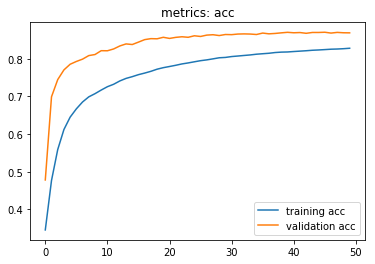

train {'acc': 0.8652909}
test {'acc': 0.8676}

Training student with temperature = 64 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14284159526706603210
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 2787436976698501577
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2946358 , acc = 0.12 
Epoch 1 , step 100 , loss= 2.0679948 , acc = 0.69 
Epoch 1 , step 200 , loss= 1.9563833 , acc = 0.74 
Epoch 1 , step 300 , loss= 1.8394328 , acc = 0.87 
Epoch 1 , step 400 , loss= 1.8306552 , acc = 0.87 
Epoch 1 , step 500 , loss= 1.8456641 , acc = 0.85 
Epoch 1 , step 549 , loss= 1.7927895 val_loss= 1.8123535 , acc = 0.87 val acc = 0.887 
Epoch 1 finished, loss= 1.9467937 
Epoch 2 , step 50 , loss= 1.8201752 , acc = 0.86 
Epoch 2 , step 150 ,

Epoch 20 , step 50 , loss= 1.7469429 , acc = 0.95 
Epoch 20 , step 150 , loss= 1.7865685 , acc = 0.89 
Epoch 20 , step 250 , loss= 1.7328017 , acc = 0.95 
Epoch 20 , step 350 , loss= 1.7401316 , acc = 0.95 
Epoch 20 , step 450 , loss= 1.7417033 , acc = 0.95 
Epoch 20 , step 549 , loss= 1.8016846 val_loss= 1.7616566 , acc = 0.88 val acc = 0.9244 
Epoch 20 finished, loss= 1.7760812 
Epoch 21 , step 0 , loss= 1.7317897 , acc = 0.92 
Epoch 21 , step 100 , loss= 1.7477794 , acc = 0.95 
Epoch 21 , step 200 , loss= 1.8122488 , acc = 0.91 
Epoch 21 , step 300 , loss= 1.8750746 , acc = 0.89 
Epoch 21 , step 400 , loss= 1.740492 , acc = 0.93 
Epoch 21 , step 500 , loss= 1.7485868 , acc = 0.94 
Epoch 21 , step 549 , loss= 1.7310011 val_loss= 1.7618331 , acc = 0.96 val acc = 0.9238 
Epoch 21 finished, loss= 1.7757484 
Epoch 22 , step 50 , loss= 1.7584914 , acc = 0.92 
Epoch 22 , step 150 , loss= 1.7810735 , acc = 0.91 
Epoch 22 , step 250 , loss= 1.7259734 , acc = 0.95 
Epoch 22 , step 350 , loss=

Epoch 40 , step 150 , loss= 1.7757494 , acc = 0.92 
Epoch 40 , step 250 , loss= 1.7243974 , acc = 0.93 
Epoch 40 , step 350 , loss= 1.7718718 , acc = 0.9 
Epoch 40 , step 450 , loss= 1.7793745 , acc = 0.92 
Epoch 40 , step 549 , loss= 1.7314917 val_loss= 1.7618995 , acc = 0.95 val acc = 0.9254 
Epoch 40 finished, loss= 1.7644663 
Epoch 41 , step 0 , loss= 1.7169297 , acc = 0.94 
Epoch 41 , step 100 , loss= 1.7567166 , acc = 0.9 
Epoch 41 , step 200 , loss= 1.7217711 , acc = 0.95 
Epoch 41 , step 300 , loss= 1.7213241 , acc = 0.94 
Epoch 41 , step 400 , loss= 1.7429417 , acc = 0.92 
Epoch 41 , step 500 , loss= 1.738561 , acc = 0.93 
Epoch 41 , step 549 , loss= 1.75637 val_loss= 1.7632298 , acc = 0.93 val acc = 0.9238 
Epoch 41 finished, loss= 1.7637298 
Epoch 42 , step 50 , loss= 1.7339524 , acc = 0.93 
Epoch 42 , step 150 , loss= 1.7065855 , acc = 0.97 
Epoch 42 , step 250 , loss= 1.7560408 , acc = 0.92 
Epoch 42 , step 350 , loss= 1.7315724 , acc = 0.95 
Epoch 42 , step 450 , loss= 1.

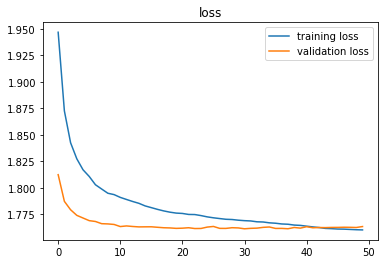

Plotting metrics...


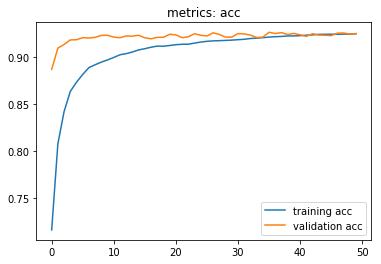

train {'acc': 0.93436366}
test {'acc': 0.9245}

Training student with temperature = 64 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17563792584931311681
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 6137934262206663393
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2909546 , acc = 0.16 
Epoch 1 , step 100 , loss= 1.8310907 , acc = 0.71 
Epoch 1 , step 200 , loss= 1.5173745 , acc = 0.82 
Epoch 1 , step 300 , loss= 1.4689933 , acc = 0.79 
Epoch 1 , step 400 , loss= 1.4354742 , acc = 0.82 
Epoch 1 , step 500 , loss= 1.3584943 , acc = 0.88 
Epoch 1 , step 549 , loss= 1.3204317 val_loss= 1.347557 , acc = 0.93 val acc = 0.8874 
Epoch 1 finished, loss= 1.6032591 
Epoch 2 , step 50 , loss= 1.2930042 , acc = 0.93 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 1.2752209 , acc = 0.93 
Epoch 20 , step 150 , loss= 1.1855524 , acc = 0.95 
Epoch 20 , step 250 , loss= 1.3248663 , acc = 0.89 
Epoch 20 , step 350 , loss= 1.2356391 , acc = 0.94 
Epoch 20 , step 450 , loss= 1.2662685 , acc = 0.92 
Epoch 20 , step 549 , loss= 1.2393657 val_loss= 1.2576219 , acc = 0.94 val acc = 0.9328 
Epoch 20 finished, loss= 1.289288 
Epoch 21 , step 0 , loss= 1.2179817 , acc = 0.98 
Epoch 21 , step 100 , loss= 1.2031188 , acc = 0.94 
Epoch 21 , step 200 , loss= 1.2390653 , acc = 0.93 
Epoch 21 , step 300 , loss= 1.1964761 , acc = 0.97 
Epoch 21 , step 400 , loss= 1.2077885 , acc = 0.95 
Epoch 21 , step 500 , loss= 1.1801538 , acc = 0.97 
Epoch 21 , step 549 , loss= 1.261797 val_loss= 1.2575259 , acc = 0.92 val acc = 0.9322 
Epoch 21 finished, loss= 1.2855024 
Epoch 22 , step 50 , loss= 1.2738011 , acc = 0.9 
Epoch 22 , step 150 , loss= 1.3074834 , acc = 0.86 
Epoch 22 , step 250 , loss= 1.2487626 , acc = 0.95 
Epoch 22 , step 350 , loss= 1

Epoch 40 , step 150 , loss= 1.2782781 , acc = 0.94 
Epoch 40 , step 250 , loss= 1.2319175 , acc = 0.94 
Epoch 40 , step 350 , loss= 1.2356439 , acc = 0.94 
Epoch 40 , step 450 , loss= 1.2345772 , acc = 0.97 
Epoch 40 , step 549 , loss= 1.159928 val_loss= 1.2571216 , acc = 0.99 val acc = 0.9302 
Epoch 40 finished, loss= 1.2653581 
Epoch 41 , step 0 , loss= 1.219645 , acc = 0.94 
Epoch 41 , step 100 , loss= 1.2418145 , acc = 0.9 
Epoch 41 , step 200 , loss= 1.2274067 , acc = 0.94 
Epoch 41 , step 300 , loss= 1.1893603 , acc = 0.98 
Epoch 41 , step 400 , loss= 1.2278335 , acc = 0.95 
Epoch 41 , step 500 , loss= 1.1848758 , acc = 0.96 
Epoch 41 , step 549 , loss= 1.2231809 val_loss= 1.2587746 , acc = 0.94 val acc = 0.9282 
Epoch 41 finished, loss= 1.264072 
Epoch 42 , step 50 , loss= 1.2514081 , acc = 0.95 
Epoch 42 , step 150 , loss= 1.2823699 , acc = 0.88 
Epoch 42 , step 250 , loss= 1.2969477 , acc = 0.88 
Epoch 42 , step 350 , loss= 1.2217602 , acc = 0.93 
Epoch 42 , step 450 , loss= 1

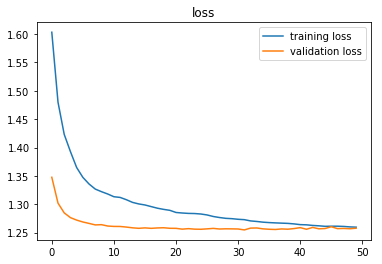

Plotting metrics...


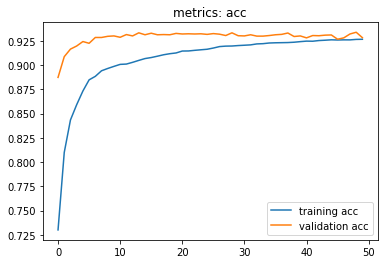

train {'acc': 0.94156367}
test {'acc': 0.9279}

Training student with temperature = 64 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10510433838931662289
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 3717748989501798135
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.316728 , acc = 0.04 
Epoch 1 , step 100 , loss= 1.8275702 , acc = 0.45 
Epoch 1 , step 200 , loss= 1.323476 , acc = 0.7 
Epoch 1 , step 300 , loss= 1.1030605 , acc = 0.78 
Epoch 1 , step 400 , loss= 0.9377216 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.9399306 , acc = 0.85 
Epoch 1 , step 549 , loss= 1.0333804 val_loss= 0.9095056 , acc = 0.88 val acc = 0.8778 
Epoch 1 finished, loss= 1.3545525 
Epoch 2 , step 50 , loss= 1.0445422 , acc = 0.84 
Epoch 2 , step 150 , 

Epoch 20 , step 150 , loss= 0.69760966 , acc = 0.94 
Epoch 20 , step 250 , loss= 0.64489317 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.75411 , acc = 0.93 
Epoch 20 , step 450 , loss= 0.7538825 , acc = 0.93 
Epoch 20 , step 549 , loss= 0.6857556 val_loss= 0.7478401 , acc = 0.96 val acc = 0.9314 
Epoch 20 finished, loss= 0.80207354 
Epoch 21 , step 0 , loss= 0.6654142 , acc = 0.95 
Epoch 21 , step 100 , loss= 0.71400404 , acc = 0.94 
Epoch 21 , step 200 , loss= 0.70118845 , acc = 0.94 
Epoch 21 , step 300 , loss= 0.72126883 , acc = 0.94 
Epoch 21 , step 400 , loss= 0.7836875 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.67812884 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.66420245 val_loss= 0.7478496 , acc = 0.96 val acc = 0.9328 
Epoch 21 finished, loss= 0.79706174 
Epoch 22 , step 50 , loss= 0.7277107 , acc = 0.92 
Epoch 22 , step 150 , loss= 0.7559012 , acc = 0.95 
Epoch 22 , step 250 , loss= 0.6765583 , acc = 0.96 
Epoch 22 , step 350 , loss= 0.72265625 , acc = 0.91 
Epoch 22 , step 4

Epoch 40 , step 50 , loss= 0.73737836 , acc = 0.94 
Epoch 40 , step 150 , loss= 0.65876925 , acc = 0.97 
Epoch 40 , step 250 , loss= 0.75358844 , acc = 0.9 
Epoch 40 , step 350 , loss= 0.6630003 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.70423186 , acc = 0.94 
Epoch 40 , step 549 , loss= 0.683309 val_loss= 0.7496425 , acc = 0.96 val acc = 0.9304 
Epoch 40 finished, loss= 0.7686871 
Epoch 41 , step 0 , loss= 0.7252663 , acc = 0.96 
Epoch 41 , step 100 , loss= 0.69548583 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.7554288 , acc = 0.93 
Epoch 41 , step 300 , loss= 0.6796783 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.7783533 , acc = 0.93 
Epoch 41 , step 500 , loss= 0.7127953 , acc = 0.95 
Epoch 41 , step 549 , loss= 0.74845487 val_loss= 0.74725133 , acc = 0.91 val acc = 0.934 
Epoch 41 finished, loss= 0.7676185 
Epoch 42 , step 50 , loss= 0.6950607 , acc = 0.92 
Epoch 42 , step 150 , loss= 0.6418246 , acc = 0.96 
Epoch 42 , step 250 , loss= 0.6612191 , acc = 0.97 
Epoch 42 , step 350 , 

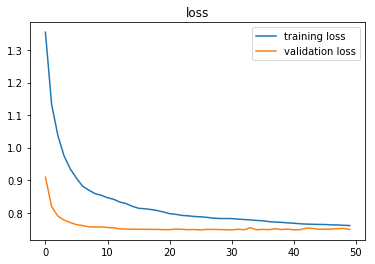

Plotting metrics...


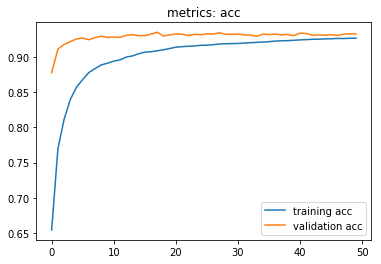

train {'acc': 0.93872726}
test {'acc': 0.9258}

Training student with temperature = 64 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15853910113255628858
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 10543824720510254505
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3178484 , acc = 0.05 
Epoch 1 , step 100 , loss= 1.400424 , acc = 0.56 
Epoch 1 , step 200 , loss= 0.8431183 , acc = 0.81 
Epoch 1 , step 300 , loss= 0.6696247 , acc = 0.79 
Epoch 1 , step 400 , loss= 0.6488296 , acc = 0.81 
Epoch 1 , step 500 , loss= 0.4505508 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.42318135 val_loss= 0.42998716 , acc = 0.89 val acc = 0.8836 
Epoch 1 finished, loss= 0.9647967 
Epoch 2 , step 50 , loss= 0.5977517 , acc = 0.82 
Epoch 2 , step 150

Epoch 19 , step 549 , loss= 0.13572994 val_loss= 0.25824067 , acc = 0.97 val acc = 0.9272 
Epoch 19 finished, loss= 0.3301689 
Epoch 20 , step 50 , loss= 0.25242603 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.19765948 , acc = 0.95 
Epoch 20 , step 250 , loss= 0.139572 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.19324924 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.1545909 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.19166477 val_loss= 0.25864923 , acc = 0.94 val acc = 0.9228 
Epoch 20 finished, loss= 0.3236162 
Epoch 21 , step 0 , loss= 0.2840879 , acc = 0.92 
Epoch 21 , step 100 , loss= 0.18012117 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.17901284 , acc = 0.95 
Epoch 21 , step 300 , loss= 0.38928702 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.27610707 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.17528343 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.24455138 val_loss= 0.25750944 , acc = 0.94 val acc = 0.9276 
Epoch 21 finished, loss= 0.31969747 
Epoch 22 , step 50 , loss= 0.14302331 , ac

Epoch 39 , step 500 , loss= 0.24584205 , acc = 0.94 
Epoch 39 , step 549 , loss= 0.23942342 val_loss= 0.25774112 , acc = 0.93 val acc = 0.927 
Epoch 39 finished, loss= 0.28587645 
Epoch 40 , step 50 , loss= 0.47303364 , acc = 0.91 
Epoch 40 , step 150 , loss= 0.30262354 , acc = 0.9 
Epoch 40 , step 250 , loss= 0.22955906 , acc = 0.94 
Epoch 40 , step 350 , loss= 0.22800632 , acc = 0.93 
Epoch 40 , step 450 , loss= 0.23150204 , acc = 0.95 
Epoch 40 , step 549 , loss= 0.20758325 val_loss= 0.25656655 , acc = 0.95 val acc = 0.9288 
Epoch 40 finished, loss= 0.28571126 
Epoch 41 , step 0 , loss= 0.15172459 , acc = 0.93 
Epoch 41 , step 100 , loss= 0.20249891 , acc = 0.94 
Epoch 41 , step 200 , loss= 0.15776747 , acc = 0.94 
Epoch 41 , step 300 , loss= 0.17743188 , acc = 0.95 
Epoch 41 , step 400 , loss= 0.18726525 , acc = 0.91 
Epoch 41 , step 500 , loss= 0.29433173 , acc = 0.93 
Epoch 41 , step 549 , loss= 0.21403632 val_loss= 0.25440836 , acc = 0.93 val acc = 0.9286 
Epoch 41 finished, los

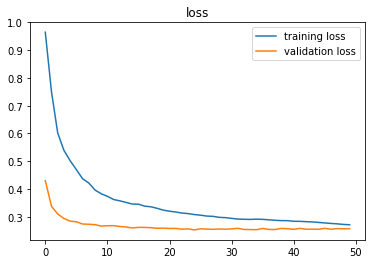

Plotting metrics...


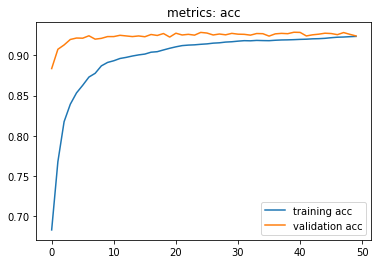

train {'acc': 0.9387818}
test {'acc': 0.9291}

{2: [{'acc': 0.9308}, {'acc': 0.9314}, {'acc': 0.9276}, {'acc': 0.9326}, {'acc': 0.9251}], 4: [{'acc': 0.9296}, {'acc': 0.9311}, {'acc': 0.924}, {'acc': 0.9249}, {'acc': 0.9259}], 8: [{'acc': 0.9242}, {'acc': 0.9218}, {'acc': 0.9205}, {'acc': 0.9262}, {'acc': 0.9315}], 16: [{'acc': 0.9053}, {'acc': 0.9206}, {'acc': 0.9202}, {'acc': 0.9298}, {'acc': 0.93}], 32: [{'acc': 0.8879}, {'acc': 0.9286}, {'acc': 0.9293}, {'acc': 0.925}, {'acc': 0.9269}], 64: [{'acc': 0.8676}, {'acc': 0.9245}, {'acc': 0.9279}, {'acc': 0.9258}, {'acc': 0.9291}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            2                   1    0.9308   
1            0.25           0.75            2                   1    0.9314   
2            0.50           0.50            2                   1    0.9276   
3            0.75           0.25            2                   1    0.9326   
4            1.00 

In [15]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])
list_exp = []

temperatures = [2,4,8,16,32,64]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = 1 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=50
            ,display_steps=100)
        # show result
        print('Student performance with temperature =',temperature,
             ', coef_softloss =',coef_softloss,',tmp_effi =', tmp_effect,'. ')
        student.plt_loss()
        student.plt_metrics()
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        print('train',train_metric)
        print('test',test_metric)
        print()
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        list_exp.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp = pd.DataFrame(list_exp)
print(test_metrics)
print(df_exp)

In [16]:
print(test_metrics)
print(df_exp)
print(df_exp['test_acc'].mean())

{2: [{'acc': 0.9308}, {'acc': 0.9314}, {'acc': 0.9276}, {'acc': 0.9326}, {'acc': 0.9251}], 4: [{'acc': 0.9296}, {'acc': 0.9311}, {'acc': 0.924}, {'acc': 0.9249}, {'acc': 0.9259}], 8: [{'acc': 0.9242}, {'acc': 0.9218}, {'acc': 0.9205}, {'acc': 0.9262}, {'acc': 0.9315}], 16: [{'acc': 0.9053}, {'acc': 0.9206}, {'acc': 0.9202}, {'acc': 0.9298}, {'acc': 0.93}], 32: [{'acc': 0.8879}, {'acc': 0.9286}, {'acc': 0.9293}, {'acc': 0.925}, {'acc': 0.9269}], 64: [{'acc': 0.8676}, {'acc': 0.9245}, {'acc': 0.9279}, {'acc': 0.9258}, {'acc': 0.9291}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            2                   1    0.9308   
1            0.25           0.75            2                   1    0.9314   
2            0.50           0.50            2                   1    0.9276   
3            0.75           0.25            2                   1    0.9326   
4            1.00           0.00            2                   1

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2408745189286155818
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 10491455566915820503
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 9.18807 , acc = 0.09 
Epoch 1 , step 100 , loss= 6.95685 , acc = 0.49 
Epoch 1 , step 200 , loss= 4.6458597 , acc = 0.72 
Epoch 1 , step 300 , loss= 3.393464 , acc = 0.7 
Epoch 1 , step 400 , loss= 1.985947 , acc = 0.88 
Epoch 1 , step 500 , loss= 1.9975513 , acc = 0.88 
Epoch 1 , step 549 , loss= 1.6364818 val_loss= 1.8825594 , acc = 0.9 val acc = 0.8752 
Epoch 1 finished, loss= 4.257746 
Epoch 2 , step 50 , loss= 1.5478896 , acc = 0.92 
Epoch 2 , step 150 , loss= 2.6669474 , acc = 0.84 
Epoch 2 , step 250 , loss= 

Epoch 20 , step 150 , loss= 0.64594674 , acc = 0.97 
Epoch 20 , step 250 , loss= 1.0705711 , acc = 0.93 
Epoch 20 , step 350 , loss= 0.75285095 , acc = 0.93 
Epoch 20 , step 450 , loss= 0.92290664 , acc = 0.93 
Epoch 20 , step 549 , loss= 0.6030016 val_loss= 0.8925126 , acc = 0.96 val acc = 0.9324 
Epoch 20 finished, loss= 1.3028896 
Epoch 21 , step 0 , loss= 0.9905178 , acc = 0.95 
Epoch 21 , step 100 , loss= 1.261985 , acc = 0.89 
Epoch 21 , step 200 , loss= 0.785313 , acc = 0.95 
Epoch 21 , step 300 , loss= 1.2962484 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.75757164 , acc = 0.93 
Epoch 21 , step 500 , loss= 1.1915658 , acc = 0.89 
Epoch 21 , step 549 , loss= 1.1017582 val_loss= 0.8911912 , acc = 0.93 val acc = 0.9324 
Epoch 21 finished, loss= 1.2902234 
Epoch 22 , step 50 , loss= 0.7834348 , acc = 0.92 
Epoch 22 , step 150 , loss= 0.86435425 , acc = 0.94 
Epoch 22 , step 250 , loss= 0.6230429 , acc = 0.97 
Epoch 22 , step 350 , loss= 0.9915262 , acc = 0.92 
Epoch 22 , step 450 , 

Epoch 40 , step 150 , loss= 1.1855127 , acc = 0.92 
Epoch 40 , step 250 , loss= 1.1152724 , acc = 0.92 
Epoch 40 , step 350 , loss= 0.9895689 , acc = 0.94 
Epoch 40 , step 450 , loss= 0.6663402 , acc = 0.93 
Epoch 40 , step 549 , loss= 0.9045532 val_loss= 0.86964726 , acc = 0.93 val acc = 0.9364 
Epoch 40 finished, loss= 1.098145 
Epoch 41 , step 0 , loss= 0.7323655 , acc = 0.95 
Epoch 41 , step 100 , loss= 0.70391625 , acc = 0.95 
Epoch 41 , step 200 , loss= 0.62372434 , acc = 0.94 
Epoch 41 , step 300 , loss= 0.72764826 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.716267 , acc = 0.94 
Epoch 41 , step 500 , loss= 1.0180646 , acc = 0.93 
Epoch 41 , step 549 , loss= 0.48557544 val_loss= 0.87301123 , acc = 0.95 val acc = 0.935 
Epoch 41 finished, loss= 1.0881096 
Epoch 42 , step 50 , loss= 0.46230567 , acc = 0.97 
Epoch 42 , step 150 , loss= 0.96148515 , acc = 0.94 
Epoch 42 , step 250 , loss= 0.8970463 , acc = 0.93 
Epoch 42 , step 350 , loss= 0.5597625 , acc = 0.96 
Epoch 42 , step 450 

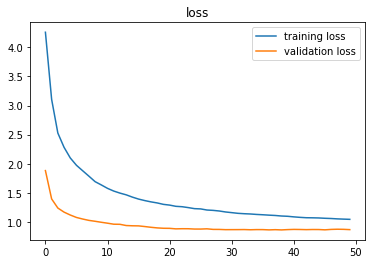

Plotting metrics...


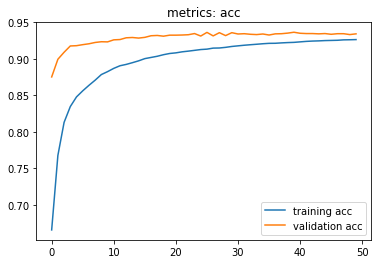

train {'acc': 0.9424545}
test {'acc': 0.9347}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13839615976111442856
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 7950878238710061938
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 7.497296 , acc = 0.08 
Epoch 1 , step 100 , loss= 5.5352273 , acc = 0.67 
Epoch 1 , step 200 , loss= 3.8326433 , acc = 0.71 
Epoch 1 , step 300 , loss= 2.391107 , acc = 0.79 
Epoch 1 , step 400 , loss= 1.7568343 , acc = 0.87 
Epoch 1 , step 500 , loss= 2.1732614 , acc = 0.82 
Epoch 1 , step 549 , loss= 1.8745522 val_loss= 1.5421367 , acc = 0.87 val acc = 0.873 
Epoch 1 finished, loss= 3.5801315 
Epoch 2 , step 50 , loss= 1.2994202 , acc = 0.94 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 0.6334966 , acc = 0.95 
Epoch 20 , step 150 , loss= 0.3815343 , acc = 0.96 
Epoch 20 , step 250 , loss= 0.7630936 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.8142363 , acc = 0.92 
Epoch 20 , step 450 , loss= 0.8043158 , acc = 0.92 
Epoch 20 , step 549 , loss= 1.2234232 val_loss= 0.79953575 , acc = 0.88 val acc = 0.9286 
Epoch 20 finished, loss= 1.0872012 
Epoch 21 , step 0 , loss= 0.68762875 , acc = 0.94 
Epoch 21 , step 100 , loss= 0.968776 , acc = 0.9 
Epoch 21 , step 200 , loss= 1.6755916 , acc = 0.9 
Epoch 21 , step 300 , loss= 0.6940255 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.6612792 , acc = 0.92 
Epoch 21 , step 500 , loss= 0.9266219 , acc = 0.94 
Epoch 21 , step 549 , loss= 0.84527695 val_loss= 0.8051002 , acc = 0.94 val acc = 0.9274 
Epoch 21 finished, loss= 1.0787983 
Epoch 22 , step 50 , loss= 0.67868626 , acc = 0.92 
Epoch 22 , step 150 , loss= 1.20593 , acc = 0.9 
Epoch 22 , step 250 , loss= 0.45496634 , acc = 0.97 
Epoch 22 , step 350 , loss=

Epoch 40 , step 50 , loss= 1.1195782 , acc = 0.87 
Epoch 40 , step 150 , loss= 0.76940125 , acc = 0.94 
Epoch 40 , step 250 , loss= 0.5263249 , acc = 0.95 
Epoch 40 , step 350 , loss= 0.5347817 , acc = 0.97 
Epoch 40 , step 450 , loss= 1.4649626 , acc = 0.89 
Epoch 40 , step 549 , loss= 0.90398896 val_loss= 0.7902434 , acc = 0.95 val acc = 0.9318 
Epoch 40 finished, loss= 0.9498988 
Epoch 41 , step 0 , loss= 0.7045681 , acc = 0.91 
Epoch 41 , step 100 , loss= 0.6803368 , acc = 0.93 
Epoch 41 , step 200 , loss= 0.9574255 , acc = 0.92 
Epoch 41 , step 300 , loss= 0.95706147 , acc = 0.92 
Epoch 41 , step 400 , loss= 1.070686 , acc = 0.91 
Epoch 41 , step 500 , loss= 0.6509604 , acc = 0.93 
Epoch 41 , step 549 , loss= 0.6756216 val_loss= 0.7853664 , acc = 0.93 val acc = 0.9308 
Epoch 41 finished, loss= 0.94633085 
Epoch 42 , step 50 , loss= 0.60932904 , acc = 0.95 
Epoch 42 , step 150 , loss= 1.2228522 , acc = 0.92 
Epoch 42 , step 250 , loss= 0.8792206 , acc = 0.93 
Epoch 42 , step 350 , 

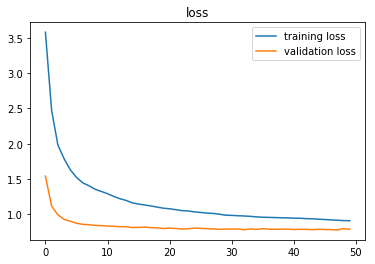

Plotting metrics...


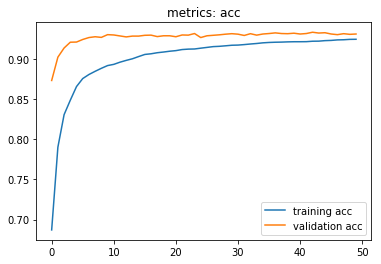

train {'acc': 0.93783635}
test {'acc': 0.9303}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7184769238353773380
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 1623438351316063570
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.730444 , acc = 0.22 
Epoch 1 , step 100 , loss= 3.9878902 , acc = 0.69 
Epoch 1 , step 200 , loss= 2.2398515 , acc = 0.79 
Epoch 1 , step 300 , loss= 2.2212882 , acc = 0.79 
Epoch 1 , step 400 , loss= 1.3891264 , acc = 0.87 
Epoch 1 , step 500 , loss= 1.1796963 , acc = 0.87 
Epoch 1 , step 549 , loss= 1.7109464 val_loss= 1.2485926 , acc = 0.76 val acc = 0.8686 
Epoch 1 finished, loss= 2.637035 
Epoch 2 , step 50 , loss= 1.4694936 , acc = 0.81 
Epoch 2 , step 150 , los

Epoch 20 , step 50 , loss= 1.0764079 , acc = 0.88 
Epoch 20 , step 150 , loss= 0.65038604 , acc = 0.92 
Epoch 20 , step 250 , loss= 0.72830486 , acc = 0.9 
Epoch 20 , step 350 , loss= 0.6307913 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.53680503 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.39588296 val_loss= 0.639742 , acc = 0.96 val acc = 0.9298 
Epoch 20 finished, loss= 0.8402877 
Epoch 21 , step 0 , loss= 0.8007438 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.74190164 , acc = 0.9 
Epoch 21 , step 200 , loss= 0.86718595 , acc = 0.88 
Epoch 21 , step 300 , loss= 0.3054204 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.87893987 , acc = 0.91 
Epoch 21 , step 500 , loss= 0.55848354 , acc = 0.94 
Epoch 21 , step 549 , loss= 0.44516283 val_loss= 0.6392018 , acc = 0.96 val acc = 0.9308 
Epoch 21 finished, loss= 0.83091414 
Epoch 22 , step 50 , loss= 0.63759565 , acc = 0.93 
Epoch 22 , step 150 , loss= 0.8013937 , acc = 0.96 
Epoch 22 , step 250 , loss= 0.6552452 , acc = 0.93 
Epoch 22 , step 35

Epoch 40 , step 50 , loss= 0.53186893 , acc = 0.95 
Epoch 40 , step 150 , loss= 0.37651837 , acc = 0.95 
Epoch 40 , step 250 , loss= 0.3524689 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.5779927 , acc = 0.93 
Epoch 40 , step 450 , loss= 0.8067159 , acc = 0.91 
Epoch 40 , step 549 , loss= 1.0941764 val_loss= 0.6007337 , acc = 0.88 val acc = 0.9354 
Epoch 40 finished, loss= 0.7175645 
Epoch 41 , step 0 , loss= 0.65080076 , acc = 0.93 
Epoch 41 , step 100 , loss= 0.29365036 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.38311955 , acc = 0.95 
Epoch 41 , step 300 , loss= 1.0054848 , acc = 0.95 
Epoch 41 , step 400 , loss= 0.38674146 , acc = 0.96 
Epoch 41 , step 500 , loss= 0.4327904 , acc = 0.97 
Epoch 41 , step 549 , loss= 0.3332369 val_loss= 0.59721375 , acc = 0.98 val acc = 0.9368 
Epoch 41 finished, loss= 0.7118074 
Epoch 42 , step 50 , loss= 0.42064363 , acc = 0.94 
Epoch 42 , step 150 , loss= 0.62967086 , acc = 0.95 
Epoch 42 , step 250 , loss= 0.42473495 , acc = 0.95 
Epoch 42 , step 

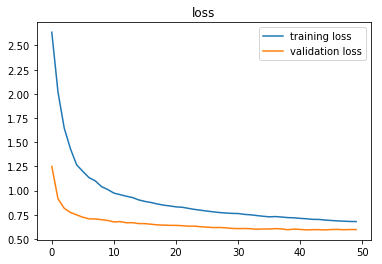

Plotting metrics...


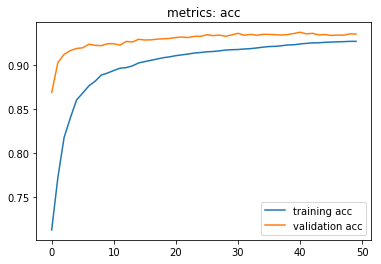

train {'acc': 0.9425455}
test {'acc': 0.9347}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10615446885048080211
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 708192624682032159
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.019406 , acc = 0.11 
Epoch 1 , step 100 , loss= 2.8427377 , acc = 0.65 
Epoch 1 , step 200 , loss= 1.5463275 , acc = 0.79 
Epoch 1 , step 300 , loss= 1.3835804 , acc = 0.77 
Epoch 1 , step 400 , loss= 0.8854473 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.96928966 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.9129931 val_loss= 0.8626175 , acc = 0.87 val acc = 0.8762 
Epoch 1 finished, loss= 1.7942545 
Epoch 2 , step 50 , loss= 0.86369216 , acc = 0.86 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 0.39556506 , acc = 0.95 
Epoch 20 , step 150 , loss= 0.5386177 , acc = 0.94 
Epoch 20 , step 250 , loss= 0.32023036 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.4496074 , acc = 0.94 
Epoch 20 , step 450 , loss= 0.40314066 , acc = 0.92 
Epoch 20 , step 549 , loss= 0.5704495 val_loss= 0.49167627 , acc = 0.94 val acc = 0.9304 
Epoch 20 finished, loss= 0.61722195 
Epoch 21 , step 0 , loss= 0.3640822 , acc = 0.94 
Epoch 21 , step 100 , loss= 0.6391404 , acc = 0.91 
Epoch 21 , step 200 , loss= 0.56183994 , acc = 0.91 
Epoch 21 , step 300 , loss= 0.51874334 , acc = 0.94 
Epoch 21 , step 400 , loss= 0.3567195 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.191034 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.8297131 val_loss= 0.48732555 , acc = 0.89 val acc = 0.9286 
Epoch 21 finished, loss= 0.61094975 
Epoch 22 , step 50 , loss= 0.43618 , acc = 0.92 
Epoch 22 , step 150 , loss= 0.8121816 , acc = 0.88 
Epoch 22 , step 250 , loss= 0.76077735 , acc = 0.9 
Epoch 22 , step 350 

Epoch 40 , step 50 , loss= 0.32616928 , acc = 0.96 
Epoch 40 , step 150 , loss= 0.40004024 , acc = 0.96 
Epoch 40 , step 250 , loss= 0.33268338 , acc = 0.94 
Epoch 40 , step 350 , loss= 0.6453954 , acc = 0.92 
Epoch 40 , step 450 , loss= 0.286202 , acc = 0.95 
Epoch 40 , step 549 , loss= 0.55550224 val_loss= 0.4763287 , acc = 0.91 val acc = 0.926 
Epoch 40 finished, loss= 0.5367433 
Epoch 41 , step 0 , loss= 0.4114285 , acc = 0.91 
Epoch 41 , step 100 , loss= 0.60653895 , acc = 0.92 
Epoch 41 , step 200 , loss= 0.56268346 , acc = 0.95 
Epoch 41 , step 300 , loss= 0.37938556 , acc = 0.94 
Epoch 41 , step 400 , loss= 0.74410355 , acc = 0.9 
Epoch 41 , step 500 , loss= 0.5336413 , acc = 0.92 
Epoch 41 , step 549 , loss= 0.37696272 val_loss= 0.47604242 , acc = 0.95 val acc = 0.926 
Epoch 41 finished, loss= 0.53620976 
Epoch 42 , step 50 , loss= 0.21316743 , acc = 0.96 
Epoch 42 , step 150 , loss= 0.37479228 , acc = 0.95 
Epoch 42 , step 250 , loss= 0.7310403 , acc = 0.92 
Epoch 42 , step 3

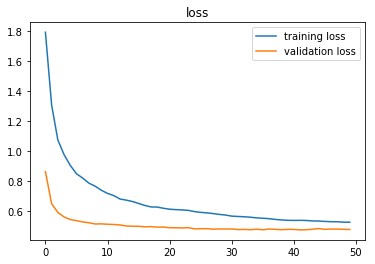

Plotting metrics...


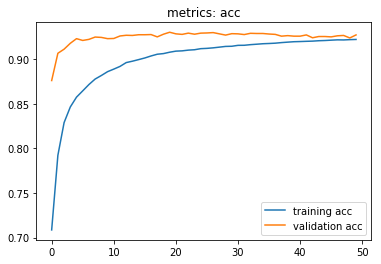

train {'acc': 0.93741816}
test {'acc': 0.9266}

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3871509613142929784
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 14623803250919189295
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3401587 , acc = 0.05 
Epoch 1 , step 100 , loss= 1.5108649 , acc = 0.57 
Epoch 1 , step 200 , loss= 0.6981924 , acc = 0.84 
Epoch 1 , step 300 , loss= 0.74364054 , acc = 0.83 
Epoch 1 , step 400 , loss= 0.36751607 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.435944 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.34229836 val_loss= 0.39611712 , acc = 0.9 val acc = 0.896 
Epoch 1 finished, loss= 0.9198022 
Epoch 2 , step 50 , loss= 0.44948888 , acc = 0.86 
Epoch 2 , step 150 ,

Epoch 19 , step 549 , loss= 0.6001247 val_loss= 0.25191146 , acc = 0.85 val acc = 0.9274 
Epoch 19 finished, loss= 0.31070438 
Epoch 20 , step 50 , loss= 0.33039814 , acc = 0.89 
Epoch 20 , step 150 , loss= 0.38911515 , acc = 0.9 
Epoch 20 , step 250 , loss= 0.30099615 , acc = 0.9 
Epoch 20 , step 350 , loss= 0.34635746 , acc = 0.88 
Epoch 20 , step 450 , loss= 0.34177437 , acc = 0.89 
Epoch 20 , step 549 , loss= 0.31885162 val_loss= 0.25554305 , acc = 0.88 val acc = 0.9276 
Epoch 20 finished, loss= 0.3119603 
Epoch 21 , step 0 , loss= 0.20877948 , acc = 0.95 
Epoch 21 , step 100 , loss= 0.20157652 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.16454165 , acc = 0.95 
Epoch 21 , step 300 , loss= 0.35544407 , acc = 0.92 
Epoch 21 , step 400 , loss= 0.22600351 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.20517488 , acc = 0.92 
Epoch 21 , step 549 , loss= 0.16478068 val_loss= 0.25061026 , acc = 0.94 val acc = 0.9284 
Epoch 21 finished, loss= 0.3071616 
Epoch 22 , step 50 , loss= 0.1724596 , ac

Epoch 39 , step 400 , loss= 0.28219005 , acc = 0.93 
Epoch 39 , step 500 , loss= 0.10666329 , acc = 0.96 
Epoch 39 , step 549 , loss= 0.20629025 val_loss= 0.24355368 , acc = 0.94 val acc = 0.9296 
Epoch 39 finished, loss= 0.27042073 
Epoch 40 , step 50 , loss= 0.25805464 , acc = 0.92 
Epoch 40 , step 150 , loss= 0.2321848 , acc = 0.93 
Epoch 40 , step 250 , loss= 0.19010852 , acc = 0.95 
Epoch 40 , step 350 , loss= 0.10897075 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.12887393 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.1687076 val_loss= 0.24233472 , acc = 0.94 val acc = 0.9302 
Epoch 40 finished, loss= 0.26836064 
Epoch 41 , step 0 , loss= 0.13746798 , acc = 0.96 
Epoch 41 , step 100 , loss= 0.29443228 , acc = 0.91 
Epoch 41 , step 200 , loss= 0.1659705 , acc = 0.96 
Epoch 41 , step 300 , loss= 0.09825914 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.101175405 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.18961282 , acc = 0.93 
Epoch 41 , step 549 , loss= 0.15946321 val_loss= 0.23984228 

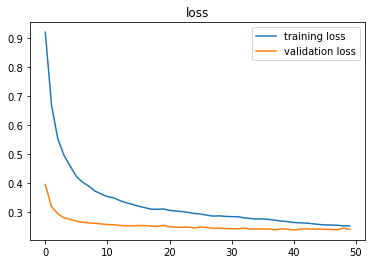

Plotting metrics...


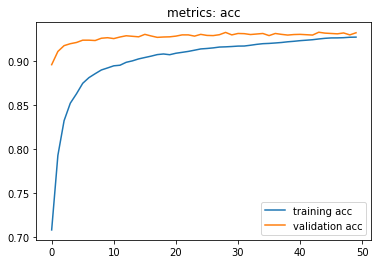

train {'acc': 0.94156367}
test {'acc': 0.9303}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17141556484745560497
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 14487527546200371846
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 36.790115 , acc = 0.05 
Epoch 1 , step 100 , loss= 32.94027 , acc = 0.2 
Epoch 1 , step 200 , loss= 22.193863 , acc = 0.64 
Epoch 1 , step 300 , loss= 14.833944 , acc = 0.83 
Epoch 1 , step 400 , loss= 12.889929 , acc = 0.77 
Epoch 1 , step 500 , loss= 12.050309 , acc = 0.82 
Epoch 1 , step 549 , loss= 9.31507 val_loss= 9.937725 , acc = 0.88 val acc = 0.835 
Epoch 1 finished, loss= 20.144787 
Epoch 2 , step 50 , loss= 10.106197 , acc = 0.82 
Epoch 2 , step 150 , loss

Epoch 20 , step 250 , loss= 5.1749525 , acc = 0.9 
Epoch 20 , step 350 , loss= 4.313782 , acc = 0.95 
Epoch 20 , step 450 , loss= 2.4081361 , acc = 0.95 
Epoch 20 , step 549 , loss= 5.0459447 val_loss= 4.27506 , acc = 0.89 val acc = 0.9266 
Epoch 20 finished, loss= 6.0018077 
Epoch 21 , step 0 , loss= 7.378107 , acc = 0.85 
Epoch 21 , step 100 , loss= 4.0102963 , acc = 0.91 
Epoch 21 , step 200 , loss= 3.1941657 , acc = 0.94 
Epoch 21 , step 300 , loss= 4.9189143 , acc = 0.91 
Epoch 21 , step 400 , loss= 4.817293 , acc = 0.91 
Epoch 21 , step 500 , loss= 3.9498487 , acc = 0.92 
Epoch 21 , step 549 , loss= 5.067259 val_loss= 4.244123 , acc = 0.91 val acc = 0.9252 
Epoch 21 finished, loss= 5.938473 
Epoch 22 , step 50 , loss= 2.8390958 , acc = 0.96 
Epoch 22 , step 150 , loss= 3.9306302 , acc = 0.93 
Epoch 22 , step 250 , loss= 4.3778634 , acc = 0.93 
Epoch 22 , step 350 , loss= 5.703883 , acc = 0.89 
Epoch 22 , step 450 , loss= 4.3244667 , acc = 0.91 
Epoch 22 , step 549 , loss= 5.80773

Epoch 40 , step 549 , loss= 5.1018257 val_loss= 4.019559 , acc = 0.91 val acc = 0.9314 
Epoch 40 finished, loss= 5.0669394 
Epoch 41 , step 0 , loss= 2.4410088 , acc = 0.96 
Epoch 41 , step 100 , loss= 3.3367572 , acc = 0.94 
Epoch 41 , step 200 , loss= 3.5803769 , acc = 0.97 
Epoch 41 , step 300 , loss= 2.9904509 , acc = 0.95 
Epoch 41 , step 400 , loss= 2.0059335 , acc = 0.95 
Epoch 41 , step 500 , loss= 5.3374605 , acc = 0.93 
Epoch 41 , step 549 , loss= 3.069794 val_loss= 4.009428 , acc = 0.95 val acc = 0.9312 
Epoch 41 finished, loss= 5.019348 
Epoch 42 , step 50 , loss= 3.2564905 , acc = 0.94 
Epoch 42 , step 150 , loss= 3.2496493 , acc = 0.91 
Epoch 42 , step 250 , loss= 3.8733943 , acc = 0.94 
Epoch 42 , step 350 , loss= 4.687611 , acc = 0.9 
Epoch 42 , step 450 , loss= 3.052764 , acc = 0.98 
Epoch 42 , step 549 , loss= 5.691073 val_loss= 4.009539 , acc = 0.94 val acc = 0.9302 
Epoch 42 finished, loss= 4.9962525 
Epoch 43 , step 0 , loss= 4.1779118 , acc = 0.93 
Epoch 43 , step

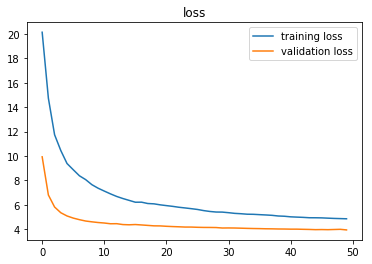

Plotting metrics...


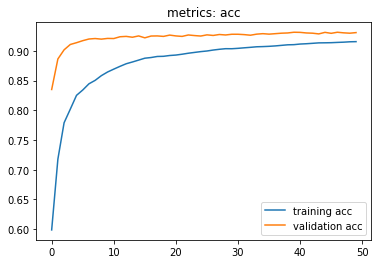

train {'acc': 0.9341818}
test {'acc': 0.9276}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15068878216205845606
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 5527631247053643538
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 28.099735 , acc = 0.11 
Epoch 1 , step 100 , loss= 24.386332 , acc = 0.56 
Epoch 1 , step 200 , loss= 16.746964 , acc = 0.73 
Epoch 1 , step 300 , loss= 11.771516 , acc = 0.78 
Epoch 1 , step 400 , loss= 9.125363 , acc = 0.86 
Epoch 1 , step 500 , loss= 8.979241 , acc = 0.84 
Epoch 1 , step 549 , loss= 6.200982 val_loss= 6.965341 , acc = 0.89 val acc = 0.8618 
Epoch 1 finished, loss= 15.044305 
Epoch 2 , step 50 , loss= 7.074528 , acc = 0.86 
Epoch 2 , step 150 , los

Epoch 20 , step 150 , loss= 4.989934 , acc = 0.94 
Epoch 20 , step 250 , loss= 2.4396436 , acc = 0.95 
Epoch 20 , step 350 , loss= 3.9020638 , acc = 0.92 
Epoch 20 , step 450 , loss= 2.0088847 , acc = 0.98 
Epoch 20 , step 549 , loss= 3.7743917 val_loss= 3.418249 , acc = 0.93 val acc = 0.9252 
Epoch 20 finished, loss= 4.690099 
Epoch 21 , step 0 , loss= 6.643881 , acc = 0.86 
Epoch 21 , step 100 , loss= 3.53434 , acc = 0.92 
Epoch 21 , step 200 , loss= 5.1986017 , acc = 0.87 
Epoch 21 , step 300 , loss= 3.532263 , acc = 0.91 
Epoch 21 , step 400 , loss= 3.6110508 , acc = 0.93 
Epoch 21 , step 500 , loss= 1.914586 , acc = 0.95 
Epoch 21 , step 549 , loss= 2.378856 val_loss= 3.4246032 , acc = 0.95 val acc = 0.9244 
Epoch 21 finished, loss= 4.646178 
Epoch 22 , step 50 , loss= 3.6181514 , acc = 0.91 
Epoch 22 , step 150 , loss= 4.845801 , acc = 0.92 
Epoch 22 , step 250 , loss= 3.7501972 , acc = 0.91 
Epoch 22 , step 350 , loss= 2.7728307 , acc = 0.96 
Epoch 22 , step 450 , loss= 2.714299

Epoch 40 , step 350 , loss= 3.4869766 , acc = 0.92 
Epoch 40 , step 450 , loss= 2.6975708 , acc = 0.95 
Epoch 40 , step 549 , loss= 2.9957035 val_loss= 3.3328476 , acc = 0.91 val acc = 0.9262 
Epoch 40 finished, loss= 4.0020375 
Epoch 41 , step 0 , loss= 2.770834 , acc = 0.92 
Epoch 41 , step 100 , loss= 1.9968696 , acc = 0.93 
Epoch 41 , step 200 , loss= 2.3551254 , acc = 0.94 
Epoch 41 , step 300 , loss= 3.4315608 , acc = 0.94 
Epoch 41 , step 400 , loss= 3.505881 , acc = 0.94 
Epoch 41 , step 500 , loss= 2.7631803 , acc = 0.95 
Epoch 41 , step 549 , loss= 2.2185695 val_loss= 3.3326147 , acc = 0.94 val acc = 0.9244 
Epoch 41 finished, loss= 3.9684336 
Epoch 42 , step 50 , loss= 2.0267115 , acc = 0.95 
Epoch 42 , step 150 , loss= 4.277183 , acc = 0.91 
Epoch 42 , step 250 , loss= 5.3861933 , acc = 0.88 
Epoch 42 , step 350 , loss= 3.7084205 , acc = 0.93 
Epoch 42 , step 450 , loss= 3.4296362 , acc = 0.9 
Epoch 42 , step 549 , loss= 3.9821692 val_loss= 3.3537912 , acc = 0.92 val acc = 

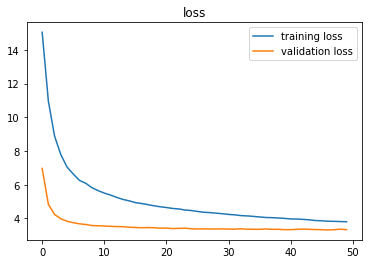

Plotting metrics...


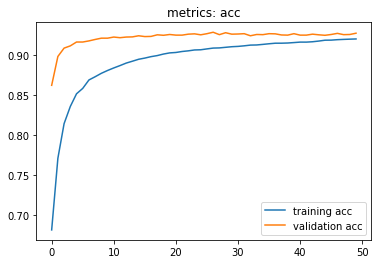

train {'acc': 0.9334}
test {'acc': 0.9249}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14455439348558784032
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 16797367561889753547
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 19.527163 , acc = 0.09 
Epoch 1 , step 100 , loss= 16.076212 , acc = 0.48 
Epoch 1 , step 200 , loss= 11.318595 , acc = 0.69 
Epoch 1 , step 300 , loss= 8.833301 , acc = 0.76 
Epoch 1 , step 400 , loss= 6.914434 , acc = 0.87 
Epoch 1 , step 500 , loss= 6.1507754 , acc = 0.82 
Epoch 1 , step 549 , loss= 5.7996106 val_loss= 5.5483613 , acc = 0.82 val acc = 0.8356 
Epoch 1 finished, loss= 10.660013 
Epoch 2 , step 50 , loss= 5.696787 , acc = 0.82 
Epoch 2 , step 150 , loss=

Epoch 20 , step 150 , loss= 2.1060152 , acc = 0.95 
Epoch 20 , step 250 , loss= 1.6533465 , acc = 0.93 
Epoch 20 , step 350 , loss= 1.6452335 , acc = 0.95 
Epoch 20 , step 450 , loss= 2.2252479 , acc = 0.93 
Epoch 20 , step 549 , loss= 2.6327982 val_loss= 2.4682376 , acc = 0.94 val acc = 0.9232 
Epoch 20 finished, loss= 3.3056762 
Epoch 21 , step 0 , loss= 3.2506604 , acc = 0.9 
Epoch 21 , step 100 , loss= 1.9904249 , acc = 0.94 
Epoch 21 , step 200 , loss= 3.4035358 , acc = 0.89 
Epoch 21 , step 300 , loss= 1.8005185 , acc = 0.93 
Epoch 21 , step 400 , loss= 1.5897745 , acc = 0.94 
Epoch 21 , step 500 , loss= 2.6071644 , acc = 0.9 
Epoch 21 , step 549 , loss= 1.8946817 val_loss= 2.4586637 , acc = 0.93 val acc = 0.9236 
Epoch 21 finished, loss= 3.2574792 
Epoch 22 , step 50 , loss= 2.3546145 , acc = 0.93 
Epoch 22 , step 150 , loss= 3.6784809 , acc = 0.88 
Epoch 22 , step 250 , loss= 2.788389 , acc = 0.91 
Epoch 22 , step 350 , loss= 1.7546475 , acc = 0.96 
Epoch 22 , step 450 , loss= 

Epoch 40 , step 350 , loss= 2.9698634 , acc = 0.9 
Epoch 40 , step 450 , loss= 2.439389 , acc = 0.91 
Epoch 40 , step 549 , loss= 1.8893644 val_loss= 2.3675365 , acc = 0.94 val acc = 0.9298 
Epoch 40 finished, loss= 2.8006728 
Epoch 41 , step 0 , loss= 2.2124126 , acc = 0.88 
Epoch 41 , step 100 , loss= 2.888132 , acc = 0.91 
Epoch 41 , step 200 , loss= 2.3339539 , acc = 0.91 
Epoch 41 , step 300 , loss= 2.028209 , acc = 0.93 
Epoch 41 , step 400 , loss= 2.4417737 , acc = 0.92 
Epoch 41 , step 500 , loss= 2.6611362 , acc = 0.93 
Epoch 41 , step 549 , loss= 3.2284584 val_loss= 2.377727 , acc = 0.93 val acc = 0.93 
Epoch 41 finished, loss= 2.7938914 
Epoch 42 , step 50 , loss= 2.4479883 , acc = 0.94 
Epoch 42 , step 150 , loss= 1.6781906 , acc = 0.96 
Epoch 42 , step 250 , loss= 2.8159964 , acc = 0.93 
Epoch 42 , step 350 , loss= 2.0113132 , acc = 0.96 
Epoch 42 , step 450 , loss= 2.3189154 , acc = 0.93 
Epoch 42 , step 549 , loss= 2.1603346 val_loss= 2.385108 , acc = 0.94 val acc = 0.92

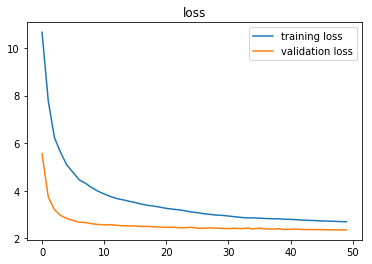

Plotting metrics...


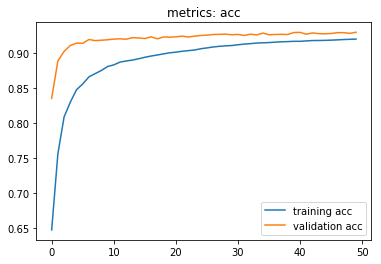

train {'acc': 0.93416363}
test {'acc': 0.9273}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 602217344984304208
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5967904768
locality {
  bus_id: 1
}
incarnation: 4941917136386823326
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 10.975166 , acc = 0.05 
Epoch 1 , step 100 , loss= 8.810875 , acc = 0.58 
Epoch 1 , step 200 , loss= 6.117855 , acc = 0.81 
Epoch 1 , step 300 , loss= 4.6795464 , acc = 0.79 
Epoch 1 , step 400 , loss= 3.888717 , acc = 0.82 
Epoch 1 , step 500 , loss= 4.0746245 , acc = 0.77 
Epoch 1 , step 549 , loss= 3.2015119 val_loss= 3.0710404 , acc = 0.87 val acc = 0.86 
Epoch 1 finished, loss= 5.964042 
Epoch 2 , step 50 , loss= 3.5490594 , acc = 0.84 
Epoch 2 , step 150 , loss=

Epoch 20 , step 150 , loss= 1.172792 , acc = 0.96 
Epoch 20 , step 250 , loss= 1.7741196 , acc = 0.9 
Epoch 20 , step 350 , loss= 1.0666027 , acc = 0.94 
Epoch 20 , step 450 , loss= 2.361045 , acc = 0.91 
Epoch 20 , step 549 , loss= 1.2790798 val_loss= 1.5757697 , acc = 0.96 val acc = 0.9216 
Epoch 20 finished, loss= 2.0251477 
Epoch 21 , step 0 , loss= 1.5116191 , acc = 0.94 
Epoch 21 , step 100 , loss= 1.3317989 , acc = 0.95 
Epoch 21 , step 200 , loss= 1.2089512 , acc = 0.93 
Epoch 21 , step 300 , loss= 1.6772006 , acc = 0.93 
Epoch 21 , step 400 , loss= 1.3569884 , acc = 0.89 
Epoch 21 , step 500 , loss= 1.8643622 , acc = 0.89 
Epoch 21 , step 549 , loss= 2.4434075 val_loss= 1.5726222 , acc = 0.91 val acc = 0.9216 
Epoch 21 finished, loss= 2.0048432 
Epoch 22 , step 50 , loss= 2.7410026 , acc = 0.89 
Epoch 22 , step 150 , loss= 0.97177976 , acc = 0.96 
Epoch 22 , step 250 , loss= 2.0886335 , acc = 0.93 
Epoch 22 , step 350 , loss= 1.1571065 , acc = 0.97 
Epoch 22 , step 450 , loss=

Epoch 40 , step 250 , loss= 2.7698169 , acc = 0.86 
Epoch 40 , step 350 , loss= 1.7148347 , acc = 0.9 
Epoch 40 , step 450 , loss= 1.0396962 , acc = 0.96 
Epoch 40 , step 549 , loss= 2.4903622 val_loss= 1.5248797 , acc = 0.9 val acc = 0.926 
Epoch 40 finished, loss= 1.7604579 
Epoch 41 , step 0 , loss= 1.8428249 , acc = 0.95 
Epoch 41 , step 100 , loss= 2.3830285 , acc = 0.9 
Epoch 41 , step 200 , loss= 1.3689262 , acc = 0.91 
Epoch 41 , step 300 , loss= 1.6675507 , acc = 0.92 
Epoch 41 , step 400 , loss= 2.6594641 , acc = 0.88 
Epoch 41 , step 500 , loss= 2.8604097 , acc = 0.9 
Epoch 41 , step 549 , loss= 0.8296647 val_loss= 1.5297415 , acc = 0.96 val acc = 0.9242 
Epoch 41 finished, loss= 1.7652844 
Epoch 42 , step 50 , loss= 1.7891154 , acc = 0.93 
Epoch 42 , step 150 , loss= 2.1228077 , acc = 0.86 
Epoch 42 , step 250 , loss= 1.1760914 , acc = 0.97 
Epoch 42 , step 350 , loss= 1.2676275 , acc = 0.92 
Epoch 42 , step 450 , loss= 1.2949672 , acc = 0.96 
Epoch 42 , step 549 , loss= 1.

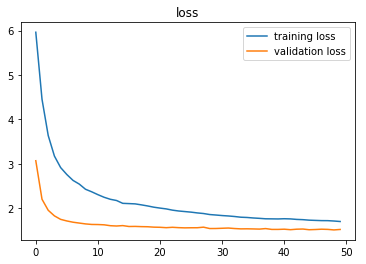

Plotting metrics...


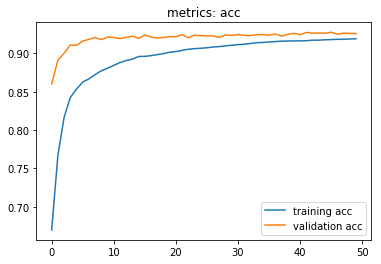

train {'acc': 0.93325454}
test {'acc': 0.9234}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8944616470429884704
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 3428087873047683733
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3295352 , acc = 0.11 
Epoch 1 , step 100 , loss= 1.3739772 , acc = 0.73 
Epoch 1 , step 200 , loss= 0.86218065 , acc = 0.7 
Epoch 1 , step 300 , loss= 0.6669822 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.53641844 , acc = 0.83 
Epoch 1 , step 500 , loss= 0.5017182 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.42520317 val_loss= 0.43711782 , acc = 0.91 val acc = 0.879 
Epoch 1 finished, loss= 0.95657355 
Epoch 2 , step 50 , loss= 0.34328216 , acc = 0.89 
Epoch 2 , step 15

Epoch 19 , step 549 , loss= 0.17133135 val_loss= 0.2719156 , acc = 0.95 val acc = 0.9242 
Epoch 19 finished, loss= 0.31379882 
Epoch 20 , step 50 , loss= 0.17244945 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.19351444 , acc = 0.94 
Epoch 20 , step 250 , loss= 0.3429 , acc = 0.94 
Epoch 20 , step 350 , loss= 0.25773907 , acc = 0.92 
Epoch 20 , step 450 , loss= 0.34076187 , acc = 0.9 
Epoch 20 , step 549 , loss= 0.14301005 val_loss= 0.26931116 , acc = 0.97 val acc = 0.9274 
Epoch 20 finished, loss= 0.31047255 
Epoch 21 , step 0 , loss= 0.18403774 , acc = 0.94 
Epoch 21 , step 100 , loss= 0.23775344 , acc = 0.95 
Epoch 21 , step 200 , loss= 0.152357 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.22630292 , acc = 0.9 
Epoch 21 , step 400 , loss= 0.14664617 , acc = 0.96 
Epoch 21 , step 500 , loss= 0.26008725 , acc = 0.9 
Epoch 21 , step 549 , loss= 0.24207777 val_loss= 0.2661397 , acc = 0.93 val acc = 0.9256 
Epoch 21 finished, loss= 0.30518752 
Epoch 22 , step 50 , loss= 0.12736721 , acc = 0

Epoch 39 , step 400 , loss= 0.24361904 , acc = 0.91 
Epoch 39 , step 500 , loss= 0.15949377 , acc = 0.96 
Epoch 39 , step 549 , loss= 0.15983027 val_loss= 0.27250826 , acc = 0.97 val acc = 0.923 
Epoch 39 finished, loss= 0.2744265 
Epoch 40 , step 50 , loss= 0.28973687 , acc = 0.9 
Epoch 40 , step 150 , loss= 0.22555465 , acc = 0.91 
Epoch 40 , step 250 , loss= 0.31115243 , acc = 0.93 
Epoch 40 , step 350 , loss= 0.3723505 , acc = 0.89 
Epoch 40 , step 450 , loss= 0.22976664 , acc = 0.94 
Epoch 40 , step 549 , loss= 0.28954148 val_loss= 0.2639675 , acc = 0.91 val acc = 0.9264 
Epoch 40 finished, loss= 0.27470168 
Epoch 41 , step 0 , loss= 0.2545357 , acc = 0.96 
Epoch 41 , step 100 , loss= 0.22253029 , acc = 0.92 
Epoch 41 , step 200 , loss= 0.13342832 , acc = 0.95 
Epoch 41 , step 300 , loss= 0.39971203 , acc = 0.87 
Epoch 41 , step 400 , loss= 0.28279966 , acc = 0.94 
Epoch 41 , step 500 , loss= 0.18919252 , acc = 0.94 
Epoch 41 , step 549 , loss= 0.22076926 val_loss= 0.26395956 , ac

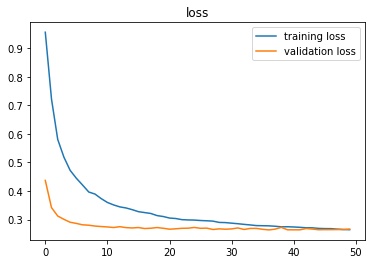

Plotting metrics...


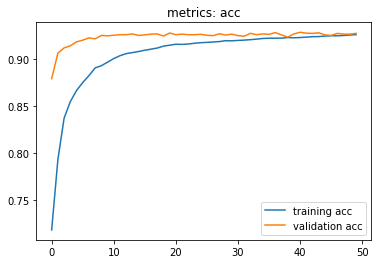

train {'acc': 0.9353273}
test {'acc': 0.9271}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5073328400464598494
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 9924391245689583316
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 147.2403 , acc = 0.09 
Epoch 1 , step 100 , loss= 134.2625 , acc = 0.51 
Epoch 1 , step 200 , loss= 104.3223 , acc = 0.54 
Epoch 1 , step 300 , loss= 83.71341 , acc = 0.64 
Epoch 1 , step 400 , loss= 74.879974 , acc = 0.64 
Epoch 1 , step 500 , loss= 63.12857 , acc = 0.69 
Epoch 1 , step 549 , loss= 57.566498 val_loss= 57.622467 , acc = 0.83 val acc = 0.7732 
Epoch 1 finished, loss= 95.01622 
Epoch 2 , step 50 , loss= 66.09428 , acc = 0.69 
Epoch 2 , step 150 , loss= 50

Epoch 20 , step 150 , loss= 25.829853 , acc = 0.92 
Epoch 20 , step 250 , loss= 17.652485 , acc = 0.95 
Epoch 20 , step 350 , loss= 24.392061 , acc = 0.96 
Epoch 20 , step 450 , loss= 29.039248 , acc = 0.93 
Epoch 20 , step 549 , loss= 19.2143 val_loss= 25.791624 , acc = 0.92 val acc = 0.9248 
Epoch 20 finished, loss= 33.873566 
Epoch 21 , step 0 , loss= 30.624573 , acc = 0.92 
Epoch 21 , step 100 , loss= 28.43068 , acc = 0.93 
Epoch 21 , step 200 , loss= 20.176508 , acc = 0.95 
Epoch 21 , step 300 , loss= 32.47969 , acc = 0.88 
Epoch 21 , step 400 , loss= 28.160673 , acc = 0.91 
Epoch 21 , step 500 , loss= 22.049522 , acc = 0.94 
Epoch 21 , step 549 , loss= 25.411095 val_loss= 25.796188 , acc = 0.92 val acc = 0.925 
Epoch 21 finished, loss= 33.510193 
Epoch 22 , step 50 , loss= 26.299301 , acc = 0.91 
Epoch 22 , step 150 , loss= 30.149773 , acc = 0.91 
Epoch 22 , step 250 , loss= 19.109861 , acc = 0.98 
Epoch 22 , step 350 , loss= 22.888288 , acc = 0.94 
Epoch 22 , step 450 , loss= 25

Epoch 40 , step 350 , loss= 22.77805 , acc = 0.95 
Epoch 40 , step 450 , loss= 16.814983 , acc = 0.93 
Epoch 40 , step 549 , loss= 30.646296 val_loss= 25.171576 , acc = 0.9 val acc = 0.9278 
Epoch 40 finished, loss= 30.02633 
Epoch 41 , step 0 , loss= 27.167427 , acc = 0.94 
Epoch 41 , step 100 , loss= 17.6384 , acc = 0.99 
Epoch 41 , step 200 , loss= 35.710297 , acc = 0.9 
Epoch 41 , step 300 , loss= 29.373611 , acc = 0.91 
Epoch 41 , step 400 , loss= 26.692192 , acc = 0.91 
Epoch 41 , step 500 , loss= 21.220268 , acc = 0.93 
Epoch 41 , step 549 , loss= 21.592257 val_loss= 25.091415 , acc = 0.93 val acc = 0.929 
Epoch 41 finished, loss= 29.911015 
Epoch 42 , step 50 , loss= 29.770012 , acc = 0.93 
Epoch 42 , step 150 , loss= 22.151543 , acc = 0.94 
Epoch 42 , step 250 , loss= 24.266624 , acc = 0.93 
Epoch 42 , step 350 , loss= 29.05312 , acc = 0.92 
Epoch 42 , step 450 , loss= 24.056824 , acc = 0.93 
Epoch 42 , step 549 , loss= 22.988901 val_loss= 25.100725 , acc = 0.93 val acc = 0.92

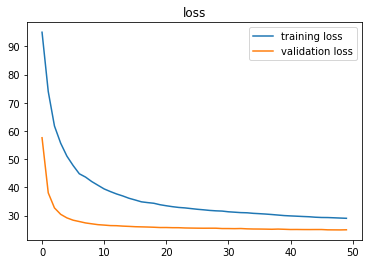

Plotting metrics...


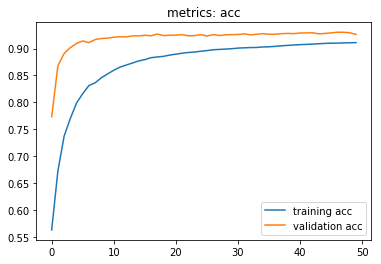

train {'acc': 0.92716366}
test {'acc': 0.9205}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8759768832142640360
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 13889742580353706486
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 111.03668 , acc = 0.07 
Epoch 1 , step 100 , loss= 104.32406 , acc = 0.35 
Epoch 1 , step 200 , loss= 82.1074 , acc = 0.64 
Epoch 1 , step 300 , loss= 67.1832 , acc = 0.63 
Epoch 1 , step 400 , loss= 53.81248 , acc = 0.73 
Epoch 1 , step 500 , loss= 51.957615 , acc = 0.71 
Epoch 1 , step 549 , loss= 39.38816 val_loss= 42.491215 , acc = 0.84 val acc = 0.7914 
Epoch 1 finished, loss= 72.82994 
Epoch 2 , step 50 , loss= 42.12747 , acc = 0.79 
Epoch 2 , step 150 , loss=

Epoch 20 , step 50 , loss= 32.706978 , acc = 0.87 
Epoch 20 , step 150 , loss= 19.0522 , acc = 0.92 
Epoch 20 , step 250 , loss= 20.219847 , acc = 0.95 
Epoch 20 , step 350 , loss= 19.30414 , acc = 0.92 
Epoch 20 , step 450 , loss= 16.664724 , acc = 0.93 
Epoch 20 , step 549 , loss= 25.62629 val_loss= 19.684566 , acc = 0.92 val acc = 0.9222 
Epoch 20 finished, loss= 25.5439 
Epoch 21 , step 0 , loss= 24.399672 , acc = 0.88 
Epoch 21 , step 100 , loss= 19.113379 , acc = 0.94 
Epoch 21 , step 200 , loss= 17.114704 , acc = 0.92 
Epoch 21 , step 300 , loss= 20.167953 , acc = 0.9 
Epoch 21 , step 400 , loss= 23.58059 , acc = 0.91 
Epoch 21 , step 500 , loss= 23.09845 , acc = 0.91 
Epoch 21 , step 549 , loss= 19.81502 val_loss= 19.633036 , acc = 0.93 val acc = 0.922 
Epoch 21 finished, loss= 25.313843 
Epoch 22 , step 50 , loss= 17.855818 , acc = 0.94 
Epoch 22 , step 150 , loss= 24.481785 , acc = 0.9 
Epoch 22 , step 250 , loss= 23.200415 , acc = 0.91 
Epoch 22 , step 350 , loss= 20.517756 

Epoch 40 , step 250 , loss= 18.093117 , acc = 0.93 
Epoch 40 , step 350 , loss= 19.153492 , acc = 0.91 
Epoch 40 , step 450 , loss= 25.56018 , acc = 0.89 
Epoch 40 , step 549 , loss= 20.039412 val_loss= 19.29961 , acc = 0.92 val acc = 0.9276 
Epoch 40 finished, loss= 22.979578 
Epoch 41 , step 0 , loss= 15.634128 , acc = 0.97 
Epoch 41 , step 100 , loss= 16.953127 , acc = 0.94 
Epoch 41 , step 200 , loss= 21.203768 , acc = 0.9 
Epoch 41 , step 300 , loss= 15.132507 , acc = 0.96 
Epoch 41 , step 400 , loss= 22.417717 , acc = 0.9 
Epoch 41 , step 500 , loss= 20.127079 , acc = 0.95 
Epoch 41 , step 549 , loss= 14.067758 val_loss= 19.359022 , acc = 0.94 val acc = 0.9242 
Epoch 41 finished, loss= 22.84729 
Epoch 42 , step 50 , loss= 22.705347 , acc = 0.93 
Epoch 42 , step 150 , loss= 17.2997 , acc = 0.94 
Epoch 42 , step 250 , loss= 20.764517 , acc = 0.94 
Epoch 42 , step 350 , loss= 21.113983 , acc = 0.9 
Epoch 42 , step 450 , loss= 20.026014 , acc = 0.93 
Epoch 42 , step 549 , loss= 19.09

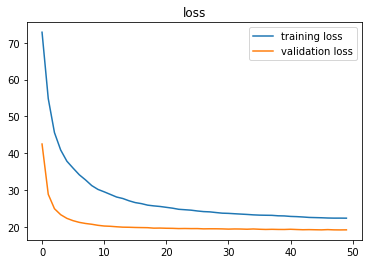

Plotting metrics...


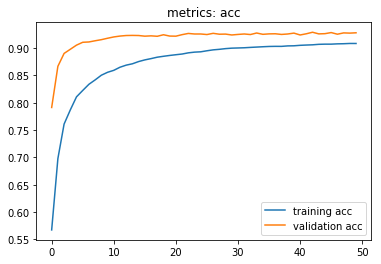

train {'acc': 0.9270545}
test {'acc': 0.9231}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14268116357828981378
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 3152646759301407237
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 74.77744 , acc = 0.13 
Epoch 1 , step 100 , loss= 67.741165 , acc = 0.5 
Epoch 1 , step 200 , loss= 54.88586 , acc = 0.61 
Epoch 1 , step 300 , loss= 42.200714 , acc = 0.7 
Epoch 1 , step 400 , loss= 30.798569 , acc = 0.82 
Epoch 1 , step 500 , loss= 27.660818 , acc = 0.84 
Epoch 1 , step 549 , loss= 28.297028 val_loss= 27.578228 , acc = 0.81 val acc = 0.8136 
Epoch 1 finished, loss= 46.623085 
Epoch 2 , step 50 , loss= 29.422682 , acc = 0.79 
Epoch 2 , step 150 , loss

Epoch 20 , step 50 , loss= 12.373523 , acc = 0.93 
Epoch 20 , step 150 , loss= 14.852073 , acc = 0.93 
Epoch 20 , step 250 , loss= 13.259595 , acc = 0.92 
Epoch 20 , step 350 , loss= 15.9722595 , acc = 0.92 
Epoch 20 , step 450 , loss= 12.63779 , acc = 0.93 
Epoch 20 , step 549 , loss= 14.091008 val_loss= 13.456921 , acc = 0.93 val acc = 0.922 
Epoch 20 finished, loss= 17.25624 
Epoch 21 , step 0 , loss= 16.765839 , acc = 0.88 
Epoch 21 , step 100 , loss= 16.587528 , acc = 0.86 
Epoch 21 , step 200 , loss= 15.305008 , acc = 0.92 
Epoch 21 , step 300 , loss= 9.640665 , acc = 0.97 
Epoch 21 , step 400 , loss= 13.964296 , acc = 0.93 
Epoch 21 , step 500 , loss= 11.948584 , acc = 0.94 
Epoch 21 , step 549 , loss= 12.847535 val_loss= 13.450614 , acc = 0.91 val acc = 0.9228 
Epoch 21 finished, loss= 17.082998 
Epoch 22 , step 50 , loss= 10.781691 , acc = 0.94 
Epoch 22 , step 150 , loss= 14.413567 , acc = 0.94 
Epoch 22 , step 250 , loss= 12.861837 , acc = 0.96 
Epoch 22 , step 350 , loss= 1

Epoch 40 , step 150 , loss= 12.234722 , acc = 0.95 
Epoch 40 , step 250 , loss= 9.345875 , acc = 0.98 
Epoch 40 , step 350 , loss= 10.152268 , acc = 0.96 
Epoch 40 , step 450 , loss= 13.857171 , acc = 0.94 
Epoch 40 , step 549 , loss= 11.947364 val_loss= 13.148959 , acc = 0.92 val acc = 0.9278 
Epoch 40 finished, loss= 15.337141 
Epoch 41 , step 0 , loss= 8.558279 , acc = 0.98 
Epoch 41 , step 100 , loss= 8.481974 , acc = 0.96 
Epoch 41 , step 200 , loss= 14.543776 , acc = 0.9 
Epoch 41 , step 300 , loss= 12.094413 , acc = 0.94 
Epoch 41 , step 400 , loss= 13.448524 , acc = 0.96 
Epoch 41 , step 500 , loss= 13.070972 , acc = 0.95 
Epoch 41 , step 549 , loss= 12.303757 val_loss= 13.143587 , acc = 0.91 val acc = 0.929 
Epoch 41 finished, loss= 15.24404 
Epoch 42 , step 50 , loss= 10.902256 , acc = 0.95 
Epoch 42 , step 150 , loss= 9.790352 , acc = 0.95 
Epoch 42 , step 250 , loss= 11.135074 , acc = 0.94 
Epoch 42 , step 350 , loss= 17.277452 , acc = 0.88 
Epoch 42 , step 450 , loss= 13.6

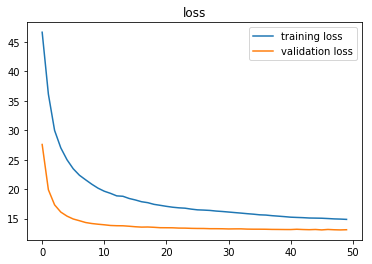

Plotting metrics...


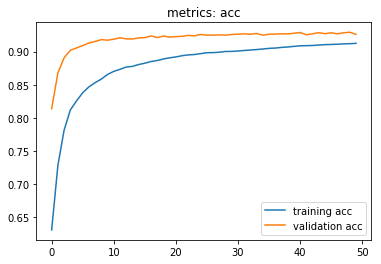

train {'acc': 0.92843634}
test {'acc': 0.9248}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13837016801814047445
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 16477766405520268137
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 38.51706 , acc = 0.08 
Epoch 1 , step 100 , loss= 34.701084 , acc = 0.48 
Epoch 1 , step 200 , loss= 28.269873 , acc = 0.64 
Epoch 1 , step 300 , loss= 24.273836 , acc = 0.73 
Epoch 1 , step 400 , loss= 18.941505 , acc = 0.8 
Epoch 1 , step 500 , loss= 14.65673 , acc = 0.84 
Epoch 1 , step 549 , loss= 14.587076 val_loss= 14.849889 , acc = 0.8 val acc = 0.8142 
Epoch 1 finished, loss= 24.849594 
Epoch 2 , step 50 , loss= 14.024559 , acc = 0.84 
Epoch 2 , step 150 , 

Epoch 20 , step 150 , loss= 9.232878 , acc = 0.93 
Epoch 20 , step 250 , loss= 7.7588196 , acc = 0.88 
Epoch 20 , step 350 , loss= 8.785909 , acc = 0.9 
Epoch 20 , step 450 , loss= 8.444006 , acc = 0.93 
Epoch 20 , step 549 , loss= 6.441889 val_loss= 7.4455385 , acc = 0.95 val acc = 0.918 
Epoch 20 finished, loss= 9.42941 
Epoch 21 , step 0 , loss= 7.783473 , acc = 0.89 
Epoch 21 , step 100 , loss= 4.6823645 , acc = 0.97 
Epoch 21 , step 200 , loss= 11.103705 , acc = 0.88 
Epoch 21 , step 300 , loss= 7.0957837 , acc = 0.88 
Epoch 21 , step 400 , loss= 7.0136766 , acc = 0.92 
Epoch 21 , step 500 , loss= 9.739353 , acc = 0.91 
Epoch 21 , step 549 , loss= 8.221138 val_loss= 7.4420805 , acc = 0.94 val acc = 0.9204 
Epoch 21 finished, loss= 9.353742 
Epoch 22 , step 50 , loss= 10.525095 , acc = 0.88 
Epoch 22 , step 150 , loss= 8.247057 , acc = 0.9 
Epoch 22 , step 250 , loss= 6.1474 , acc = 0.96 
Epoch 22 , step 350 , loss= 9.122768 , acc = 0.88 
Epoch 22 , step 450 , loss= 8.922658 , acc 

Epoch 40 , step 450 , loss= 7.8578863 , acc = 0.92 
Epoch 40 , step 549 , loss= 6.1415305 val_loss= 7.1718607 , acc = 0.94 val acc = 0.9236 
Epoch 40 finished, loss= 8.517275 
Epoch 41 , step 0 , loss= 9.336306 , acc = 0.89 
Epoch 41 , step 100 , loss= 5.7222 , acc = 0.95 
Epoch 41 , step 200 , loss= 8.017672 , acc = 0.9 
Epoch 41 , step 300 , loss= 7.3236017 , acc = 0.93 
Epoch 41 , step 400 , loss= 6.4293647 , acc = 0.93 
Epoch 41 , step 500 , loss= 7.149823 , acc = 0.91 
Epoch 41 , step 549 , loss= 6.9156327 val_loss= 7.187026 , acc = 0.93 val acc = 0.9214 
Epoch 41 finished, loss= 8.484592 
Epoch 42 , step 50 , loss= 6.0443797 , acc = 0.95 
Epoch 42 , step 150 , loss= 6.0823445 , acc = 0.94 
Epoch 42 , step 250 , loss= 6.668042 , acc = 0.94 
Epoch 42 , step 350 , loss= 7.81871 , acc = 0.9 
Epoch 42 , step 450 , loss= 6.265437 , acc = 0.93 
Epoch 42 , step 549 , loss= 9.250678 val_loss= 7.1547956 , acc = 0.93 val acc = 0.9244 
Epoch 42 finished, loss= 8.452438 
Epoch 43 , step 0 , l

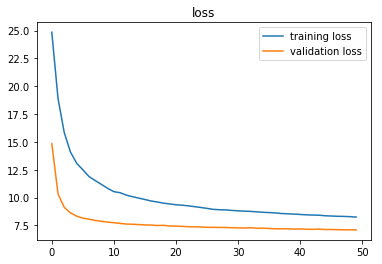

Plotting metrics...


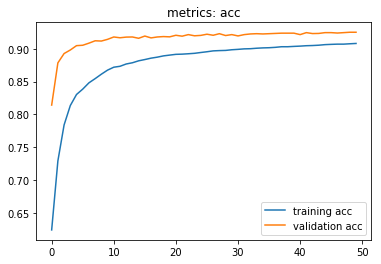

train {'acc': 0.92807275}
test {'acc': 0.925}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17744808466904448350
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 3386923893474811566
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.312542 , acc = 0.04 
Epoch 1 , step 100 , loss= 1.3548698 , acc = 0.72 
Epoch 1 , step 200 , loss= 0.7865987 , acc = 0.79 
Epoch 1 , step 300 , loss= 0.56390333 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.54113567 , acc = 0.84 
Epoch 1 , step 500 , loss= 0.5071278 , acc = 0.84 
Epoch 1 , step 549 , loss= 0.38542178 val_loss= 0.4192765 , acc = 0.9 val acc = 0.8862 
Epoch 1 finished, loss= 0.921657 
Epoch 2 , step 50 , loss= 0.30817196 , acc = 0.94 
Epoch 2 , step 150 ,

Epoch 19 , step 549 , loss= 0.27647096 val_loss= 0.2546948 , acc = 0.93 val acc = 0.9286 
Epoch 19 finished, loss= 0.30646664 
Epoch 20 , step 50 , loss= 0.20947 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.39995 , acc = 0.88 
Epoch 20 , step 250 , loss= 0.18685281 , acc = 0.94 
Epoch 20 , step 350 , loss= 0.14630537 , acc = 0.95 
Epoch 20 , step 450 , loss= 0.2320344 , acc = 0.9 
Epoch 20 , step 549 , loss= 0.30445927 val_loss= 0.25284678 , acc = 0.94 val acc = 0.9268 
Epoch 20 finished, loss= 0.3036995 
Epoch 21 , step 0 , loss= 0.12145634 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.09606331 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.24144416 , acc = 0.94 
Epoch 21 , step 300 , loss= 0.20609672 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.15070325 , acc = 0.96 
Epoch 21 , step 500 , loss= 0.32123366 , acc = 0.94 
Epoch 21 , step 549 , loss= 0.1435862 val_loss= 0.25447732 , acc = 0.96 val acc = 0.9254 
Epoch 21 finished, loss= 0.29752934 
Epoch 22 , step 50 , loss= 0.2386066 , acc = 0.

Epoch 39 , step 500 , loss= 0.23432739 , acc = 0.93 
Epoch 39 , step 549 , loss= 0.35656944 val_loss= 0.24878152 , acc = 0.93 val acc = 0.93 
Epoch 39 finished, loss= 0.27244213 
Epoch 40 , step 50 , loss= 0.218409 , acc = 0.9 
Epoch 40 , step 150 , loss= 0.1572006 , acc = 0.95 
Epoch 40 , step 250 , loss= 0.12696183 , acc = 0.96 
Epoch 40 , step 350 , loss= 0.102319285 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.18659025 , acc = 0.96 
Epoch 40 , step 549 , loss= 0.16205823 val_loss= 0.248543 , acc = 0.95 val acc = 0.9288 
Epoch 40 finished, loss= 0.26982245 
Epoch 41 , step 0 , loss= 0.31421325 , acc = 0.89 
Epoch 41 , step 100 , loss= 0.17460674 , acc = 0.94 
Epoch 41 , step 200 , loss= 0.14740217 , acc = 0.95 
Epoch 41 , step 300 , loss= 0.32282624 , acc = 0.93 
Epoch 41 , step 400 , loss= 0.30523363 , acc = 0.92 
Epoch 41 , step 500 , loss= 0.17295757 , acc = 0.95 
Epoch 41 , step 549 , loss= 0.17268635 val_loss= 0.24978635 , acc = 0.95 val acc = 0.9296 
Epoch 41 finished, loss= 0.

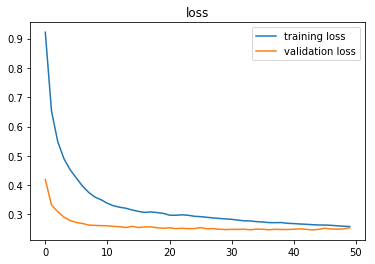

Plotting metrics...


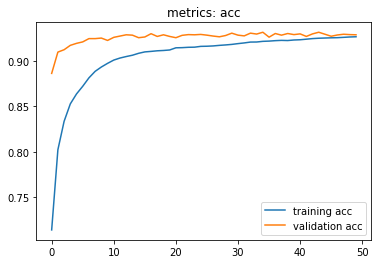

train {'acc': 0.9393455}
test {'acc': 0.9299}

Training student with temperature = 16 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14401520329752120969
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 10279953373538160972
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 589.3846 , acc = 0.08 
Epoch 1 , step 100 , loss= 564.9414 , acc = 0.3 
Epoch 1 , step 200 , loss= 519.0332 , acc = 0.28 
Epoch 1 , step 300 , loss= 454.8315 , acc = 0.59 
Epoch 1 , step 400 , loss= 417.51056 , acc = 0.63 
Epoch 1 , step 500 , loss= 370.32047 , acc = 0.71 
Epoch 1 , step 549 , loss= 374.2786 val_loss= 352.59644 , acc = 0.7 val acc = 0.7192 
Epoch 1 finished, loss= 470.0429 
Epoch 2 , step 50 , loss= 332.7965 , acc = 0.76 
Epoch 2 , step 150 , loss= 

Epoch 20 , step 150 , loss= 257.89883 , acc = 0.95 
Epoch 20 , step 250 , loss= 223.77911 , acc = 0.93 
Epoch 20 , step 350 , loss= 278.97372 , acc = 0.87 
Epoch 20 , step 450 , loss= 279.12732 , acc = 0.86 
Epoch 20 , step 549 , loss= 211.04443 val_loss= 241.89897 , acc = 0.91 val acc = 0.9072 
Epoch 20 finished, loss= 268.63995 
Epoch 21 , step 0 , loss= 275.68576 , acc = 0.84 
Epoch 21 , step 100 , loss= 235.2503 , acc = 0.92 
Epoch 21 , step 200 , loss= 242.1204 , acc = 0.94 
Epoch 21 , step 300 , loss= 262.01758 , acc = 0.85 
Epoch 21 , step 400 , loss= 239.71834 , acc = 0.91 
Epoch 21 , step 500 , loss= 250.85884 , acc = 0.93 
Epoch 21 , step 549 , loss= 268.8324 val_loss= 241.60193 , acc = 0.85 val acc = 0.9074 
Epoch 21 finished, loss= 267.86624 
Epoch 22 , step 50 , loss= 263.10474 , acc = 0.89 
Epoch 22 , step 150 , loss= 256.16965 , acc = 0.91 
Epoch 22 , step 250 , loss= 251.2752 , acc = 0.9 
Epoch 22 , step 350 , loss= 218.9407 , acc = 0.92 
Epoch 22 , step 450 , loss= 264

Epoch 40 , step 350 , loss= 235.60489 , acc = 0.93 
Epoch 40 , step 450 , loss= 249.16962 , acc = 0.89 
Epoch 40 , step 549 , loss= 279.70947 val_loss= 237.87825 , acc = 0.86 val acc = 0.9126 
Epoch 40 finished, loss= 258.0925 
Epoch 41 , step 0 , loss= 251.15138 , acc = 0.92 
Epoch 41 , step 100 , loss= 260.51077 , acc = 0.88 
Epoch 41 , step 200 , loss= 257.89746 , acc = 0.89 
Epoch 41 , step 300 , loss= 258.10458 , acc = 0.91 
Epoch 41 , step 400 , loss= 220.85347 , acc = 0.92 
Epoch 41 , step 500 , loss= 266.1208 , acc = 0.9 
Epoch 41 , step 549 , loss= 215.9958 val_loss= 237.7556 , acc = 0.92 val acc = 0.911 
Epoch 41 finished, loss= 257.8078 
Epoch 42 , step 50 , loss= 197.13512 , acc = 0.93 
Epoch 42 , step 150 , loss= 219.14885 , acc = 0.97 
Epoch 42 , step 250 , loss= 225.3774 , acc = 0.9 
Epoch 42 , step 350 , loss= 284.62238 , acc = 0.87 
Epoch 42 , step 450 , loss= 280.10406 , acc = 0.89 
Epoch 42 , step 549 , loss= 234.70953 val_loss= 237.6853 , acc = 0.91 val acc = 0.9124

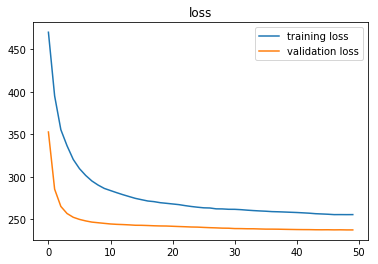

Plotting metrics...


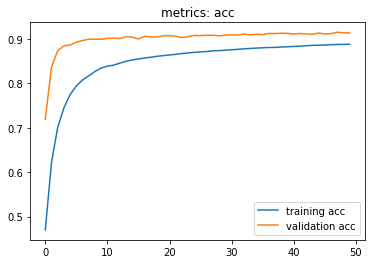

train {'acc': 0.9080909}
test {'acc': 0.9071}

Training student with temperature = 16 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11551614856436046072
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 3386577946877737845
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 442.51193 , acc = 0.11 
Epoch 1 , step 100 , loss= 423.76645 , acc = 0.38 
Epoch 1 , step 200 , loss= 378.05054 , acc = 0.5 
Epoch 1 , step 300 , loss= 342.25024 , acc = 0.48 
Epoch 1 , step 400 , loss= 288.52902 , acc = 0.6 
Epoch 1 , step 500 , loss= 275.05215 , acc = 0.74 
Epoch 1 , step 549 , loss= 256.07962 val_loss= 255.03862 , acc = 0.78 val acc = 0.7068 
Epoch 1 finished, loss= 343.74857 
Epoch 2 , step 50 , loss= 243.11363 , acc = 0.74 
Epoch 2 , step 150 

Epoch 20 , step 50 , loss= 174.67947 , acc = 0.94 
Epoch 20 , step 150 , loss= 196.18582 , acc = 0.91 
Epoch 20 , step 250 , loss= 179.41612 , acc = 0.91 
Epoch 20 , step 350 , loss= 197.28458 , acc = 0.93 
Epoch 20 , step 450 , loss= 203.09383 , acc = 0.94 
Epoch 20 , step 549 , loss= 190.68167 val_loss= 179.9158 , acc = 0.87 val acc = 0.9094 
Epoch 20 finished, loss= 201.24919 
Epoch 21 , step 0 , loss= 189.36737 , acc = 0.92 
Epoch 21 , step 100 , loss= 208.88095 , acc = 0.89 
Epoch 21 , step 200 , loss= 164.09695 , acc = 0.91 
Epoch 21 , step 300 , loss= 178.18228 , acc = 0.88 
Epoch 21 , step 400 , loss= 172.51234 , acc = 0.92 
Epoch 21 , step 500 , loss= 190.39049 , acc = 0.91 
Epoch 21 , step 549 , loss= 168.73476 val_loss= 179.74098 , acc = 0.94 val acc = 0.9064 
Epoch 21 finished, loss= 200.25226 
Epoch 22 , step 50 , loss= 157.82787 , acc = 0.95 
Epoch 22 , step 150 , loss= 178.25063 , acc = 0.94 
Epoch 22 , step 250 , loss= 199.6507 , acc = 0.91 
Epoch 22 , step 350 , loss= 

Epoch 40 , step 150 , loss= 186.43036 , acc = 0.9 
Epoch 40 , step 250 , loss= 209.27434 , acc = 0.86 
Epoch 40 , step 350 , loss= 185.77621 , acc = 0.86 
Epoch 40 , step 450 , loss= 207.48347 , acc = 0.84 
Epoch 40 , step 549 , loss= 177.02107 val_loss= 177.00235 , acc = 0.94 val acc = 0.9084 
Epoch 40 finished, loss= 193.54593 
Epoch 41 , step 0 , loss= 158.73318 , acc = 0.96 
Epoch 41 , step 100 , loss= 168.37723 , acc = 0.91 
Epoch 41 , step 200 , loss= 162.62167 , acc = 0.92 
Epoch 41 , step 300 , loss= 168.99329 , acc = 0.89 
Epoch 41 , step 400 , loss= 190.07547 , acc = 0.91 
Epoch 41 , step 500 , loss= 178.5076 , acc = 0.92 
Epoch 41 , step 549 , loss= 173.76694 val_loss= 176.92725 , acc = 0.9 val acc = 0.9098 
Epoch 41 finished, loss= 192.9701 
Epoch 42 , step 50 , loss= 168.90952 , acc = 0.85 
Epoch 42 , step 150 , loss= 182.14195 , acc = 0.89 
Epoch 42 , step 250 , loss= 145.20071 , acc = 0.96 
Epoch 42 , step 350 , loss= 182.16054 , acc = 0.89 
Epoch 42 , step 450 , loss= 1

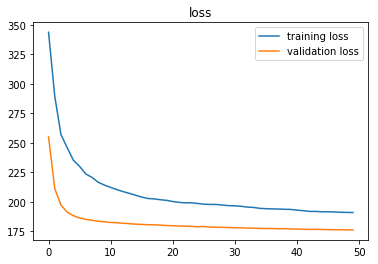

Plotting metrics...


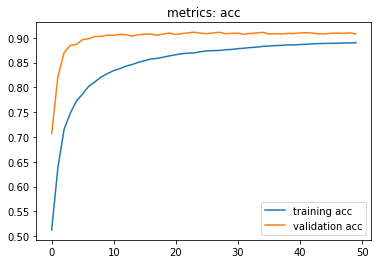

train {'acc': 0.90916365}
test {'acc': 0.9051}

Training student with temperature = 16 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5284932180503767226
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 1534596610894705956
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 295.7306 , acc = 0.15 
Epoch 1 , step 100 , loss= 286.05072 , acc = 0.31 
Epoch 1 , step 200 , loss= 258.25018 , acc = 0.55 
Epoch 1 , step 300 , loss= 218.37196 , acc = 0.7 
Epoch 1 , step 400 , loss= 210.64963 , acc = 0.66 
Epoch 1 , step 500 , loss= 193.37581 , acc = 0.65 
Epoch 1 , step 549 , loss= 184.0122 val_loss= 174.52414 , acc = 0.63 val acc = 0.7244 
Epoch 1 finished, loss= 235.20589 
Epoch 2 , step 50 , loss= 166.59111 , acc = 0.73 
Epoch 2 , step 150 , l

Epoch 20 , step 50 , loss= 119.11484 , acc = 0.93 
Epoch 20 , step 150 , loss= 127.353035 , acc = 0.9 
Epoch 20 , step 250 , loss= 125.208885 , acc = 0.92 
Epoch 20 , step 350 , loss= 136.29977 , acc = 0.87 
Epoch 20 , step 450 , loss= 121.21532 , acc = 0.89 
Epoch 20 , step 549 , loss= 139.92294 val_loss= 120.44049 , acc = 0.89 val acc = 0.9106 
Epoch 20 finished, loss= 135.05743 
Epoch 21 , step 0 , loss= 111.72682 , acc = 0.94 
Epoch 21 , step 100 , loss= 120.74301 , acc = 0.9 
Epoch 21 , step 200 , loss= 115.927536 , acc = 0.94 
Epoch 21 , step 300 , loss= 134.22974 , acc = 0.93 
Epoch 21 , step 400 , loss= 120.45113 , acc = 0.89 
Epoch 21 , step 500 , loss= 143.12962 , acc = 0.86 
Epoch 21 , step 549 , loss= 126.03994 val_loss= 120.32546 , acc = 0.87 val acc = 0.912 
Epoch 21 finished, loss= 134.52347 
Epoch 22 , step 50 , loss= 110.48576 , acc = 0.93 
Epoch 22 , step 150 , loss= 117.3847 , acc = 0.89 
Epoch 22 , step 250 , loss= 122.72437 , acc = 0.92 
Epoch 22 , step 350 , loss=

Epoch 40 , step 150 , loss= 126.751816 , acc = 0.93 
Epoch 40 , step 250 , loss= 125.91695 , acc = 0.91 
Epoch 40 , step 350 , loss= 134.31169 , acc = 0.88 
Epoch 40 , step 450 , loss= 113.23766 , acc = 0.92 
Epoch 40 , step 549 , loss= 138.36366 val_loss= 119.49276 , acc = 0.84 val acc = 0.912 
Epoch 40 finished, loss= 128.40198 
Epoch 41 , step 0 , loss= 138.19403 , acc = 0.92 
Epoch 41 , step 100 , loss= 129.37787 , acc = 0.89 
Epoch 41 , step 200 , loss= 133.68626 , acc = 0.88 
Epoch 41 , step 300 , loss= 120.057846 , acc = 0.92 
Epoch 41 , step 400 , loss= 129.47525 , acc = 0.86 
Epoch 41 , step 500 , loss= 128.858 , acc = 0.89 
Epoch 41 , step 549 , loss= 123.813995 val_loss= 119.54394 , acc = 0.92 val acc = 0.9088 
Epoch 41 finished, loss= 128.4194 
Epoch 42 , step 50 , loss= 114.375565 , acc = 0.91 
Epoch 42 , step 150 , loss= 134.20937 , acc = 0.91 
Epoch 42 , step 250 , loss= 114.32845 , acc = 0.93 
Epoch 42 , step 350 , loss= 110.37664 , acc = 0.95 
Epoch 42 , step 450 , los

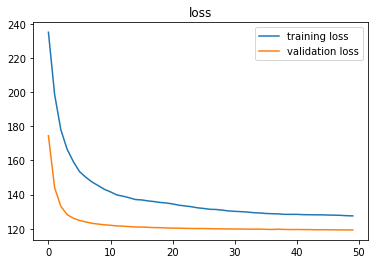

Plotting metrics...


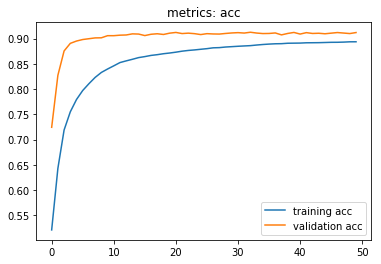

train {'acc': 0.9109455}
test {'acc': 0.9067}

Training student with temperature = 16 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16349616657541476062
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 6837574168724804503
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 149.11479 , acc = 0.11 
Epoch 1 , step 100 , loss= 143.61563 , acc = 0.39 
Epoch 1 , step 200 , loss= 129.54958 , acc = 0.63 
Epoch 1 , step 300 , loss= 116.485344 , acc = 0.69 
Epoch 1 , step 400 , loss= 100.48884 , acc = 0.72 
Epoch 1 , step 500 , loss= 88.91616 , acc = 0.8 
Epoch 1 , step 549 , loss= 85.14975 val_loss= 87.71429 , acc = 0.75 val acc = 0.772 
Epoch 1 finished, loss= 116.18858 
Epoch 2 , step 50 , loss= 86.23925 , acc = 0.76 
Epoch 2 , step 150 , l

Epoch 20 , step 250 , loss= 60.440395 , acc = 0.95 
Epoch 20 , step 350 , loss= 66.31528 , acc = 0.84 
Epoch 20 , step 450 , loss= 61.504787 , acc = 0.91 
Epoch 20 , step 549 , loss= 63.00926 val_loss= 60.763466 , acc = 0.92 val acc = 0.9152 
Epoch 20 finished, loss= 68.22148 
Epoch 21 , step 0 , loss= 65.66186 , acc = 0.93 
Epoch 21 , step 100 , loss= 66.24714 , acc = 0.91 
Epoch 21 , step 200 , loss= 60.329018 , acc = 0.91 
Epoch 21 , step 300 , loss= 59.173264 , acc = 0.88 
Epoch 21 , step 400 , loss= 67.6186 , acc = 0.92 
Epoch 21 , step 500 , loss= 66.26246 , acc = 0.88 
Epoch 21 , step 549 , loss= 64.021576 val_loss= 60.693607 , acc = 0.9 val acc = 0.916 
Epoch 21 finished, loss= 68.01537 
Epoch 22 , step 50 , loss= 71.56209 , acc = 0.87 
Epoch 22 , step 150 , loss= 65.142555 , acc = 0.89 
Epoch 22 , step 250 , loss= 59.03413 , acc = 0.94 
Epoch 22 , step 350 , loss= 72.2857 , acc = 0.85 
Epoch 22 , step 450 , loss= 69.43598 , acc = 0.88 
Epoch 22 , step 549 , loss= 53.05874 val_

Epoch 40 , step 549 , loss= 60.84923 val_loss= 59.77047 , acc = 0.91 val acc = 0.9176 
Epoch 40 finished, loss= 65.40084 
Epoch 41 , step 0 , loss= 55.63769 , acc = 0.91 
Epoch 41 , step 100 , loss= 73.168915 , acc = 0.85 
Epoch 41 , step 200 , loss= 51.57714 , acc = 0.95 
Epoch 41 , step 300 , loss= 65.8713 , acc = 0.9 
Epoch 41 , step 400 , loss= 66.52874 , acc = 0.87 
Epoch 41 , step 500 , loss= 69.77593 , acc = 0.87 
Epoch 41 , step 549 , loss= 60.89339 val_loss= 59.746185 , acc = 0.9 val acc = 0.9168 
Epoch 41 finished, loss= 65.347084 
Epoch 42 , step 50 , loss= 57.730698 , acc = 0.9 
Epoch 42 , step 150 , loss= 61.88575 , acc = 0.92 
Epoch 42 , step 250 , loss= 55.09355 , acc = 0.92 
Epoch 42 , step 350 , loss= 56.168602 , acc = 0.95 
Epoch 42 , step 450 , loss= 59.54319 , acc = 0.87 
Epoch 42 , step 549 , loss= 61.74564 val_loss= 59.690536 , acc = 0.92 val acc = 0.916 
Epoch 42 finished, loss= 65.20088 
Epoch 43 , step 0 , loss= 59.523396 , acc = 0.9 
Epoch 43 , step 100 , loss

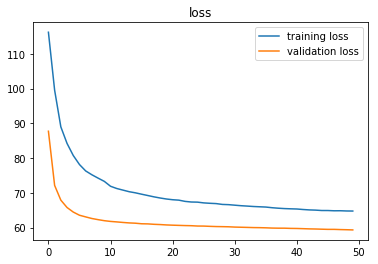

Plotting metrics...


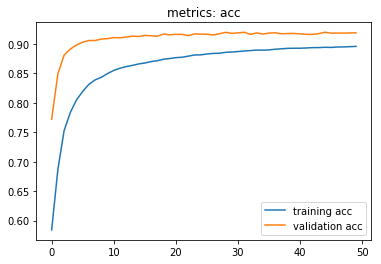

train {'acc': 0.91621816}
test {'acc': 0.911}

Training student with temperature = 16 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11169280521394089439
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 7148894542447415994
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3382444 , acc = 0.09 
Epoch 1 , step 100 , loss= 1.6010704 , acc = 0.49 
Epoch 1 , step 200 , loss= 1.009108 , acc = 0.76 
Epoch 1 , step 300 , loss= 0.53932434 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.6295134 , acc = 0.82 
Epoch 1 , step 500 , loss= 0.5203971 , acc = 0.84 
Epoch 1 , step 549 , loss= 0.4625367 val_loss= 0.45007104 , acc = 0.86 val acc = 0.877 
Epoch 1 finished, loss= 1.0143135 
Epoch 2 , step 50 , loss= 0.41251487 , acc = 0.91 
Epoch 2 , step 150

Epoch 19 , step 549 , loss= 0.17453961 val_loss= 0.2606756 , acc = 0.96 val acc = 0.925 
Epoch 19 finished, loss= 0.32714018 
Epoch 20 , step 50 , loss= 0.18318802 , acc = 0.91 
Epoch 20 , step 150 , loss= 0.28681964 , acc = 0.93 
Epoch 20 , step 250 , loss= 0.16677311 , acc = 0.94 
Epoch 20 , step 350 , loss= 0.5052866 , acc = 0.91 
Epoch 20 , step 450 , loss= 0.20651893 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.17097372 val_loss= 0.26259542 , acc = 0.94 val acc = 0.9276 
Epoch 20 finished, loss= 0.32373032 
Epoch 21 , step 0 , loss= 0.5236618 , acc = 0.86 
Epoch 21 , step 100 , loss= 0.28625524 , acc = 0.94 
Epoch 21 , step 200 , loss= 0.24838364 , acc = 0.91 
Epoch 21 , step 300 , loss= 0.26417428 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.69750863 , acc = 0.86 
Epoch 21 , step 500 , loss= 0.21215294 , acc = 0.91 
Epoch 21 , step 549 , loss= 0.19608492 val_loss= 0.2638938 , acc = 0.94 val acc = 0.925 
Epoch 21 finished, loss= 0.32491365 
Epoch 22 , step 50 , loss= 0.20070334 , ac

Epoch 39 , step 400 , loss= 0.15007181 , acc = 0.94 
Epoch 39 , step 500 , loss= 0.22429271 , acc = 0.92 
Epoch 39 , step 549 , loss= 0.27722254 val_loss= 0.25664788 , acc = 0.93 val acc = 0.9242 
Epoch 39 finished, loss= 0.28518575 
Epoch 40 , step 50 , loss= 0.21935537 , acc = 0.94 
Epoch 40 , step 150 , loss= 0.2169316 , acc = 0.94 
Epoch 40 , step 250 , loss= 0.18681687 , acc = 0.94 
Epoch 40 , step 350 , loss= 0.25937042 , acc = 0.92 
Epoch 40 , step 450 , loss= 0.32251415 , acc = 0.94 
Epoch 40 , step 549 , loss= 0.27479634 val_loss= 0.25572404 , acc = 0.94 val acc = 0.925 
Epoch 40 finished, loss= 0.28429604 
Epoch 41 , step 0 , loss= 0.22965246 , acc = 0.91 
Epoch 41 , step 100 , loss= 0.10360443 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.19008821 , acc = 0.96 
Epoch 41 , step 300 , loss= 0.30207053 , acc = 0.93 
Epoch 41 , step 400 , loss= 0.2718987 , acc = 0.93 
Epoch 41 , step 500 , loss= 0.11605151 , acc = 0.95 
Epoch 41 , step 549 , loss= 0.1589794 val_loss= 0.25717464 , 

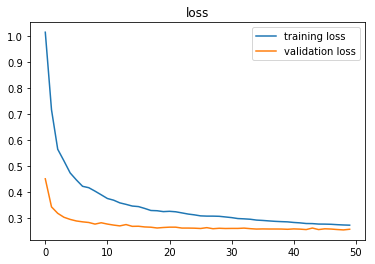

Plotting metrics...


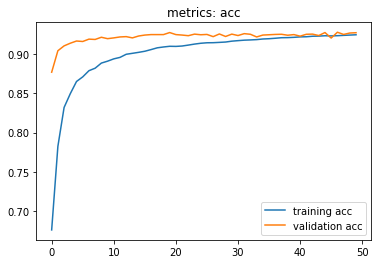

train {'acc': 0.9373636}
test {'acc': 0.9275}

Training student with temperature = 32 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13110891353596489963
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 15745386353059314791
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2357.2742 , acc = 0.12 
Epoch 1 , step 100 , loss= 2319.8284 , acc = 0.31 
Epoch 1 , step 200 , loss= 2187.2642 , acc = 0.33 
Epoch 1 , step 300 , loss= 2114.207 , acc = 0.33 
Epoch 1 , step 400 , loss= 1996.2894 , acc = 0.45 
Epoch 1 , step 500 , loss= 1973.3031 , acc = 0.51 
Epoch 1 , step 549 , loss= 2015.8384 val_loss= 1961.5588 , acc = 0.54 val acc = 0.6048 
Epoch 1 finished, loss= 2137.7148 
Epoch 2 , step 50 , loss= 2015.4286 , acc = 0.61 
Epoch 2 , step 150

Epoch 20 , step 50 , loss= 1698.3132 , acc = 0.85 
Epoch 20 , step 150 , loss= 1733.2125 , acc = 0.88 
Epoch 20 , step 250 , loss= 1781.634 , acc = 0.92 
Epoch 20 , step 350 , loss= 1767.5603 , acc = 0.9 
Epoch 20 , step 450 , loss= 1819.7812 , acc = 0.83 
Epoch 20 , step 549 , loss= 1846.239 val_loss= 1762.7922 , acc = 0.85 val acc = 0.8702 
Epoch 20 finished, loss= 1823.1149 
Epoch 21 , step 0 , loss= 1730.7393 , acc = 0.9 
Epoch 21 , step 100 , loss= 1821.6986 , acc = 0.85 
Epoch 21 , step 200 , loss= 1820.6289 , acc = 0.82 
Epoch 21 , step 300 , loss= 1789.7086 , acc = 0.9 
Epoch 21 , step 400 , loss= 1827.8369 , acc = 0.88 
Epoch 21 , step 500 , loss= 1797.7935 , acc = 0.88 
Epoch 21 , step 549 , loss= 1873.4547 val_loss= 1761.8756 , acc = 0.85 val acc = 0.872 
Epoch 21 finished, loss= 1822.3854 
Epoch 22 , step 50 , loss= 1857.5614 , acc = 0.83 
Epoch 22 , step 150 , loss= 1812.609 , acc = 0.88 
Epoch 22 , step 250 , loss= 1794.0709 , acc = 0.87 
Epoch 22 , step 350 , loss= 1699.

Epoch 40 , step 150 , loss= 1737.5062 , acc = 0.89 
Epoch 40 , step 250 , loss= 1765.0261 , acc = 0.85 
Epoch 40 , step 350 , loss= 1788.0503 , acc = 0.83 
Epoch 40 , step 450 , loss= 1882.7783 , acc = 0.86 
Epoch 40 , step 549 , loss= 1855.8004 val_loss= 1751.8048 , acc = 0.84 val acc = 0.8752 
Epoch 40 finished, loss= 1800.2539 
Epoch 41 , step 0 , loss= 1817.2588 , acc = 0.83 
Epoch 41 , step 100 , loss= 1752.0173 , acc = 0.88 
Epoch 41 , step 200 , loss= 1750.6086 , acc = 0.9 
Epoch 41 , step 300 , loss= 1828.4832 , acc = 0.88 
Epoch 41 , step 400 , loss= 1779.9012 , acc = 0.89 
Epoch 41 , step 500 , loss= 1818.6406 , acc = 0.85 
Epoch 41 , step 549 , loss= 1732.4741 val_loss= 1751.6322 , acc = 0.9 val acc = 0.8748 
Epoch 41 finished, loss= 1799.7957 
Epoch 42 , step 50 , loss= 1715.0688 , acc = 0.86 
Epoch 42 , step 150 , loss= 1787.9996 , acc = 0.83 
Epoch 42 , step 250 , loss= 1680.4889 , acc = 0.89 
Epoch 42 , step 350 , loss= 1700.698 , acc = 0.9 
Epoch 42 , step 450 , loss= 1

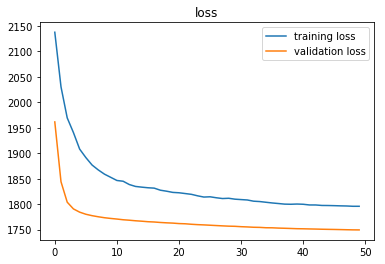

Plotting metrics...


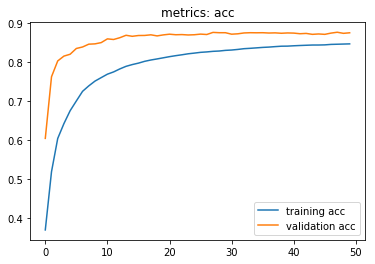

train {'acc': 0.8769091}
test {'acc': 0.8764}

Training student with temperature = 32 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1032263209878762608
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 17168191499499803301
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1768.1224 , acc = 0.25 
Epoch 1 , step 100 , loss= 1732.2657 , acc = 0.26 
Epoch 1 , step 200 , loss= 1655.5393 , acc = 0.38 
Epoch 1 , step 300 , loss= 1609.355 , acc = 0.48 
Epoch 1 , step 400 , loss= 1516.5433 , acc = 0.54 
Epoch 1 , step 500 , loss= 1417.5532 , acc = 0.64 
Epoch 1 , step 549 , loss= 1453.336 val_loss= 1480.4929 , acc = 0.69 val acc = 0.6562 
Epoch 1 finished, loss= 1593.245 
Epoch 2 , step 50 , loss= 1506.6826 , acc = 0.67 
Epoch 2 , step 150 

Epoch 20 , step 50 , loss= 1334.4036 , acc = 0.84 
Epoch 20 , step 150 , loss= 1404.685 , acc = 0.79 
Epoch 20 , step 250 , loss= 1285.7456 , acc = 0.91 
Epoch 20 , step 350 , loss= 1282.0234 , acc = 0.9 
Epoch 20 , step 450 , loss= 1311.868 , acc = 0.9 
Epoch 20 , step 549 , loss= 1269.6305 val_loss= 1323.1042 , acc = 0.89 val acc = 0.8696 
Epoch 20 finished, loss= 1374.3457 
Epoch 21 , step 0 , loss= 1332.2598 , acc = 0.8 
Epoch 21 , step 100 , loss= 1311.5371 , acc = 0.86 
Epoch 21 , step 200 , loss= 1293.908 , acc = 0.92 
Epoch 21 , step 300 , loss= 1303.3505 , acc = 0.83 
Epoch 21 , step 400 , loss= 1348.7626 , acc = 0.88 
Epoch 21 , step 500 , loss= 1321.5935 , acc = 0.87 
Epoch 21 , step 549 , loss= 1361.4064 val_loss= 1322.668 , acc = 0.83 val acc = 0.8676 
Epoch 21 finished, loss= 1371.8083 
Epoch 22 , step 50 , loss= 1285.7151 , acc = 0.86 
Epoch 22 , step 150 , loss= 1392.9742 , acc = 0.85 
Epoch 22 , step 250 , loss= 1403.1373 , acc = 0.85 
Epoch 22 , step 350 , loss= 1350.

Epoch 40 , step 150 , loss= 1365.6685 , acc = 0.87 
Epoch 40 , step 250 , loss= 1266.0194 , acc = 0.88 
Epoch 40 , step 350 , loss= 1346.215 , acc = 0.92 
Epoch 40 , step 450 , loss= 1350.92 , acc = 0.88 
Epoch 40 , step 549 , loss= 1335.587 val_loss= 1315.427 , acc = 0.86 val acc = 0.8776 
Epoch 40 finished, loss= 1356.1819 
Epoch 41 , step 0 , loss= 1381.6837 , acc = 0.91 
Epoch 41 , step 100 , loss= 1333.4364 , acc = 0.86 
Epoch 41 , step 200 , loss= 1359.4004 , acc = 0.89 
Epoch 41 , step 300 , loss= 1306.7037 , acc = 0.92 
Epoch 41 , step 400 , loss= 1313.3281 , acc = 0.9 
Epoch 41 , step 500 , loss= 1360.0713 , acc = 0.9 
Epoch 41 , step 549 , loss= 1310.8209 val_loss= 1314.8171 , acc = 0.91 val acc = 0.8762 
Epoch 41 finished, loss= 1355.7031 
Epoch 42 , step 50 , loss= 1300.5034 , acc = 0.92 
Epoch 42 , step 150 , loss= 1378.7932 , acc = 0.87 
Epoch 42 , step 250 , loss= 1375.8662 , acc = 0.86 
Epoch 42 , step 350 , loss= 1349.5555 , acc = 0.85 
Epoch 42 , step 450 , loss= 1329

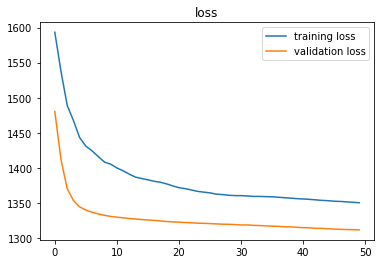

Plotting metrics...


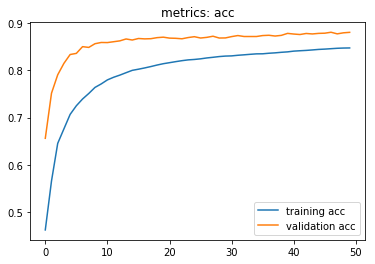

train {'acc': 0.87143636}
test {'acc': 0.8739}

Training student with temperature = 32 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2304331693633381200
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 9906168062292741457
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1180.1309 , acc = 0.1 
Epoch 1 , step 100 , loss= 1158.8312 , acc = 0.4 
Epoch 1 , step 200 , loss= 1107.7584 , acc = 0.47 
Epoch 1 , step 300 , loss= 1064.9352 , acc = 0.5 
Epoch 1 , step 400 , loss= 1001.19556 , acc = 0.55 
Epoch 1 , step 500 , loss= 989.5404 , acc = 0.61 
Epoch 1 , step 549 , loss= 1033.5951 val_loss= 987.3569 , acc = 0.45 val acc = 0.5672 
Epoch 1 finished, loss= 1076.5695 
Epoch 2 , step 50 , loss= 955.1106 , acc = 0.65 
Epoch 2 , step 150 , lo

Epoch 20 , step 250 , loss= 867.559 , acc = 0.89 
Epoch 20 , step 350 , loss= 915.5976 , acc = 0.87 
Epoch 20 , step 450 , loss= 903.70685 , acc = 0.89 
Epoch 20 , step 549 , loss= 879.805 val_loss= 878.55743 , acc = 0.88 val acc = 0.874 
Epoch 20 finished, loss= 910.1411 
Epoch 21 , step 0 , loss= 886.3291 , acc = 0.83 
Epoch 21 , step 100 , loss= 879.0666 , acc = 0.88 
Epoch 21 , step 200 , loss= 876.5163 , acc = 0.87 
Epoch 21 , step 300 , loss= 824.2087 , acc = 0.91 
Epoch 21 , step 400 , loss= 869.99976 , acc = 0.89 
Epoch 21 , step 500 , loss= 885.5315 , acc = 0.92 
Epoch 21 , step 549 , loss= 852.98956 val_loss= 878.13336 , acc = 0.84 val acc = 0.8744 
Epoch 21 finished, loss= 907.97797 
Epoch 22 , step 50 , loss= 901.08466 , acc = 0.91 
Epoch 22 , step 150 , loss= 857.4188 , acc = 0.93 
Epoch 22 , step 250 , loss= 849.4211 , acc = 0.9 
Epoch 22 , step 350 , loss= 876.96387 , acc = 0.92 
Epoch 22 , step 450 , loss= 868.75714 , acc = 0.92 
Epoch 22 , step 549 , loss= 895.3306 val

Epoch 40 , step 549 , loss= 864.0397 val_loss= 873.94257 , acc = 0.91 val acc = 0.8834 
Epoch 40 finished, loss= 897.8855 
Epoch 41 , step 0 , loss= 889.1165 , acc = 0.89 
Epoch 41 , step 100 , loss= 859.65326 , acc = 0.84 
Epoch 41 , step 200 , loss= 887.7776 , acc = 0.92 
Epoch 41 , step 300 , loss= 889.24677 , acc = 0.93 
Epoch 41 , step 400 , loss= 857.70056 , acc = 0.89 
Epoch 41 , step 500 , loss= 849.709 , acc = 0.89 
Epoch 41 , step 549 , loss= 885.8509 val_loss= 873.8326 , acc = 0.86 val acc = 0.8788 
Epoch 41 finished, loss= 897.26324 
Epoch 42 , step 50 , loss= 868.1525 , acc = 0.87 
Epoch 42 , step 150 , loss= 890.8195 , acc = 0.81 
Epoch 42 , step 250 , loss= 932.5502 , acc = 0.92 
Epoch 42 , step 350 , loss= 880.92474 , acc = 0.87 
Epoch 42 , step 450 , loss= 876.5482 , acc = 0.88 
Epoch 42 , step 549 , loss= 913.77936 val_loss= 873.8208 , acc = 0.83 val acc = 0.882 
Epoch 42 finished, loss= 897.187 
Epoch 43 , step 0 , loss= 908.445 , acc = 0.83 
Epoch 43 , step 100 , lo

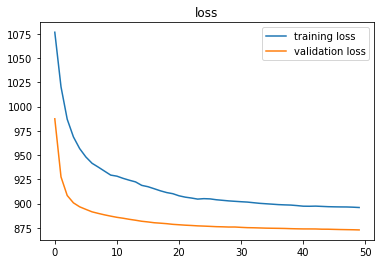

Plotting metrics...


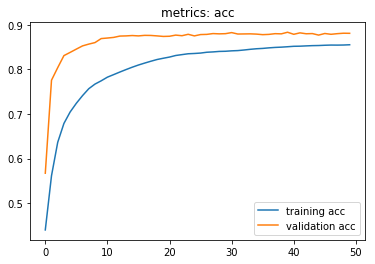

train {'acc': 0.87954545}
test {'acc': 0.8811}

Training student with temperature = 32 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1717259180321728376
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 11184549049484280777
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 590.8089 , acc = 0.23 
Epoch 1 , step 100 , loss= 583.2475 , acc = 0.36 
Epoch 1 , step 200 , loss= 565.64624 , acc = 0.45 
Epoch 1 , step 300 , loss= 545.01794 , acc = 0.5 
Epoch 1 , step 400 , loss= 516.5798 , acc = 0.58 
Epoch 1 , step 500 , loss= 506.01605 , acc = 0.67 
Epoch 1 , step 549 , loss= 496.598 val_loss= 487.86594 , acc = 0.64 val acc = 0.701 
Epoch 1 finished, loss= 543.4164 
Epoch 2 , step 50 , loss= 472.2414 , acc = 0.75 
Epoch 2 , step 150 , los

Epoch 20 , step 150 , loss= 422.52158 , acc = 0.92 
Epoch 20 , step 250 , loss= 423.17844 , acc = 0.88 
Epoch 20 , step 350 , loss= 438.1601 , acc = 0.88 
Epoch 20 , step 450 , loss= 428.64713 , acc = 0.88 
Epoch 20 , step 549 , loss= 455.6607 val_loss= 438.85098 , acc = 0.92 val acc = 0.8812 
Epoch 20 finished, loss= 454.52567 
Epoch 21 , step 0 , loss= 453.3499 , acc = 0.85 
Epoch 21 , step 100 , loss= 448.55887 , acc = 0.89 
Epoch 21 , step 200 , loss= 441.30737 , acc = 0.9 
Epoch 21 , step 300 , loss= 452.7402 , acc = 0.9 
Epoch 21 , step 400 , loss= 441.00836 , acc = 0.88 
Epoch 21 , step 500 , loss= 456.753 , acc = 0.85 
Epoch 21 , step 549 , loss= 442.1103 val_loss= 438.7785 , acc = 0.89 val acc = 0.8834 
Epoch 21 finished, loss= 454.191 
Epoch 22 , step 50 , loss= 445.81662 , acc = 0.89 
Epoch 22 , step 150 , loss= 438.21497 , acc = 0.93 
Epoch 22 , step 250 , loss= 428.99902 , acc = 0.9 
Epoch 22 , step 350 , loss= 442.17078 , acc = 0.89 
Epoch 22 , step 450 , loss= 469.64514 

Epoch 40 , step 350 , loss= 436.7006 , acc = 0.9 
Epoch 40 , step 450 , loss= 425.6528 , acc = 0.96 
Epoch 40 , step 549 , loss= 434.8607 val_loss= 437.4398 , acc = 0.89 val acc = 0.8904 
Epoch 40 finished, loss= 448.99704 
Epoch 41 , step 0 , loss= 468.35394 , acc = 0.87 
Epoch 41 , step 100 , loss= 448.28656 , acc = 0.89 
Epoch 41 , step 200 , loss= 425.98297 , acc = 0.89 
Epoch 41 , step 300 , loss= 448.8403 , acc = 0.92 
Epoch 41 , step 400 , loss= 417.385 , acc = 0.92 
Epoch 41 , step 500 , loss= 440.57413 , acc = 0.91 
Epoch 41 , step 549 , loss= 426.8489 val_loss= 437.37277 , acc = 0.83 val acc = 0.8886 
Epoch 41 finished, loss= 448.7472 
Epoch 42 , step 50 , loss= 433.5596 , acc = 0.92 
Epoch 42 , step 150 , loss= 426.6302 , acc = 0.91 
Epoch 42 , step 250 , loss= 441.92548 , acc = 0.88 
Epoch 42 , step 350 , loss= 435.54248 , acc = 0.88 
Epoch 42 , step 450 , loss= 425.13632 , acc = 0.9 
Epoch 42 , step 549 , loss= 440.5085 val_loss= 437.32605 , acc = 0.91 val acc = 0.8878 
Ep

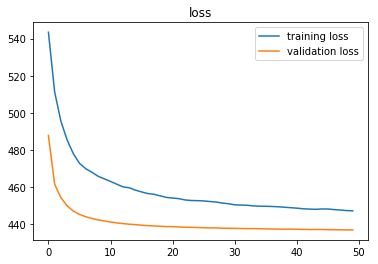

Plotting metrics...


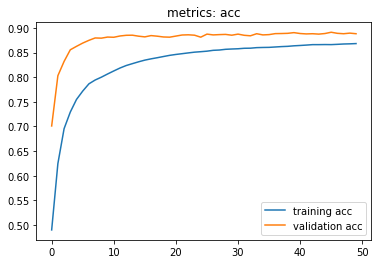

train {'acc': 0.8870364}
test {'acc': 0.8824}

Training student with temperature = 32 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10802073758107035122
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 5255836624681701411
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2813103 , acc = 0.25 
Epoch 1 , step 100 , loss= 1.3529117 , acc = 0.67 
Epoch 1 , step 200 , loss= 0.7709271 , acc = 0.79 
Epoch 1 , step 300 , loss= 0.5513 , acc = 0.84 
Epoch 1 , step 400 , loss= 0.36405683 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.44346017 , acc = 0.86 
Epoch 1 , step 549 , loss= 0.49540967 val_loss= 0.42917132 , acc = 0.83 val acc = 0.8854 
Epoch 1 finished, loss= 0.8941965 
Epoch 2 , step 50 , loss= 0.41549164 , acc = 0.86 
Epoch 2 , step 1

Epoch 19 , step 549 , loss= 0.22762966 val_loss= 0.26178956 , acc = 0.95 val acc = 0.928 
Epoch 19 finished, loss= 0.32151783 
Epoch 20 , step 50 , loss= 0.2526464 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.3064763 , acc = 0.93 
Epoch 20 , step 250 , loss= 0.20158827 , acc = 0.91 
Epoch 20 , step 350 , loss= 0.22003542 , acc = 0.92 
Epoch 20 , step 450 , loss= 0.11994147 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.12099604 val_loss= 0.26011977 , acc = 0.96 val acc = 0.9286 
Epoch 20 finished, loss= 0.31607607 
Epoch 21 , step 0 , loss= 0.41665524 , acc = 0.87 
Epoch 21 , step 100 , loss= 0.20877525 , acc = 0.93 
Epoch 21 , step 200 , loss= 0.36402106 , acc = 0.92 
Epoch 21 , step 300 , loss= 0.19746667 , acc = 0.94 
Epoch 21 , step 400 , loss= 0.19730175 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.26810956 , acc = 0.91 
Epoch 21 , step 549 , loss= 0.39367822 val_loss= 0.2586518 , acc = 0.9 val acc = 0.9306 
Epoch 21 finished, loss= 0.3148606 
Epoch 22 , step 50 , loss= 0.2854562 , acc

Epoch 39 , step 400 , loss= 0.110290185 , acc = 0.98 
Epoch 39 , step 500 , loss= 0.1850974 , acc = 0.95 
Epoch 39 , step 549 , loss= 0.16421166 val_loss= 0.25705814 , acc = 0.94 val acc = 0.9266 
Epoch 39 finished, loss= 0.27902317 
Epoch 40 , step 50 , loss= 0.16239972 , acc = 0.95 
Epoch 40 , step 150 , loss= 0.1937346 , acc = 0.94 
Epoch 40 , step 250 , loss= 0.20941116 , acc = 0.93 
Epoch 40 , step 350 , loss= 0.34278354 , acc = 0.93 
Epoch 40 , step 450 , loss= 0.195367 , acc = 0.94 
Epoch 40 , step 549 , loss= 0.09532924 val_loss= 0.25290015 , acc = 0.97 val acc = 0.9282 
Epoch 40 finished, loss= 0.27719584 
Epoch 41 , step 0 , loss= 0.36217514 , acc = 0.91 
Epoch 41 , step 100 , loss= 0.15889329 , acc = 0.96 
Epoch 41 , step 200 , loss= 0.20262104 , acc = 0.94 
Epoch 41 , step 300 , loss= 0.1266908 , acc = 0.95 
Epoch 41 , step 400 , loss= 0.4294506 , acc = 0.88 
Epoch 41 , step 500 , loss= 0.19222523 , acc = 0.95 
Epoch 41 , step 549 , loss= 0.3106843 val_loss= 0.25331572 , ac

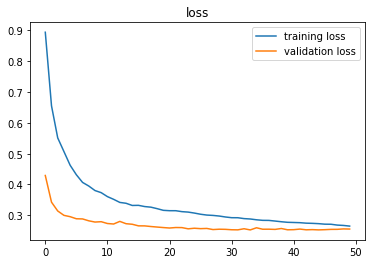

Plotting metrics...


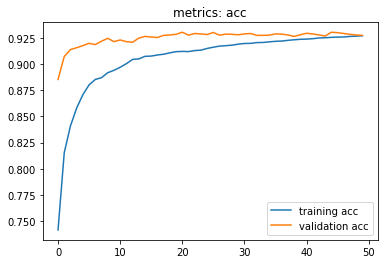

train {'acc': 0.9405636}
test {'acc': 0.9309}

Training student with temperature = 64 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13671141228813318078
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 16737554101309495154
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 9431.895 , acc = 0.04 
Epoch 1 , step 100 , loss= 9395.481 , acc = 0.3 
Epoch 1 , step 200 , loss= 9254.138 , acc = 0.34 
Epoch 1 , step 300 , loss= 9096.094 , acc = 0.35 
Epoch 1 , step 400 , loss= 9051.264 , acc = 0.46 
Epoch 1 , step 500 , loss= 9126.202 , acc = 0.54 
Epoch 1 , step 549 , loss= 9154.668 val_loss= 9010.349 , acc = 0.53 val acc = 0.5426 
Epoch 1 finished, loss= 9215.677 
Epoch 2 , step 50 , loss= 9014.09 , acc = 0.56 
Epoch 2 , step 150 , loss= 90

Epoch 20 , step 350 , loss= 8788.006 , acc = 0.86 
Epoch 20 , step 450 , loss= 8741.231 , acc = 0.81 
Epoch 20 , step 549 , loss= 8844.483 val_loss= 8815.733 , acc = 0.82 val acc = 0.8438 
Epoch 20 finished, loss= 8886.633 
Epoch 21 , step 0 , loss= 8878.972 , acc = 0.83 
Epoch 21 , step 100 , loss= 8856.709 , acc = 0.86 
Epoch 21 , step 200 , loss= 8866.621 , acc = 0.86 
Epoch 21 , step 300 , loss= 8769.543 , acc = 0.82 
Epoch 21 , step 400 , loss= 8802.781 , acc = 0.82 
Epoch 21 , step 500 , loss= 8890.563 , acc = 0.76 
Epoch 21 , step 549 , loss= 8834.371 val_loss= 8814.936 , acc = 0.81 val acc = 0.8424 
Epoch 21 finished, loss= 8884.393 
Epoch 22 , step 50 , loss= 8865.161 , acc = 0.81 
Epoch 22 , step 150 , loss= 8811.162 , acc = 0.89 
Epoch 22 , step 250 , loss= 8857.471 , acc = 0.89 
Epoch 22 , step 350 , loss= 8881.25 , acc = 0.84 
Epoch 22 , step 450 , loss= 8922.051 , acc = 0.81 
Epoch 22 , step 549 , loss= 8863.447 val_loss= 8814.484 , acc = 0.83 val acc = 0.8392 
Epoch 22 f

Epoch 41 , step 100 , loss= 8728.354 , acc = 0.9 
Epoch 41 , step 200 , loss= 8754.689 , acc = 0.82 
Epoch 41 , step 300 , loss= 8857.082 , acc = 0.83 
Epoch 41 , step 400 , loss= 8769.145 , acc = 0.81 
Epoch 41 , step 500 , loss= 8866.947 , acc = 0.85 
Epoch 41 , step 549 , loss= 8901.241 val_loss= 8802.245 , acc = 0.84 val acc = 0.8328 
Epoch 41 finished, loss= 8859.292 
Epoch 42 , step 50 , loss= 8829.716 , acc = 0.84 
Epoch 42 , step 150 , loss= 8955.412 , acc = 0.74 
Epoch 42 , step 250 , loss= 8732.722 , acc = 0.84 
Epoch 42 , step 350 , loss= 8805.359 , acc = 0.83 
Epoch 42 , step 450 , loss= 8851.536 , acc = 0.86 
Epoch 42 , step 549 , loss= 8856.574 val_loss= 8801.002 , acc = 0.84 val acc = 0.8352 
Epoch 42 finished, loss= 8858.836 
Epoch 43 , step 0 , loss= 8836.49 , acc = 0.81 
Epoch 43 , step 100 , loss= 8711.216 , acc = 0.82 
Epoch 43 , step 200 , loss= 8882.3 , acc = 0.82 
Epoch 43 , step 300 , loss= 8873.229 , acc = 0.88 
Epoch 43 , step 400 , loss= 8852.655 , acc = 0.84

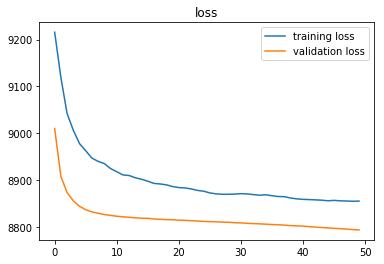

Plotting metrics...


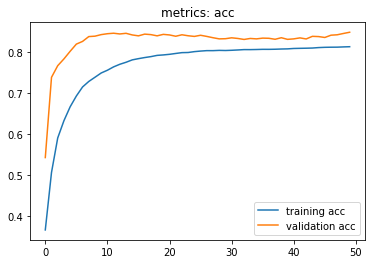

train {'acc': 0.84434545}
test {'acc': 0.8414}

Training student with temperature = 64 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8411144783031209866
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 7925840136924508645
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 7074.2153 , acc = 0.11 
Epoch 1 , step 100 , loss= 7049.1333 , acc = 0.26 
Epoch 1 , step 200 , loss= 6995.149 , acc = 0.35 
Epoch 1 , step 300 , loss= 6886.786 , acc = 0.39 
Epoch 1 , step 400 , loss= 6878.0977 , acc = 0.43 
Epoch 1 , step 500 , loss= 6858.737 , acc = 0.58 
Epoch 1 , step 549 , loss= 6841.4893 val_loss= 6781.0547 , acc = 0.55 val acc = 0.6206 
Epoch 1 finished, loss= 6940.5156 
Epoch 2 , step 50 , loss= 6843.8057 , acc = 0.56 
Epoch 2 , step 150 

Epoch 20 , step 150 , loss= 6550.3833 , acc = 0.87 
Epoch 20 , step 250 , loss= 6562.7676 , acc = 0.82 
Epoch 20 , step 350 , loss= 6668.5835 , acc = 0.85 
Epoch 20 , step 450 , loss= 6704.093 , acc = 0.78 
Epoch 20 , step 549 , loss= 6567.1997 val_loss= 6619.3706 , acc = 0.88 val acc = 0.8268 
Epoch 20 finished, loss= 6675.207 
Epoch 21 , step 0 , loss= 6667.4517 , acc = 0.81 
Epoch 21 , step 100 , loss= 6707.257 , acc = 0.82 
Epoch 21 , step 200 , loss= 6713.8184 , acc = 0.78 
Epoch 21 , step 300 , loss= 6663.9985 , acc = 0.8 
Epoch 21 , step 400 , loss= 6657.225 , acc = 0.87 
Epoch 21 , step 500 , loss= 6687.1094 , acc = 0.82 
Epoch 21 , step 549 , loss= 6609.5405 val_loss= 6618.314 , acc = 0.88 val acc = 0.825 
Epoch 21 finished, loss= 6675.061 
Epoch 22 , step 50 , loss= 6690.6245 , acc = 0.78 
Epoch 22 , step 150 , loss= 6588.728 , acc = 0.83 
Epoch 22 , step 250 , loss= 6651.9956 , acc = 0.8 
Epoch 22 , step 350 , loss= 6610.719 , acc = 0.77 
Epoch 22 , step 450 , loss= 6613.505

Epoch 40 , step 450 , loss= 6578.1 , acc = 0.81 
Epoch 40 , step 549 , loss= 6682.5645 val_loss= 6603.5576 , acc = 0.83 val acc = 0.8352 
Epoch 40 finished, loss= 6651.4663 
Epoch 41 , step 0 , loss= 6628.234 , acc = 0.86 
Epoch 41 , step 100 , loss= 6634.8076 , acc = 0.81 
Epoch 41 , step 200 , loss= 6609.7354 , acc = 0.83 
Epoch 41 , step 300 , loss= 6656.584 , acc = 0.74 
Epoch 41 , step 400 , loss= 6690.3135 , acc = 0.84 
Epoch 41 , step 500 , loss= 6578.3794 , acc = 0.85 
Epoch 41 , step 549 , loss= 6624.2715 val_loss= 6603.1206 , acc = 0.81 val acc = 0.8384 
Epoch 41 finished, loss= 6650.949 
Epoch 42 , step 50 , loss= 6666.411 , acc = 0.79 
Epoch 42 , step 150 , loss= 6627.5186 , acc = 0.8 
Epoch 42 , step 250 , loss= 6655.0 , acc = 0.81 
Epoch 42 , step 350 , loss= 6612.3296 , acc = 0.81 
Epoch 42 , step 450 , loss= 6605.3755 , acc = 0.81 
Epoch 42 , step 549 , loss= 6690.278 val_loss= 6602.511 , acc = 0.82 val acc = 0.8418 
Epoch 42 finished, loss= 6650.771 
Epoch 43 , step 0 

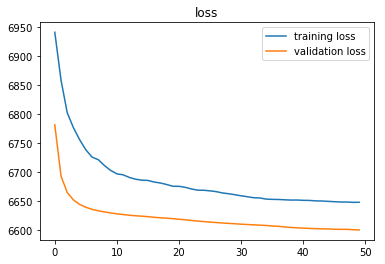

Plotting metrics...


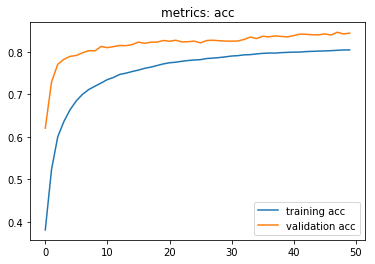

train {'acc': 0.8347091}
test {'acc': 0.8313}

Training student with temperature = 64 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6598414901972801209
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 10496309985808464758
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4716.8594 , acc = 0.11 
Epoch 1 , step 100 , loss= 4698.1523 , acc = 0.32 
Epoch 1 , step 200 , loss= 4663.2373 , acc = 0.37 
Epoch 1 , step 300 , loss= 4605.398 , acc = 0.39 
Epoch 1 , step 400 , loss= 4618.9365 , acc = 0.49 
Epoch 1 , step 500 , loss= 4579.6836 , acc = 0.51 
Epoch 1 , step 549 , loss= 4555.6562 val_loss= 4528.7354 , acc = 0.48 val acc = 0.6048 
Epoch 1 finished, loss= 4633.989 
Epoch 2 , step 50 , loss= 4527.6387 , acc = 0.61 
Epoch 2 , step 150 ,

Epoch 20 , step 150 , loss= 4422.0684 , acc = 0.84 
Epoch 20 , step 250 , loss= 4407.901 , acc = 0.75 
Epoch 20 , step 350 , loss= 4430.14 , acc = 0.83 
Epoch 20 , step 450 , loss= 4433.2793 , acc = 0.8 
Epoch 20 , step 549 , loss= 4395.6313 val_loss= 4402.7007 , acc = 0.81 val acc = 0.8436 
Epoch 20 finished, loss= 4450.107 
Epoch 21 , step 0 , loss= 4398.518 , acc = 0.75 
Epoch 21 , step 100 , loss= 4469.1235 , acc = 0.82 
Epoch 21 , step 200 , loss= 4354.4595 , acc = 0.89 
Epoch 21 , step 300 , loss= 4291.0273 , acc = 0.84 
Epoch 21 , step 400 , loss= 4423.1636 , acc = 0.88 
Epoch 21 , step 500 , loss= 4458.9688 , acc = 0.8 
Epoch 21 , step 549 , loss= 4449.7915 val_loss= 4402.2227 , acc = 0.87 val acc = 0.8432 
Epoch 21 finished, loss= 4447.875 
Epoch 22 , step 50 , loss= 4447.274 , acc = 0.83 
Epoch 22 , step 150 , loss= 4432.441 , acc = 0.85 
Epoch 22 , step 250 , loss= 4426.603 , acc = 0.82 
Epoch 22 , step 350 , loss= 4417.775 , acc = 0.88 
Epoch 22 , step 450 , loss= 4300.345 

Epoch 40 , step 450 , loss= 4443.2085 , acc = 0.92 
Epoch 40 , step 549 , loss= 4459.2285 val_loss= 4396.9336 , acc = 0.8 val acc = 0.8536 
Epoch 40 finished, loss= 4431.453 
Epoch 41 , step 0 , loss= 4390.5894 , acc = 0.88 
Epoch 41 , step 100 , loss= 4399.9873 , acc = 0.81 
Epoch 41 , step 200 , loss= 4393.389 , acc = 0.83 
Epoch 41 , step 300 , loss= 4369.0967 , acc = 0.88 
Epoch 41 , step 400 , loss= 4416.619 , acc = 0.85 
Epoch 41 , step 500 , loss= 4417.892 , acc = 0.88 
Epoch 41 , step 549 , loss= 4388.1562 val_loss= 4397.065 , acc = 0.8 val acc = 0.8548 
Epoch 41 finished, loss= 4430.5376 
Epoch 42 , step 50 , loss= 4459.508 , acc = 0.87 
Epoch 42 , step 150 , loss= 4385.2075 , acc = 0.87 
Epoch 42 , step 250 , loss= 4399.587 , acc = 0.92 
Epoch 42 , step 350 , loss= 4377.1997 , acc = 0.86 
Epoch 42 , step 450 , loss= 4414.5615 , acc = 0.86 
Epoch 42 , step 549 , loss= 4434.5527 val_loss= 4396.6353 , acc = 0.88 val acc = 0.8592 
Epoch 42 finished, loss= 4430.1255 
Epoch 43 , st

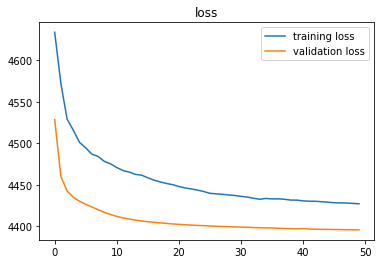

Plotting metrics...


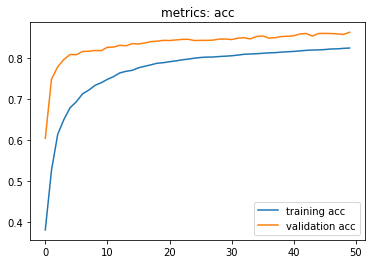

train {'acc': 0.85774547}
test {'acc': 0.8582}

Training student with temperature = 64 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16250909769051600883
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 17157423159079643219
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2359.4766 , acc = 0.14 
Epoch 1 , step 100 , loss= 2351.0708 , acc = 0.3 
Epoch 1 , step 200 , loss= 2333.2651 , acc = 0.42 
Epoch 1 , step 300 , loss= 2299.5583 , acc = 0.49 
Epoch 1 , step 400 , loss= 2285.947 , acc = 0.57 
Epoch 1 , step 500 , loss= 2253.7532 , acc = 0.65 
Epoch 1 , step 549 , loss= 2270.838 val_loss= 2257.6235 , acc = 0.69 val acc = 0.6868 
Epoch 1 finished, loss= 2307.7014 
Epoch 2 , step 50 , loss= 2275.5803 , acc = 0.68 
Epoch 2 , step 15

Epoch 20 , step 150 , loss= 2195.5952 , acc = 0.87 
Epoch 20 , step 250 , loss= 2161.5623 , acc = 0.9 
Epoch 20 , step 350 , loss= 2255.9631 , acc = 0.82 
Epoch 20 , step 450 , loss= 2204.61 , acc = 0.93 
Epoch 20 , step 549 , loss= 2216.7666 val_loss= 2204.5884 , acc = 0.85 val acc = 0.8538 
Epoch 20 finished, loss= 2222.4336 
Epoch 21 , step 0 , loss= 2195.9636 , acc = 0.86 
Epoch 21 , step 100 , loss= 2211.3628 , acc = 0.89 
Epoch 21 , step 200 , loss= 2197.9988 , acc = 0.81 
Epoch 21 , step 300 , loss= 2208.3813 , acc = 0.88 
Epoch 21 , step 400 , loss= 2211.8052 , acc = 0.84 
Epoch 21 , step 500 , loss= 2231.804 , acc = 0.82 
Epoch 21 , step 549 , loss= 2234.0261 val_loss= 2204.5015 , acc = 0.81 val acc = 0.8572 
Epoch 21 finished, loss= 2221.954 
Epoch 22 , step 50 , loss= 2226.7004 , acc = 0.79 
Epoch 22 , step 150 , loss= 2207.837 , acc = 0.83 
Epoch 22 , step 250 , loss= 2249.072 , acc = 0.81 
Epoch 22 , step 350 , loss= 2215.366 , acc = 0.83 
Epoch 22 , step 450 , loss= 2222.

Epoch 40 , step 350 , loss= 2221.537 , acc = 0.86 
Epoch 40 , step 450 , loss= 2216.9304 , acc = 0.83 
Epoch 40 , step 549 , loss= 2204.0938 val_loss= 2201.9514 , acc = 0.88 val acc = 0.8676 
Epoch 40 finished, loss= 2218.0962 
Epoch 41 , step 0 , loss= 2178.4397 , acc = 0.86 
Epoch 41 , step 100 , loss= 2213.4382 , acc = 0.84 
Epoch 41 , step 200 , loss= 2167.9983 , acc = 0.88 
Epoch 41 , step 300 , loss= 2174.9917 , acc = 0.86 
Epoch 41 , step 400 , loss= 2206.4915 , acc = 0.86 
Epoch 41 , step 500 , loss= 2198.1448 , acc = 0.83 
Epoch 41 , step 549 , loss= 2208.3901 val_loss= 2201.8337 , acc = 0.92 val acc = 0.8682 
Epoch 41 finished, loss= 2217.4265 
Epoch 42 , step 50 , loss= 2191.3433 , acc = 0.9 
Epoch 42 , step 150 , loss= 2200.3352 , acc = 0.81 
Epoch 42 , step 250 , loss= 2212.646 , acc = 0.82 
Epoch 42 , step 350 , loss= 2195.1248 , acc = 0.88 
Epoch 42 , step 450 , loss= 2208.4412 , acc = 0.89 
Epoch 42 , step 549 , loss= 2226.425 val_loss= 2201.8096 , acc = 0.84 val acc = 

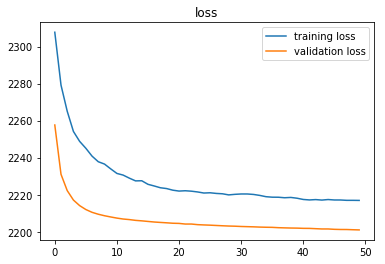

Plotting metrics...


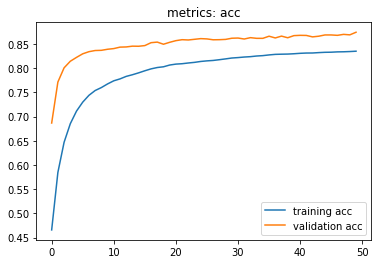

train {'acc': 0.86718184}
test {'acc': 0.8673}

Training student with temperature = 64 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5403599356813733283
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6194479104
locality {
  bus_id: 1
}
incarnation: 5595617068137888070
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3066487 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.396164 , acc = 0.66 
Epoch 1 , step 200 , loss= 0.9825783 , acc = 0.72 
Epoch 1 , step 300 , loss= 0.74246603 , acc = 0.82 
Epoch 1 , step 400 , loss= 0.56132907 , acc = 0.85 
Epoch 1 , step 500 , loss= 0.5043591 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.39430374 val_loss= 0.42593735 , acc = 0.91 val acc = 0.8866 
Epoch 1 finished, loss= 0.9839784 
Epoch 2 , step 50 , loss= 0.5110419 , acc = 0.85 
Epoch 2 , step 15

Epoch 19 , step 549 , loss= 0.30891204 val_loss= 0.26031807 , acc = 0.92 val acc = 0.9256 
Epoch 19 finished, loss= 0.3145905 
Epoch 20 , step 50 , loss= 0.17692074 , acc = 0.96 
Epoch 20 , step 150 , loss= 0.13202272 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.29977044 , acc = 0.88 
Epoch 20 , step 350 , loss= 0.08126318 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.15504856 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.3412495 val_loss= 0.2498232 , acc = 0.94 val acc = 0.9304 
Epoch 20 finished, loss= 0.3091961 
Epoch 21 , step 0 , loss= 0.16899996 , acc = 0.94 
Epoch 21 , step 100 , loss= 0.1609892 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.3695154 , acc = 0.86 
Epoch 21 , step 300 , loss= 0.2361683 , acc = 0.92 
Epoch 21 , step 400 , loss= 0.16227172 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.37190777 , acc = 0.91 
Epoch 21 , step 549 , loss= 0.25600648 val_loss= 0.25099462 , acc = 0.94 val acc = 0.9298 
Epoch 21 finished, loss= 0.30599532 
Epoch 22 , step 50 , loss= 0.1688199 , acc 

Epoch 39 , step 400 , loss= 0.11377158 , acc = 0.98 
Epoch 39 , step 500 , loss= 0.23055732 , acc = 0.94 
Epoch 39 , step 549 , loss= 0.23801246 val_loss= 0.24754104 , acc = 0.9 val acc = 0.9292 
Epoch 39 finished, loss= 0.2641653 
Epoch 40 , step 50 , loss= 0.14257728 , acc = 0.94 
Epoch 40 , step 150 , loss= 0.1272152 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.22920972 , acc = 0.91 
Epoch 40 , step 350 , loss= 0.14145972 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.2804751 , acc = 0.93 
Epoch 40 , step 549 , loss= 0.2203021 val_loss= 0.2432726 , acc = 0.92 val acc = 0.9338 
Epoch 40 finished, loss= 0.26245856 
Epoch 41 , step 0 , loss= 0.19475313 , acc = 0.95 
Epoch 41 , step 100 , loss= 0.1745681 , acc = 0.95 
Epoch 41 , step 200 , loss= 0.1593311 , acc = 0.96 
Epoch 41 , step 300 , loss= 0.1421606 , acc = 0.96 
Epoch 41 , step 400 , loss= 0.17662606 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.19845404 , acc = 0.94 
Epoch 41 , step 549 , loss= 0.18703139 val_loss= 0.25048554 , acc =

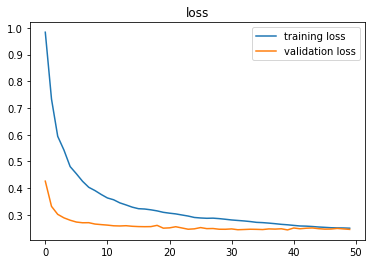

Plotting metrics...


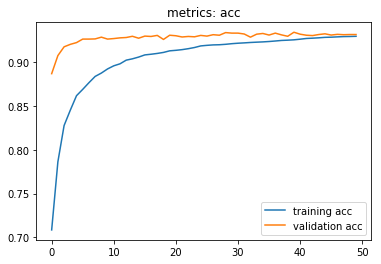

train {'acc': 0.94167274}
test {'acc': 0.93}

{2: [{'acc': 0.9347}, {'acc': 0.9303}, {'acc': 0.9347}, {'acc': 0.9266}, {'acc': 0.9303}], 4: [{'acc': 0.9276}, {'acc': 0.9249}, {'acc': 0.9273}, {'acc': 0.9234}, {'acc': 0.9271}], 8: [{'acc': 0.9205}, {'acc': 0.9231}, {'acc': 0.9248}, {'acc': 0.925}, {'acc': 0.9299}], 16: [{'acc': 0.9071}, {'acc': 0.9051}, {'acc': 0.9067}, {'acc': 0.911}, {'acc': 0.9275}], 32: [{'acc': 0.8764}, {'acc': 0.8739}, {'acc': 0.8811}, {'acc': 0.8824}, {'acc': 0.9309}], 64: [{'acc': 0.8414}, {'acc': 0.8313}, {'acc': 0.8582}, {'acc': 0.8673}, {'acc': 0.93}]}


In [17]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])
list_exp2 = []

temperatures = [2,4,8,16,32,64]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = temperature**2 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=50
            ,display_steps=100)
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
#         print('Student performance with temperature =',temperature,
#              ', coef_softloss =',coef_softloss,',tmp_effi =', tmp_effect,'. ')
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp2.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp2 = pd.DataFrame(list_exp2)
print(test_metrics)

In [18]:
print(df_exp2)
print(df_exp2['test_acc'].mean())

    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            2                   4    0.9347   
1            0.25           0.75            2                   4    0.9303   
2            0.50           0.50            2                   4    0.9347   
3            0.75           0.25            2                   4    0.9266   
4            1.00           0.00            2                   4    0.9303   
5            0.00           1.00            4                  16    0.9276   
6            0.25           0.75            4                  16    0.9249   
7            0.50           0.50            4                  16    0.9273   
8            0.75           0.25            4                  16    0.9234   
9            1.00           0.00            4                  16    0.9271   
10           0.00           1.00            8                  64    0.9205   
11           0.25           0.75            8       

In [21]:
print('teacher')
print(len(teacher.his_loss_train))
print(len(teacher.his_loss_train_epoch))
print('small')
print(len(small.his_loss_train))
print(len(small.his_loss_train_epoch))
print('student')
print(len(student.his_loss_train))
print(len(student.his_loss_train_epoch))

teacher
27500
50
small
27500
50
student
325
50


In [ ]:

# close_session(session)